In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import os
import random
from datetime import datetime
import scipy
import seaborn as sns
import time

In [2]:
# Read all files in the directory
def read_file(in_folder, percent=1, random=True):
    i = 0
    # Random sampling
    all_files = sorted(os.listdir(in_folder))
    num_files = int(np.floor(len(all_files) * percent))
    if random: 
        chosen_files = random.sample(all_files, num_files)
    else: 
        chosen_files = all_files[:num_files]
    
    for file in chosen_files:
        file_name = in_folder + file
        print(file_name)
        if file_name[-9:] == '.DS_Store':
            continue
        if i == 0:
            df = pd.read_csv(file_name)
        else:
            temp_df = pd.read_csv(file_name)
            df = pd.concat([df, temp_df]).reset_index(drop=True)
        i +=1
    print('Number of files:',format(i))
    return df

In [3]:
# df_0 = read_file('data/', percent=0.04) # 16 files
df_0 = read_file('../data/', percent=0.3, random=False) # 16 files

../data/.DS_Store
../data/uk_obs_coordinates_000000000000
../data/uk_obs_coordinates_000000000001
../data/uk_obs_coordinates_000000000002
../data/uk_obs_coordinates_000000000003
../data/uk_obs_coordinates_000000000004
../data/uk_obs_coordinates_000000000005
../data/uk_obs_coordinates_000000000006
../data/uk_obs_coordinates_000000000007
../data/uk_obs_coordinates_000000000008
../data/uk_obs_coordinates_000000000009
../data/uk_obs_coordinates_000000000010
../data/uk_obs_coordinates_000000000011
../data/uk_obs_coordinates_000000000012
../data/uk_obs_coordinates_000000000013
../data/uk_obs_coordinates_000000000014
../data/uk_obs_coordinates_000000000015
../data/uk_obs_coordinates_000000000016
../data/uk_obs_coordinates_000000000017
../data/uk_obs_coordinates_000000000018
../data/uk_obs_coordinates_000000000019
../data/uk_obs_coordinates_000000000020
../data/uk_obs_coordinates_000000000021
../data/uk_obs_coordinates_000000000022
../data/uk_obs_coordinates_000000000023
../data/uk_obs_coordin

In [4]:
df_0.shape

(85599213, 6)

In [5]:
df_0['Level'].unique()

array(['1st Floor', '2nd Floor'], dtype=object)

### Data cleaning

In [6]:
## Clean data at 1st - 3rd floor 
# df_1 = df_0.loc[df_0['Level'].isin(['Ground Floor', '1st Floor', '2nd Floor']),:]
df_1 = df_0.loc[df_0['Level'].isin(['1st Floor', '2nd Floor']),:]
print("# rows before cleaning: {}".format(df_1.shape[0]))

# For the first rectangle, I filter out  
# Logic: left min, right max
df_2 = df_1.query("lat>=51.46038149506283 and lat<=51.46054187270378")
df_2 = df_2.query("lng>=-0.9333064334614474 and lng<=-0.9322956462351958")

df_2.reset_index(inplace=True)
df_2.tail()

# rows before cleaning: 85599213


index       Site      Level      ClientMacAddr        lat  \
40164332  85599208  UK Office  2nd Floor  8c:b8:4a:b6:a4:46  51.460421   
40164333  85599209  UK Office  2nd Floor  84:fd:d1:6b:03:37  51.460403   
40164334  85599210  UK Office  2nd Floor  64:89:f1:d3:d6:2f  51.460423   
40164335  85599211  UK Office  2nd Floor  a4:c3:f0:99:13:21  51.460431   
40164336  85599212  UK Office  2nd Floor  a4:c3:f0:a5:f0:f0  51.460432   

               lng                    localtime  
40164332 -0.932718  2020-03-03 16:46:09.503 UTC  
40164333 -0.932540  2020-03-03 16:46:09.503 UTC  
40164334 -0.932339  2020-03-03 16:46:09.494 UTC  
40164335 -0.932310  2020-03-03 16:46:09.494 UTC  
40164336 -0.932313  2020-03-03 16:46:09.494 UTC

In [7]:
# For the second rectangle, I filter out 
df_3 = df_1.query("lat>=51.46055295640854 and lat<=51.460984859445034")
df_3 = df_3.query("lng>=-0.932590207567124 and lng<=-0.9322208241894918")
df_3.reset_index(inplace=True)
df_3.tail()
#df_1 = pd.concat([df_2, df_3], ignore_index=True)
#print("# rows after cleaning: {}".format(df_1.shape[0]))


index       Site      Level      ClientMacAddr        lat  \
31049466  85599191  UK Office  2nd Floor  9c:da:3e:69:ca:80  51.460805   
31049467  85599192  UK Office  2nd Floor  88:66:a5:10:be:cb  51.460789   
31049468  85599198  UK Office  2nd Floor  98:10:e8:07:e1:12  51.460633   
31049469  85599206  UK Office  2nd Floor  34:f3:9a:c4:16:3e  51.460664   
31049470  85599207  UK Office  2nd Floor  4c:56:9d:6b:e2:d1  51.460735   

               lng                    localtime  
31049466 -0.932318   2020-03-03 16:46:09.59 UTC  
31049467 -0.932316   2020-03-03 16:46:09.59 UTC  
31049468 -0.932309  2020-03-03 16:46:09.517 UTC  
31049469 -0.932498  2020-03-03 16:46:09.506 UTC  
31049470 -0.932377  2020-03-03 16:46:09.506 UTC

In [8]:
#Merging df_2 and df_3
df_1 = pd.concat([df_2, df_3], ignore_index=True).drop_duplicates(subset=['index']).drop(columns=['index'])
print("# rows after cleaning: {}".format(df_1.shape[0]))
df_1.head(10)

# rows after cleaning: 71213808


Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
5  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
6  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
7  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
8  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
9  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                     localtime  
0  2020-09-01 23:58:49.582 UTC  
1  2020-09-01 23:58:38.112 UTC  
2  2020-09-01 23:58:29.514 UTC  
3  2020-09-01 23:58:18.046 UTC  
4  2020-09-01 23:58:09.522 UTC  
5  2020-09-01 23:57:57.986 UTC  
6  2020-09-01 23:57:44.417 UTC  
7  2020-09-01 23:57:34.422 UTC  
8  2020-09-01 23:57:27.891 UTC  
9  2020-09-01 23:57:19.409 UTC

In [9]:
## Clean data at 4th floor 
df_4 = df_0.loc[df_0['Level']=='3rd Floor',:]
print("# rows before cleaning: {}".format(df_4.shape[0]))

# For the 4th floor, I filter out  
df_4 = df_4.query("lat>=51.46042494504671 and lat<=51.46052254063351")
df_4 = df_4.query("lng>=-0.9332608338419903 and lng<=-0.9323114003049598")
print("# rows after cleaning: {}".format(df_4.shape[0]))


# rows before cleaning: 0
# rows after cleaning: 0


In [10]:
# Combined all filtered df
cleaned_df = pd.concat([df_1, df_4], ignore_index=True)
df = cleaned_df
print("# of total rows after cleaning: {}".format(df.shape[0]))

# of total rows after cleaning: 71213808


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71213808 entries, 0 to 71213807
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Site           object 
 1   Level          object 
 2   ClientMacAddr  object 
 3   lat            float64
 4   lng            float64
 5   localtime      object 
dtypes: float64(2), object(4)
memory usage: 3.2+ GB


## TODO: 
1. Remove outliers by fixing the boundary 
2. Identify fixed and mobile device
3. Engineering Job function 
4. Security level
5. Zone
6. Maintenance or not (if machine)

## Add date time columns

In [12]:
start_time = time.time()
df['normalized_time'] = pd.to_datetime(df['localtime'], format="%Y-%m-%d %H:%M:%S.%f %Z", errors="coerce").fillna(pd.to_datetime(df['localtime'], format="%Y-%m-%d %H:%M:%S %Z", errors="coerce"))
df['localtime'] = df['normalized_time']
print("--- %s mins ---" % (int(time.time() - start_time)/60))

start_time = time.time()
df['date']  = df['localtime'].dt.date
#df['time']  = df['localtime'].dt.strftime('%H:%M:%S')
df['min']  = df['localtime'].dt.minute
df['hour']  = df['localtime'].dt.hour
df["dayOfWeek"] = df["localtime"].dt.weekday # 0 is Monday, 6 is Sunday
df["IsWeekend"] = df["dayOfWeek"] >= 5
print("--- %s mins ---" % (int(time.time() - start_time)/60))

--- 19.25 mins ---
--- 0.31666666666666665 mins ---


In [13]:
df.head()

Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                         localtime                  normalized_time  \
0 2020-09-01 23:58:49.582000+00:00 2020-09-01 23:58:49.582000+00:00   
1 2020-09-01 23:58:38.112000+00:00 2020-09-01 23:58:38.112000+00:00   
2 2020-09-01 23:58:29.514000+00:00 2020-09-01 23:58:29.514000+00:00   
3 2020-09-01 23:58:18.046000+00:00 2020-09-01 23:58:18.046000+00:00   
4 2020-09-01 23:58:09.522000+00:00 2020-09-01 23:58:09.522000+00:00   

         date  min  hour  dayOfWeek  IsWeekend  
0  2020-09-01   58    23          1      False  
1  2020-09-01   58    23          1      False  
2  2020-09-01   58    23          1      False  
3  2020-09-01   58    23          1      False  
4  2020-09-01   58    23          1      False

In [14]:
## Add working hours or night time

In [15]:
b = [0,5,21,24]
l = ['night_time', 'working_hour','night_time']
df['session'] = pd.cut(df['hour'], bins=b, labels=l, include_lowest=True, ordered=False)
df.head()

Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                         localtime                  normalized_time  \
0 2020-09-01 23:58:49.582000+00:00 2020-09-01 23:58:49.582000+00:00   
1 2020-09-01 23:58:38.112000+00:00 2020-09-01 23:58:38.112000+00:00   
2 2020-09-01 23:58:29.514000+00:00 2020-09-01 23:58:29.514000+00:00   
3 2020-09-01 23:58:18.046000+00:00 2020-09-01 23:58:18.046000+00:00   
4 2020-09-01 23:58:09.522000+00:00 2020-09-01 23:58:09.522000+00:00   

         date  min  hour  dayOfWeek  IsWeekend     session  
0  2020-09-01   58    23          1      False  night_time  
1  2020-09-01   58    23          1      False  night_time  
2  2020-09-01   58    23          1      False  night_time  
3  2020-09-01   58    23          1      False  night_time  
4  2020-09-01   58    23          1      False  night_time

In [16]:
df[df["session"] == 'working_hour']['hour'].unique()

array([21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6])

In [17]:
df[df["session"] == 'night_time']['hour'].unique()

array([23, 22,  5,  4,  3,  2,  1,  0])

In [18]:
df.head()

Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                         localtime                  normalized_time  \
0 2020-09-01 23:58:49.582000+00:00 2020-09-01 23:58:49.582000+00:00   
1 2020-09-01 23:58:38.112000+00:00 2020-09-01 23:58:38.112000+00:00   
2 2020-09-01 23:58:29.514000+00:00 2020-09-01 23:58:29.514000+00:00   
3 2020-09-01 23:58:18.046000+00:00 2020-09-01 23:58:18.046000+00:00   
4 2020-09-01 23:58:09.522000+00:00 2020-09-01 23:58:09.522000+00:00   

         date  min  hour  dayOfWeek  IsWeekend     session  
0  2020-09-01   58    23          1      False  night_time  
1  2020-09-01   58    23          1      False  night_time  
2  2020-09-01   58    23          1      False  night_time  
3  2020-09-01   58    23          1      False  night_time  
4  2020-09-01   58    23          1      False  night_time

In [19]:
## Start and end date
print(min(df['date']))
print(max(df['date']))

2019-08-16
2020-09-01


## Frequency in days

In [20]:
frequency = df.groupby('ClientMacAddr')['date'].agg(total_day='nunique', total_signal = 'count').reset_index()
frequency

ClientMacAddr  total_day  total_signal
0      00:06:c6:5a:a2:51          1            15
1      00:08:22:00:b9:fb          1            13
2      00:08:22:0a:b9:fb          1             1
3      00:08:22:0e:c4:fb          1             2
4      00:08:22:12:c5:fb          2            26
...                  ...        ...           ...
18674  fc:d8:48:80:ab:de          2           315
18675  fc:db:b3:30:28:c9          1            13
18676  fc:db:b3:31:4e:a8          1            13
18677  fc:f8:ae:5a:6f:ea          1           321
18678  fc:fc:48:36:16:6b          1           114

[18679 rows x 3 columns]

In [21]:
# Frequency in days
frequency['total_day'].value_counts()

1      14855
2       1137
3        393
4        264
5        211
       ...  
129        1
138        1
154        1
107        1
115        1
Name: total_day, Length: 115, dtype: int64

## Weekend & Weekday

In [22]:
# Weekend or weekdays
isWeekend = df.groupby(['ClientMacAddr', 'IsWeekend'])['date'].nunique().rename('Days').reset_index()
isWeekend

ClientMacAddr  IsWeekend  Days
0      00:06:c6:5a:a2:51      False     1
1      00:08:22:00:b9:fb      False     1
2      00:08:22:0a:b9:fb      False     1
3      00:08:22:0e:c4:fb      False     1
4      00:08:22:12:c5:fb      False     2
...                  ...        ...   ...
18804  fc:d8:48:80:ab:de      False     2
18805  fc:db:b3:30:28:c9      False     1
18806  fc:db:b3:31:4e:a8      False     1
18807  fc:f8:ae:5a:6f:ea      False     1
18808  fc:fc:48:36:16:6b      False     1

[18809 rows x 3 columns]

In [23]:
# Data in weekday
df_weekday = isWeekend[isWeekend['IsWeekend'] == False].sort_values('Days', ascending=False)
df_weekday = df_weekday[['ClientMacAddr', 'Days']]
df_weekday

ClientMacAddr  Days
12226  9c:8c:6e:46:1c:5e   252
12222  9c:8c:6e:46:0b:7c   252
4968   40:83:de:81:43:54   151
11637  8c:f5:a3:cd:d2:db   138
500    00:c2:c6:cc:a8:85   120
...                  ...   ...
7199   80:58:f8:25:21:1d     1
7200   80:58:f8:25:45:0a     1
7201   80:58:f8:25:45:65     1
7202   80:58:f8:25:56:2c     1
18808  fc:fc:48:36:16:6b     1

[18593 rows x 2 columns]

In [24]:
# Data in weekend
df_weekend = isWeekend[isWeekend['IsWeekend'] == True].sort_values('Days', ascending=False)
df_weekend = df_weekend[['ClientMacAddr', 'Days']]
print(df_weekend.shape)
df_weekend
# in Weekend
# Security guard
# Technician
# Employee overtimea
# Machine

(216, 2)


ClientMacAddr  Days
12223  9c:8c:6e:46:0b:7c   102
12227  9c:8c:6e:46:1c:5e   102
9463   88:66:a5:45:b9:ea    52
501    00:c2:c6:cc:a8:85    49
13555  c4:6e:1f:1a:81:1d    43
...                  ...   ...
5558   58:c5:cb:5b:3f:d7     1
5606   58:d9:c3:3a:01:8d     1
6122   60:64:05:b8:94:a0     1
6137   60:83:73:71:17:fe     1
18790  fc:62:b9:ee:08:a6     1

[216 rows x 2 columns]

In [25]:
min_lng = min(df['lng'])
max_lng = max(df['lng'])
min_lat = min(df['lat'])
max_lat = max(df['lat'])

In [26]:
# # Visualize the distance for weekend mac id
# weekend_presence = np.array(df_weekend['ClientMacAddr'])
# for i in weekend_presence :
#     person = df[df['ClientMacAddr'] == i ]
#     print(i)
#     person_min_lng = min(person['lng'])
#     person_max_lng = max(person['lng'])
#     person_min_lat = min(person['lat'])
#     person_max_lat = max(person['lat'])
#     person_distance = 111139 * ((person_max_lng - person_min_lng)**2 + (person_max_lat - person_min_lat)**2)**0.5
#     print(person_distance)
#     plt.scatter(person['lng'], person['lat'])
#     plt.xlim([min_lng, max_lng])
#     plt.ylim([min_lat, max_lat])
#     plt.show()

In [27]:
# Group by MacID and Date, and average the distance
temp1 = df.groupby(['ClientMacAddr', 'date'])['lat'].agg(max_lat='max', min_lat='min').reset_index()
temp2 = df.groupby(['ClientMacAddr', 'date'])['lng'].agg(max_lng='max', min_lng='min').reset_index()
temp = temp1.merge(temp2, on=['ClientMacAddr', 'date'])
temp['Distance(Meter)'] = 111139*((temp['max_lat'] - temp['min_lat'])**2 + (temp['max_lng'] - temp['min_lng'])**2)**0.5
temp.sort_values(['ClientMacAddr', 'date', 'Distance(Meter)'], ascending = [True, True, False])

ClientMacAddr        date    max_lat    min_lat   max_lng  \
0      00:06:c6:5a:a2:51  2020-03-09  51.460705  51.460662 -0.932400   
1      00:08:22:00:b9:fb  2020-02-27  51.460393  51.460393 -0.932497   
2      00:08:22:0a:b9:fb  2020-03-02  51.460386  51.460386 -0.932811   
3      00:08:22:0e:c4:fb  2019-10-17  51.460420  51.460420 -0.932617   
4      00:08:22:12:c5:fb  2019-12-16  51.460889  51.460885 -0.932342   
...                  ...         ...        ...        ...       ...   
69908  fc:d8:48:80:ab:de  2020-02-19  51.460513  51.460425 -0.932657   
69909  fc:db:b3:30:28:c9  2020-01-10  51.460430  51.460430 -0.932624   
69910  fc:db:b3:31:4e:a8  2020-02-26  51.460411  51.460411 -0.933036   
69911  fc:f8:ae:5a:6f:ea  2020-02-11  51.460608  51.460410 -0.932323   
69912  fc:fc:48:36:16:6b  2020-01-17  51.460906  51.460602 -0.932221   

        min_lng  Distance(Meter)  
0     -0.932450         7.312639  
1     -0.932497         0.085973  
2     -0.932811         0.000000  
3     -0.932617         0.000000  
4     -0.932345         0.658860  
...         ...              ...  
69908 -0.933054        45.157559  
69909 -0.932624         0.000000  
69910 -0.933036         0.000000  
69911 -0.932448        26.020636  
69912 -0.932423        40.561440  

[69913 rows x 7 columns]

In [28]:
# Group by Date and average the distance
temp = temp.groupby('ClientMacAddr')['Distance(Meter)'].mean().reset_index()
temp

ClientMacAddr  Distance(Meter)
0      00:06:c6:5a:a2:51         7.312639
1      00:08:22:00:b9:fb         0.085973
2      00:08:22:0a:b9:fb         0.000000
3      00:08:22:0e:c4:fb         0.000000
4      00:08:22:12:c5:fb         1.321080
...                  ...              ...
18674  fc:d8:48:80:ab:de        32.174643
18675  fc:db:b3:30:28:c9         0.000000
18676  fc:db:b3:31:4e:a8         0.000000
18677  fc:f8:ae:5a:6f:ea        26.020636
18678  fc:fc:48:36:16:6b        40.561440

[18679 rows x 2 columns]

In [29]:
# Add total days and total signals
temp = temp.merge(frequency, on='ClientMacAddr')
temp.sort_values('Distance(Meter)', ascending = False)

# Add Weekdays and Weekend
df_temp = temp.merge(df_weekday, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekday'})
df_temp = df_temp.merge(df_weekend, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekend'})

## Remove outliers: remove ClientMacAddr that has only 1 signal (row)
df_temp = df_temp.loc[df_temp['total_signal'] > 1,:]
df_temp

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
0      00:06:c6:5a:a2:51         7.312639          1            15      1.0   
1      00:08:22:00:b9:fb         0.085973          1            13      1.0   
3      00:08:22:0e:c4:fb         0.000000          1             2      1.0   
4      00:08:22:12:c5:fb         1.321080          2            26      2.0   
5      00:08:22:20:bc:fb        19.917625          1             6      1.0   
...                  ...              ...        ...           ...      ...   
18674  fc:d8:48:80:ab:de        32.174643          2           315      2.0   
18675  fc:db:b3:30:28:c9         0.000000          1            13      1.0   
18676  fc:db:b3:31:4e:a8         0.000000          1            13      1.0   
18677  fc:f8:ae:5a:6f:ea        26.020636          1           321      1.0   
18678  fc:fc:48:36:16:6b        40.561440          1           114      1.0   

       Weekend  
0          0.0  
1          0.0  
3          0.0  
4          0.0  
5          0.0  
...        ...  
18674      0.0  
18675      0.0  
18676      0.0  
18677      0.0  
18678      0.0  

[18120 rows x 6 columns]

In [30]:
df.head()

Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                         localtime                  normalized_time  \
0 2020-09-01 23:58:49.582000+00:00 2020-09-01 23:58:49.582000+00:00   
1 2020-09-01 23:58:38.112000+00:00 2020-09-01 23:58:38.112000+00:00   
2 2020-09-01 23:58:29.514000+00:00 2020-09-01 23:58:29.514000+00:00   
3 2020-09-01 23:58:18.046000+00:00 2020-09-01 23:58:18.046000+00:00   
4 2020-09-01 23:58:09.522000+00:00 2020-09-01 23:58:09.522000+00:00   

         date  min  hour  dayOfWeek  IsWeekend     session  
0  2020-09-01   58    23          1      False  night_time  
1  2020-09-01   58    23          1      False  night_time  
2  2020-09-01   58    23          1      False  night_time  
3  2020-09-01   58    23          1      False  night_time  
4  2020-09-01   58    23          1      False  night_time

In [31]:
#df[(df['session']=='night_time') & (df['ClientMacAddr']=='9c:8c:6e:46:1c:5e')].head(40)

In [32]:
## Changes here ###

## Crate session(working hours or night_time) and spending hours per day, then classify intruders

In [33]:
## 1. Identifty day or night time of each mac address
session_df = df.groupby('ClientMacAddr')['session'].agg([set]).reset_index()
session_df

ClientMacAddr             set
0      00:06:c6:5a:a2:51  {working_hour}
1      00:08:22:00:b9:fb  {working_hour}
2      00:08:22:0a:b9:fb  {working_hour}
3      00:08:22:0e:c4:fb  {working_hour}
4      00:08:22:12:c5:fb  {working_hour}
...                  ...             ...
18674  fc:d8:48:80:ab:de  {working_hour}
18675  fc:db:b3:30:28:c9  {working_hour}
18676  fc:db:b3:31:4e:a8  {working_hour}
18677  fc:f8:ae:5a:6f:ea  {working_hour}
18678  fc:fc:48:36:16:6b  {working_hour}

[18679 rows x 2 columns]

In [34]:
# 2. calculate avg duration per day presents the building
temp1_time = df.groupby(['ClientMacAddr', 'date'])['localtime'].agg(max_time='max', min_time='min').reset_index()
temp1_time['time_diff_tran'] = (temp1_time['max_time'] - temp1_time['min_time']).dt.total_seconds() / 3600
temp1_time
# print(temp1_time[temp1_time['ClientMacAddr'] =='9c:8c:6e:46:1c:5e'])
# avg_time_diff = temp1_time.groupby('ClientMacAddr').agg(avg_time_per_day='mean').reset_index()
# avg_time_diff

ClientMacAddr        date                         max_time  \
0      00:06:c6:5a:a2:51  2020-03-09 2020-03-09 09:32:05.123000+00:00   
1      00:08:22:00:b9:fb  2020-02-27 2020-02-27 14:18:35.682000+00:00   
2      00:08:22:0a:b9:fb  2020-03-02 2020-03-02 07:55:24.898000+00:00   
3      00:08:22:0e:c4:fb  2019-10-17        2019-10-17 12:09:07+00:00   
4      00:08:22:12:c5:fb  2019-12-16 2019-12-16 10:00:43.672000+00:00   
...                  ...         ...                              ...   
69908  fc:d8:48:80:ab:de  2020-02-19 2020-02-19 11:57:52.093000+00:00   
69909  fc:db:b3:30:28:c9  2020-01-10 2020-01-10 18:38:48.167000+00:00   
69910  fc:db:b3:31:4e:a8  2020-02-26 2020-02-26 09:51:31.095000+00:00   
69911  fc:f8:ae:5a:6f:ea  2020-02-11 2020-02-11 15:12:24.818000+00:00   
69912  fc:fc:48:36:16:6b  2020-01-17 2020-01-17 13:49:45.870000+00:00   

                              min_time  time_diff_tran  
0     2020-03-09 09:29:45.500000+00:00        0.038784  
1     2020-02-27 14:16:35.822000+00:00        0.033294  
2     2020-03-02 07:55:24.898000+00:00        0.000000  
3     2019-10-17 12:07:32.660000+00:00        0.026206  
4     2019-12-16 09:58:47.174000+00:00        0.032361  
...                                ...             ...  
69908 2020-02-19 11:15:49.900000+00:00        0.700609  
69909 2020-01-10 18:36:45.694000+00:00        0.034020  
69910 2020-02-26 09:49:37.749000+00:00        0.031485  
69911 2020-02-11 14:16:25.301000+00:00        0.933199  
69912 2020-01-17 13:12:54.875000+00:00        0.614165  

[69913 rows x 5 columns]

In [35]:
avg_time_diff = temp1_time.groupby('ClientMacAddr')['time_diff_tran'].agg(avg_time_per_day='mean').reset_index()
print(avg_time_diff[avg_time_diff['ClientMacAddr'] =='9c:8c:6e:46:1c:5e'])
avg_time_diff

           ClientMacAddr  avg_time_per_day
12136  9c:8c:6e:46:1c:5e         23.656461


ClientMacAddr  avg_time_per_day
0      00:06:c6:5a:a2:51          0.038784
1      00:08:22:00:b9:fb          0.033294
2      00:08:22:0a:b9:fb          0.000000
3      00:08:22:0e:c4:fb          0.026206
4      00:08:22:12:c5:fb          0.031878
...                  ...               ...
18674  fc:d8:48:80:ab:de          0.433865
18675  fc:db:b3:30:28:c9          0.034020
18676  fc:db:b3:31:4e:a8          0.031485
18677  fc:f8:ae:5a:6f:ea          0.933199
18678  fc:fc:48:36:16:6b          0.614165

[18679 rows x 2 columns]

In [36]:
# Join both dataframe
duration_df = pd.merge(session_df, avg_time_diff, how='left', on = 'ClientMacAddr')
duration_df

ClientMacAddr             set  avg_time_per_day
0      00:06:c6:5a:a2:51  {working_hour}          0.038784
1      00:08:22:00:b9:fb  {working_hour}          0.033294
2      00:08:22:0a:b9:fb  {working_hour}          0.000000
3      00:08:22:0e:c4:fb  {working_hour}          0.026206
4      00:08:22:12:c5:fb  {working_hour}          0.031878
...                  ...             ...               ...
18674  fc:d8:48:80:ab:de  {working_hour}          0.433865
18675  fc:db:b3:30:28:c9  {working_hour}          0.034020
18676  fc:db:b3:31:4e:a8  {working_hour}          0.031485
18677  fc:f8:ae:5a:6f:ea  {working_hour}          0.933199
18678  fc:fc:48:36:16:6b  {working_hour}          0.614165

[18679 rows x 3 columns]

In [37]:
df_temp = pd.merge(df_temp, duration_df, how='left', on = 'ClientMacAddr')

In [38]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18120 entries, 0 to 18119
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ClientMacAddr     18120 non-null  object 
 1   Distance(Meter)   18120 non-null  float64
 2   total_day         18120 non-null  int64  
 3   total_signal      18120 non-null  int64  
 4   Weekday           18120 non-null  float64
 5   Weekend           18120 non-null  float64
 6   set               18120 non-null  object 
 7   avg_time_per_day  18120 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.2+ MB


## Visualize the data

array([[<AxesSubplot:title={'center':'Distance(Meter)'}>]], dtype=object)

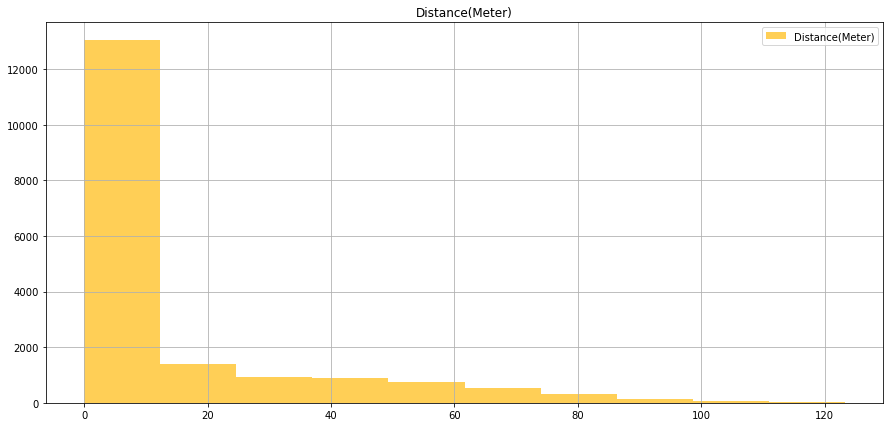

In [39]:
df_temp.hist(column='Distance(Meter)',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

array([[<AxesSubplot:title={'center':'total_day'}>]], dtype=object)

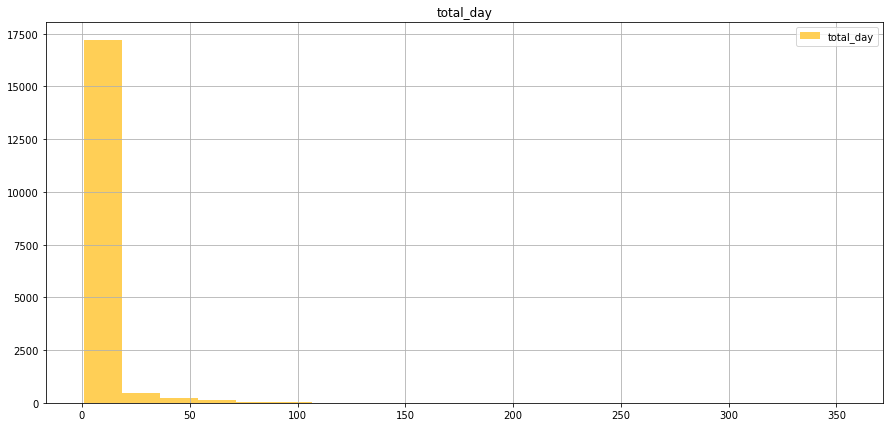

In [40]:
df_temp.hist(column='total_day',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56',
             bins=20)

array([[<AxesSubplot:title={'center':'total_signal'}>]], dtype=object)

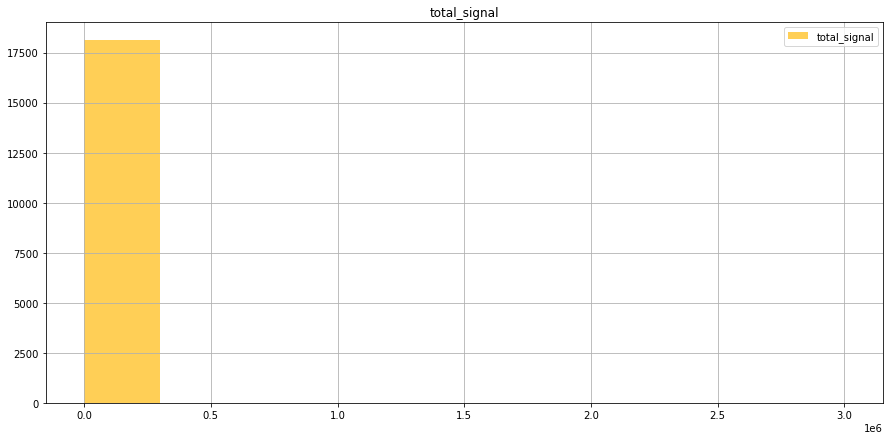

In [41]:
df_temp.hist(column='total_signal',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

In [42]:
df_temp.describe()

Distance(Meter)     total_day  total_signal       Weekday  \
count     18120.000000  18120.000000  1.812000e+04  18120.000000   
mean         13.249929      3.827483  3.930091e+03      3.757837   
std          22.670851     11.224458  4.083016e+04     10.601709   
min           0.000000      1.000000  2.000000e+00      0.000000   
25%           0.000000      1.000000  1.300000e+01      1.000000   
50%           0.129489      1.000000  1.300000e+01      1.000000   
75%          16.170744      1.000000  2.600000e+01      1.000000   
max         123.287680    354.000000  3.002585e+06    252.000000   

            Weekend  avg_time_per_day  
count  18120.000000      18120.000000  
mean       0.069647          0.853126  
std        1.532439          2.029825  
min        0.000000          0.000000  
25%        0.000000          0.031357  
50%        0.000000          0.032584  
75%        0.000000          0.155155  
max      102.000000         23.656461

## Define the characteristics of Mac ID

Fixed device:
1. Distance < 45 meters
2. Frequency in days >= 5 days / a year
3. Contain data in weekends
4. TODO: Data present whole days
5. TODO: High density: low variance

Mobile device:
1. Distance >= 45 meters 

TODO: 
 - Security guard: 
 1. Night shift
 2. Frequency in days > 5
 3. Contain data in weekend
 - Employee:
 1. Frequency in days > 5
 2. No weekends
 - Visitors:
 1. Frequency in days <= 5
 2. No weekends

In [43]:
# Define the Job function
df_temp['Mobile_or_fixed'] = 'Mobile Device'
df_temp.loc[df_temp['Distance(Meter)']<5, 'Mobile_or_fixed'] = 'Fixed Device'
df_temp

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
0      00:06:c6:5a:a2:51         7.312639          1            15      1.0   
1      00:08:22:00:b9:fb         0.085973          1            13      1.0   
2      00:08:22:0e:c4:fb         0.000000          1             2      1.0   
3      00:08:22:12:c5:fb         1.321080          2            26      2.0   
4      00:08:22:20:bc:fb        19.917625          1             6      1.0   
...                  ...              ...        ...           ...      ...   
18115  fc:d8:48:80:ab:de        32.174643          2           315      2.0   
18116  fc:db:b3:30:28:c9         0.000000          1            13      1.0   
18117  fc:db:b3:31:4e:a8         0.000000          1            13      1.0   
18118  fc:f8:ae:5a:6f:ea        26.020636          1           321      1.0   
18119  fc:fc:48:36:16:6b        40.561440          1           114      1.0   

       Weekend             set  avg_time_per_day Mobile_or_fixed  
0          0.0  {working_hour}          0.038784   Mobile Device  
1          0.0  {working_hour}          0.033294    Fixed Device  
2          0.0  {working_hour}          0.026206    Fixed Device  
3          0.0  {working_hour}          0.031878    Fixed Device  
4          0.0  {working_hour}          0.246120   Mobile Device  
...        ...             ...               ...             ...  
18115      0.0  {working_hour}          0.433865   Mobile Device  
18116      0.0  {working_hour}          0.034020    Fixed Device  
18117      0.0  {working_hour}          0.031485    Fixed Device  
18118      0.0  {working_hour}          0.933199   Mobile Device  
18119      0.0  {working_hour}          0.614165   Mobile Device  

[18120 rows x 9 columns]

In [44]:
df_temp["Mobile_or_fixed"].value_counts()

Fixed Device     11322
Mobile Device     6798
Name: Mobile_or_fixed, dtype: int64

In [45]:
#Select fixed device
Fix_device = df_temp[df_temp['Mobile_or_fixed']=='Fixed Device'].sort_values('Distance(Meter)', ascending=False)
Fix_device

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
8328   80:58:f8:cc:10:67         4.997148          1            13      1.0   
6276   74:c1:4f:7b:71:1c         4.992401          3            24      3.0   
14772  d0:77:14:7f:b9:2c         4.988431          1            13      1.0   
7539   80:58:f8:70:0f:66         4.977924          1            13      1.0   
14633  d0:77:14:74:85:9d         4.975688          1            13      1.0   
...                  ...              ...        ...           ...      ...   
6978   80:58:f8:31:2d:29         0.000000          1            12      1.0   
6982   80:58:f8:31:d7:08         0.000000          1            13      1.0   
6983   80:58:f8:32:08:28         0.000000          1            13      1.0   
6984   80:58:f8:32:08:f1         0.000000          1            12      1.0   
18117  fc:db:b3:31:4e:a8         0.000000          1            13      1.0   

       Weekend             set  avg_time_per_day Mobile_or_fixed  
8328       0.0  {working_hour}          0.032159    Fixed Device  
6276       0.0  {working_hour}          0.098504    Fixed Device  
14772      0.0  {working_hour}          0.033606    Fixed Device  
7539       0.0  {working_hour}          0.033331    Fixed Device  
14633      0.0  {working_hour}          0.033730    Fixed Device  
...        ...             ...               ...             ...  
6978       0.0  {working_hour}          0.031270    Fixed Device  
6982       0.0  {working_hour}          0.033192    Fixed Device  
6983       0.0  {working_hour}          0.031558    Fixed Device  
6984       0.0  {working_hour}          0.030897    Fixed Device  
18117      0.0  {working_hour}          0.031485    Fixed Device  

[11322 rows x 9 columns]

In [46]:
Fix_device['total_day'].dtype

dtype('int64')

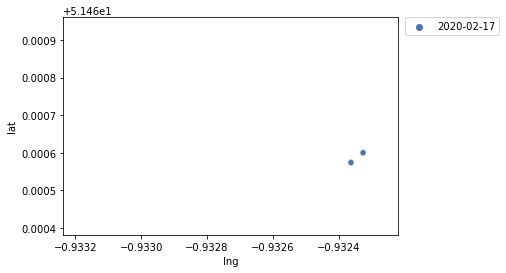

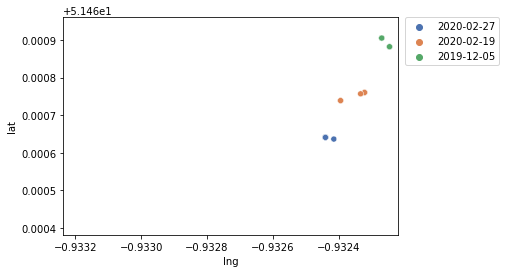

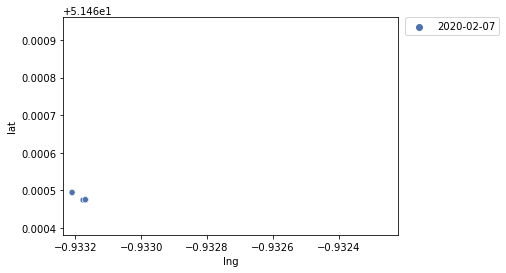

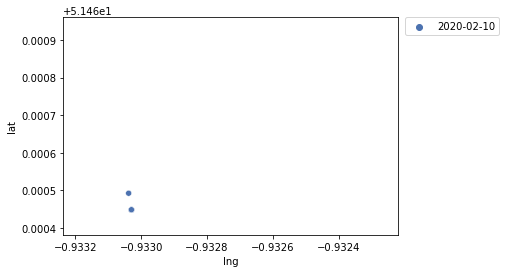

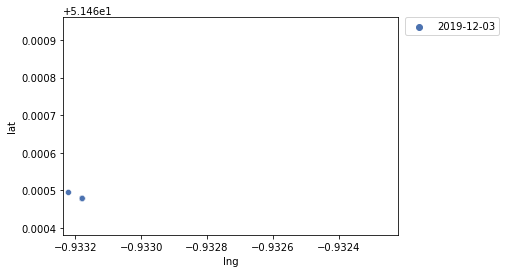

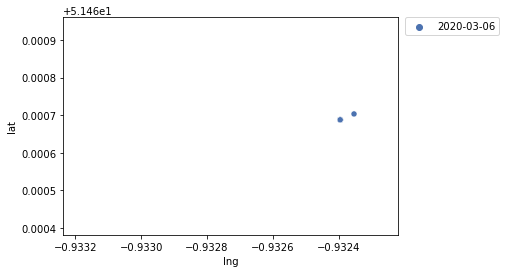

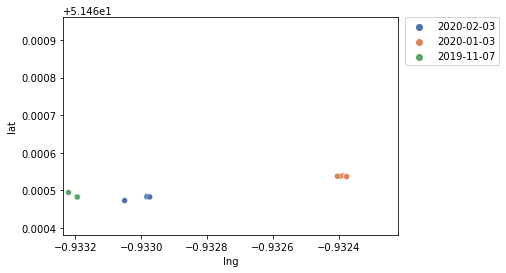

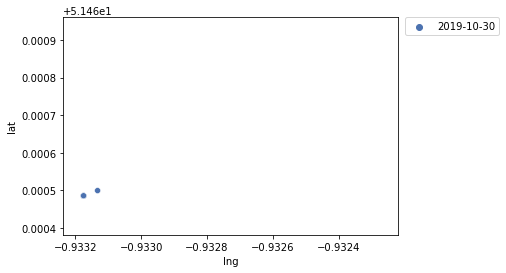

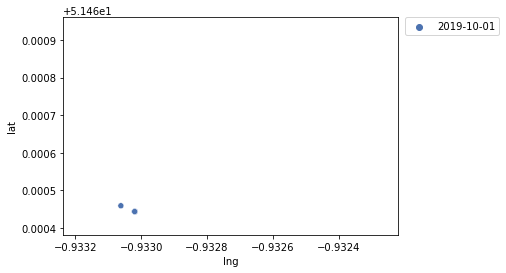

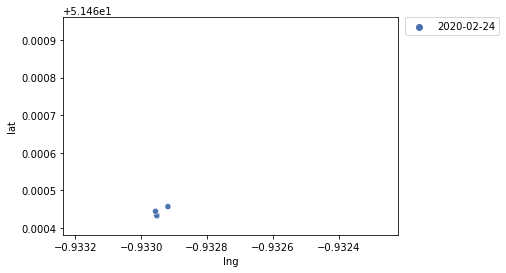

In [47]:
# Assign color for different days
top10_fix = np.array(Fix_device['ClientMacAddr'])[:10]
Fix_device_pattern = df[df['ClientMacAddr'].isin(top10_fix)]

# print(top10_fix)
for i in top10_fix:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [48]:
# Create mobile device df
Mobile_device = df_temp[df_temp['Mobile_or_fixed']=='Mobile Device'].sort_values('Distance(Meter)', ascending=False)
print(Mobile_device.shape)
Mobile_device.head()

(6798, 9)


ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
12927  c0:e8:62:3f:c1:3f       123.287680          1           241      1.0   
16309  d4:d2:52:86:f3:da       122.892808          1          2502      1.0   
8862   84:ad:8d:66:24:2b       121.868253          1          2340      1.0   
1138   18:81:0e:4c:75:f6       121.271258          1          2384      1.0   
1293   24:1b:7a:b6:2e:76       121.240430          1          1415      1.0   

       Weekend             set  avg_time_per_day Mobile_or_fixed  
12927      0.0  {working_hour}          6.699619   Mobile Device  
16309      0.0  {working_hour}          7.956360   Mobile Device  
8862       0.0  {working_hour}          9.823800   Mobile Device  
1138       0.0  {working_hour}          8.550128   Mobile Device  
1293       0.0  {working_hour}          5.383164   Mobile Device

In [284]:
#Create a grid function to grid the space and plot the gridded space
import string

def createGrid(bl, tr, dim):
    hor_unit = abs(bl[1] - tr[1])/dim
    vert_unit = abs(tr[0] - bl[0])/dim
    grid_dict = {}
    for y in range(dim): 
        count = 1
        for x in range(dim):
            grid_dict[str(string.ascii_uppercase[y] + str(count))] = [[bl[0] + y*vert_unit, bl[1] + x*hor_unit],[bl[0] + (y+1)*vert_unit, bl[1] + (x+1)*hor_unit]]
            count += 1
    return grid_dict


def plotGrid(bl, tr, dim, figsize):
    hor_unit = abs(bl[1] - tr[1])/dim
    vert_unit = abs(tr[0] - bl[0])/dim
    plt.rcParams["figure.figsize"] = figsize
    for x in range(dim):
        plt.axvline(x = min(tr[1],bl[1]) + x*hor_unit, c = 'red', lw = 0.65)
    for y in range(dim):
        plt.axhline(y = min(bl[0], tr[0]) + y*vert_unit, c = 'red', lw = 0.65)
    
    plt.xlim(bl[1], tr[1])
    plt.ylim(bl[0], tr[0])
    plt.ylabel('Lattitude')
    plt.xlabel('Longitude')
    

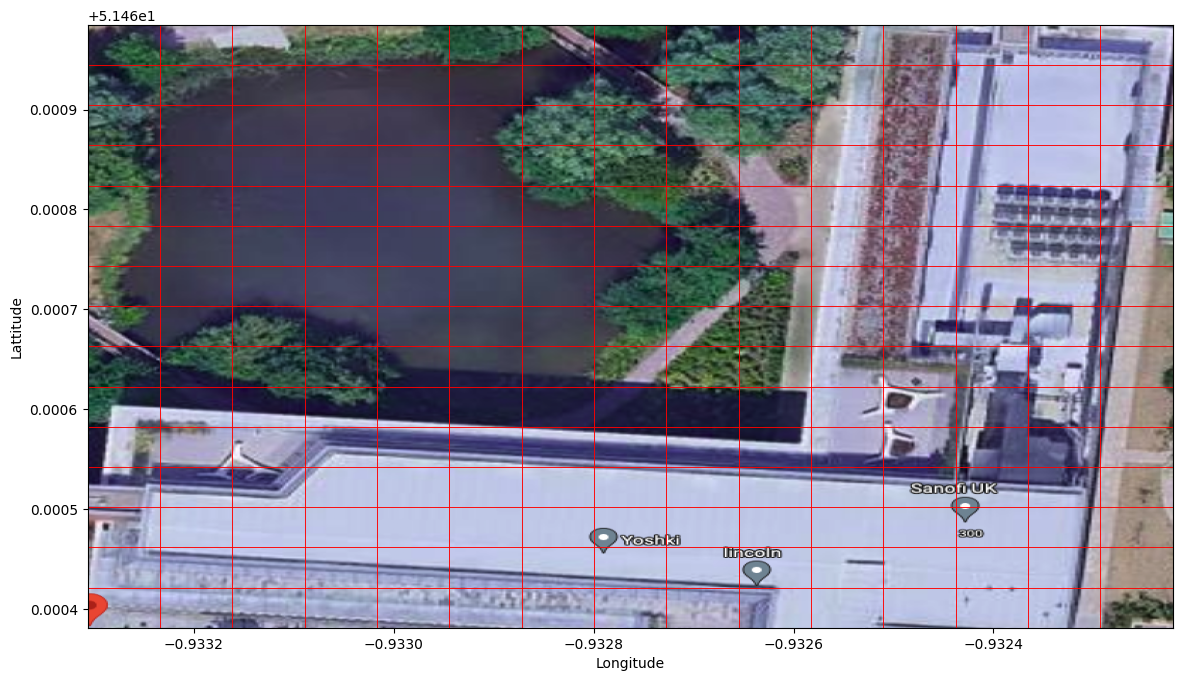

In [287]:
#Record the bottom left and top right coordinates of the square area surrounding the building
bl = [51.46038149506283, -0.9333064334614474]
tr = [51.460984859445034, -0.9322208241894918]
dim =15

gridDF = pd.DataFrame(createGrid(bl,tr,dim))
#Plot the grid with desired dimension to view the building and grid areas
plotGrid(bl, tr, dim, [14,9])
BBox = ((bl[1],tr[1],      
        bl[0],tr[0]))
layout = plt.imread('Layout.png')
plt.imshow(layout, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
plotGrid(bl, tr, dim, [10,8])

## Filter out mac id that occurs in the designed space

In [49]:
df_office = df.query("lat>=51.46086267643394 and lat<=51.46093167542239")
df_office = df_office.query("lng>=-0.93233819710921 and lng<=-0.9322256859342483")
unique_office_mac = df_office["ClientMacAddr"].unique()
len(unique_office_mac)

1800

In [50]:
# # Select mac id that is mobile, occurs in the designed area, and weekday only
# df_office = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
#                (df['ClientMacAddr'].isin(unique_office_mac)) &
#                (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
# print(len(df_office["ClientMacAddr"].unique()))

# # Pick only 20 mac id
# for i in df_office["ClientMacAddr"].unique()[:20]:
#     print(i)
#     person = df[df['ClientMacAddr'] == i]
#     # Color category by date
#     sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
#     plt.xlim([min_lng, max_lng])
#     plt.ylim([min_lat, max_lat])
#     plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#     plt.show()

In [51]:
# # Plot the category color by level, not date
# for i in df_office["ClientMacAddr"].unique()[:20]:
#     person = df[df['ClientMacAddr'] == i]
#     sns.scatterplot(x="lng", y="lat", data=person, hue="Level", palette="deep")
#     plt.xlim([min_lng, max_lng])
#     plt.ylim([min_lat, max_lat])
#     plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#     plt.show()

In [52]:
# bottom_left_it_office = 51.460829310334326, -0.9325432832801082
# top_right_it_office   = 51.46095700368193, -0.9322479152569846

# bottom_left_engineer_room = 51.46062086895524, -0.9325704089148847
# top_right_engineer_room   = 51.460739173638565, -0.9322961386076987

# bottom_left_entrance = 51.46039535635214, -0.9325788352265879
# top_right_entrance = 51.46050255994146, -0.9323193329736676

# bottom_left_canteen = 51.46042877285531, -0.9332653621565505
# top_right_canteen = 51.46048718462074, -0.9328699790307564

# bottom_left_conference_rooms = 51.46053543776189, -0.9332449815830561
# top_right_conference_rooms = 51.46056005640908, -0.9327219498297091

## Count number of signals that belong to designated areas

In [53]:
## Select only 2nd floor, mobile mac id, and weekday data
df_mobile = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['Level'].isin(["2nd Floor"])) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
df_mobile

Site      Level      ClientMacAddr        lat       lng  \
9502669   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502670   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502671   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502672   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502673   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
...             ...        ...                ...        ...       ...   
71213803  UK Office  2nd Floor  9c:da:3e:69:ca:80  51.460805 -0.932318   
71213804  UK Office  2nd Floor  88:66:a5:10:be:cb  51.460789 -0.932316   
71213805  UK Office  2nd Floor  98:10:e8:07:e1:12  51.460633 -0.932309   
71213806  UK Office  2nd Floor  34:f3:9a:c4:16:3e  51.460664 -0.932498   
71213807  UK Office  2nd Floor  4c:56:9d:6b:e2:d1  51.460735 -0.932377   

                                localtime                  normalized_time  \
9502669  2020-06-10 12:51:24.704000+00:00 2020-06-10 12:51:24.704000+00:00   
9502670  2020-06-10 12:51:19.490000+00:00 2020-06-10 12:51:19.490000+00:00   
9502671  2020-06-10 12:51:09.136000+00:00 2020-06-10 12:51:09.136000+00:00   
9502672  2020-06-10 12:50:56.894000+00:00 2020-06-10 12:50:56.894000+00:00   
9502673  2020-06-10 12:50:48.849000+00:00 2020-06-10 12:50:48.849000+00:00   
...                                   ...                              ...   
71213803 2020-03-03 16:46:09.590000+00:00 2020-03-03 16:46:09.590000+00:00   
71213804 2020-03-03 16:46:09.590000+00:00 2020-03-03 16:46:09.590000+00:00   
71213805 2020-03-03 16:46:09.517000+00:00 2020-03-03 16:46:09.517000+00:00   
71213806 2020-03-03 16:46:09.506000+00:00 2020-03-03 16:46:09.506000+00:00   
71213807 2020-03-03 16:46:09.506000+00:00 2020-03-03 16:46:09.506000+00:00   

                date  min  hour  dayOfWeek  IsWeekend       session  
9502669   2020-06-10   51    12          2      False  working_hour  
9502670   2020-06-10   51    12          2      False  working_hour  
9502671   2020-06-10   51    12          2      False  working_hour  
9502672   2020-06-10   50    12          2      False  working_hour  
9502673   2020-06-10   50    12          2      False  working_hour  
...              ...  ...   ...        ...        ...           ...  
71213803  2020-03-03   46    16          1      False  working_hour  
71213804  2020-03-03   46    16          1      False  working_hour  
71213805  2020-03-03   46    16          1      False  working_hour  
71213806  2020-03-03   46    16          1      False  working_hour  
71213807  2020-03-03   46    16          1      False  working_hour  

[15911545 rows x 13 columns]

In [54]:
df_mobile['Level'].unique()

array(['2nd Floor'], dtype=object)

In [55]:
df_mobile = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['Level'].isin(["2nd Floor"])) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]

In [56]:
len(df_mobile['ClientMacAddr'].unique())

2264

In [57]:
len(Mobile_device['ClientMacAddr'].unique())

6798

In [288]:
def find_designated_space(lat, lng):
    bottom_left_it_office = gridDF["J12"][0]
    top_right_it_office   = gridDF["N15"][1]

    
    bottom_left_engineer_room = gridDF["E11"][0]
    top_right_engineer_room   = gridDF["I14"][1]

    bottom_left_entrance = gridDF["A10"][0]
    top_right_entrance = gridDF["A11"][1]
    
    
    bottom_left_canteen = gridDF["A1"][0]
    top_right_canteen = gridDF["C7"][1]


    bottom_left_conference_rooms =  gridDF["D1"][0]
    top_right_conference_rooms =  gridDF["E8"][1]
    
    bottom_left_training_center =  gridDF["B12"][0]
    top_right_training_center =  gridDF["D14"][1]
#     bottom_left_it_office = (51.46079754688419, -0.932543300159931)
#     top_right_it_office   = (51.46098040420442, -0.9322317891150113)

#     bottom_left_engineer_room = (51.46053965077327, -0.9325912535330138)
#     top_right_engineer_room   = (51.46076277798453, -0.9322830982136779)

#     bottom_left_entrance = (51.46030604220702, -0.932772184478665)
#     top_right_entrance = (51.46042969133505, -0.9325039535328952)
    
#     bottom_left_canteen = (51.46037535823833, -0.933292264577848)
#     top_right_canteen = (51.46045878152074, -0.9327547136518658)

#     bottom_left_conference_rooms = (51.460503615959965, -0.9332691578318232)
#     top_right_conference_rooms = (51.46056710279871, -0.9325986479131928)
    
#     bottom_left_training_center = (51.460381264360485, -0.9324809291429241)
#     top_right_training_center = (51.46050660159573, -0.9323173144061498)

    
    if lat >= bottom_left_it_office[0] and lat <= top_right_it_office[0] and lng >= bottom_left_it_office[1] and lng <= top_right_it_office[1]:
        designated_space = 'it_office'
    elif lat >= bottom_left_engineer_room[0] and lat <= top_right_engineer_room[0] and lng >= bottom_left_engineer_room[1] and lng <= top_right_engineer_room[1]:
        designated_space = 'engineering_room'
    elif lat >= bottom_left_entrance[0] and lat <= top_right_entrance[0] and lng >= bottom_left_entrance[1] and lng <= top_right_entrance[1]:
        designated_space = 'entrance'
    elif lat >= bottom_left_canteen[0] and lat <= top_right_canteen[0] and lng >= bottom_left_canteen[1] and lng <= top_right_canteen[1]:
        designated_space = 'canteen'
    elif lat >= bottom_left_conference_rooms[0] and lat <= top_right_conference_rooms[0] and lng >= bottom_left_conference_rooms[1] and lng <= top_right_conference_rooms[1]:
        designated_space = 'conference'
    elif lat >= bottom_left_training_center[0] and lat <= top_right_training_center[0] and lng >= bottom_left_training_center[1] and lng <= top_right_training_center[1]:
        designated_space = 'training_center'
    else:
        designated_space = 'not_in_any'
    
    return designated_space

In [289]:
df_mobile['designated_space'] = df_mobile.apply(lambda x: find_designated_space(x['lat'], x['lng']), axis=1)
df_mobile['designated_space'].value_counts()

/var/folders/_j/h7l14zmj2nj1q591lbmhszpm0000gn/T/ipykernel_24199/2016001482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile['designated_space'] = df_mobile.apply(lambda x: find_designated_space(x['lat'], x['lng']), axis=1)


engineering_room    3876264
canteen             3224000
it_office           2559064
not_in_any          1587838
training_center      854337
entrance             286868
conference             5033
Name: designated_space, dtype: int64

In [292]:
len(df_mobile['ClientMacAddr'].unique())

2862

In [293]:
######### I modified below parts ############

In [294]:
def choose_max_space(row):
    space_dict = {'canteen': row[2], 'conference': row[3], 'engineering_room': row[4],
                  'entrance': row[5], 'it_office': row[6], 'not_in_any':row[7],
                  'training_center': row[8]}
    max_area_spending = list(dict(sorted(space_dict.items(), key=lambda item: item[1], reverse=True)).keys())
    max_time_spending = list(dict(sorted(space_dict.items(), key=lambda item: item[1], reverse=True)).values())
    if max_time_spending[0] < 0.3:
#         print(max_time_spending)
        return 'security_guard'
    else:
        return max_area_spending[0]

In [295]:
df_mobile_space = df_mobile.groupby('ClientMacAddr')['designated_space'].value_counts(normalize=True).unstack().reset_index(drop=False).fillna(0)
print(df_mobile_space.columns)
#df_mobile_space = pd.merge(df_mobile_space, max_space_df, how='left', on = 'ClientMacAddr')
df_mobile_space["max_space"] = [choose_max_space(row) for row in df_mobile_space.itertuples()]
df_mobile_space.tail()

Index(['ClientMacAddr', 'canteen', 'conference', 'engineering_room',
       'entrance', 'it_office', 'not_in_any', 'training_center'],
      dtype='object', name='designated_space')


designated_space      ClientMacAddr   canteen  conference  engineering_room  \
2857              fc:62:b9:37:f1:b3  0.000000    0.000000          0.333333   
2858              fc:62:b9:9b:1e:2f  0.000000    0.000000          0.000000   
2859              fc:62:b9:ea:b4:b6  0.076923    0.923077          0.000000   
2860              fc:65:de:55:82:70  0.000000    0.000000          0.000000   
2861              fc:94:35:23:ee:a5  0.008264    0.479339          0.000000   

designated_space  entrance  it_office  not_in_any  training_center   max_space  
2857              0.000000   0.666667         0.0              0.0   it_office  
2858              0.000000   1.000000         0.0              0.0   it_office  
2859              0.000000   0.000000         0.0              0.0  conference  
2860              0.000000   1.000000         0.0              0.0   it_office  
2861              0.512397   0.000000         0.0              0.0    entrance

In [296]:
df_mobile_space['max_space'].value_counts()

canteen             1122
engineering_room     633
it_office            396
not_in_any           325
training_center      240
entrance             109
security_guard        22
conference            15
Name: max_space, dtype: int64

00:08:22:24:bd:fb
designated_space
ClientMacAddr       00:08:22:24:bd:fb
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          1.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                    entrance
Name: 0, dtype: object


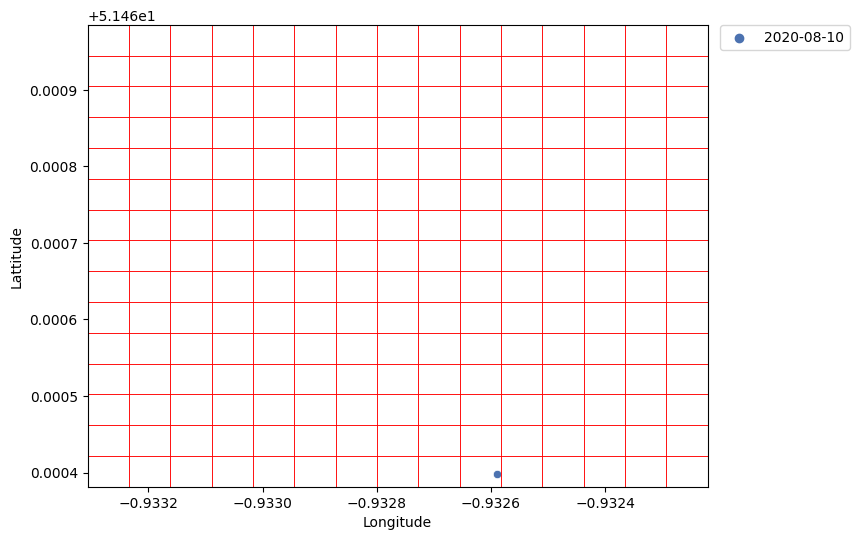

00:08:22:2e:17:fc
designated_space
ClientMacAddr       00:08:22:2e:17:fc
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         1.0
not_in_any                        0.0
training_center                   0.0
max_space                   it_office
Name: 1, dtype: object


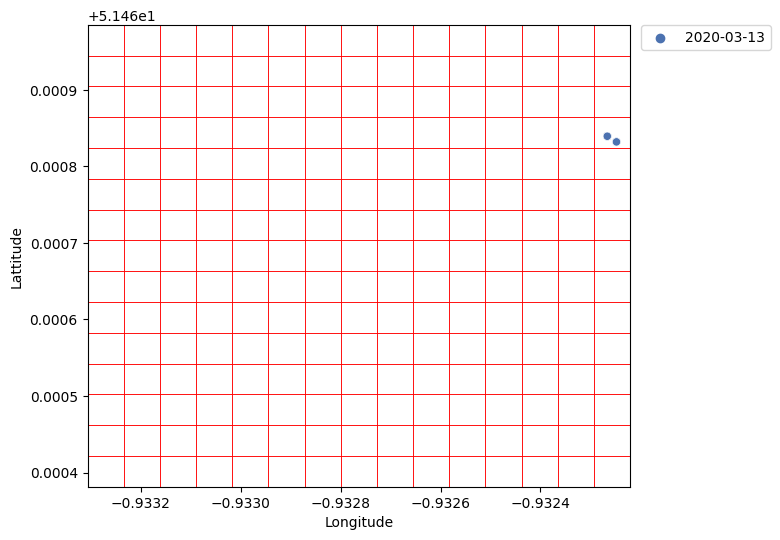

00:08:22:38:c2:fb
designated_space
ClientMacAddr       00:08:22:38:c2:fb
canteen                           0.0
conference                        0.0
engineering_room                  1.0
entrance                          0.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space            engineering_room
Name: 2, dtype: object


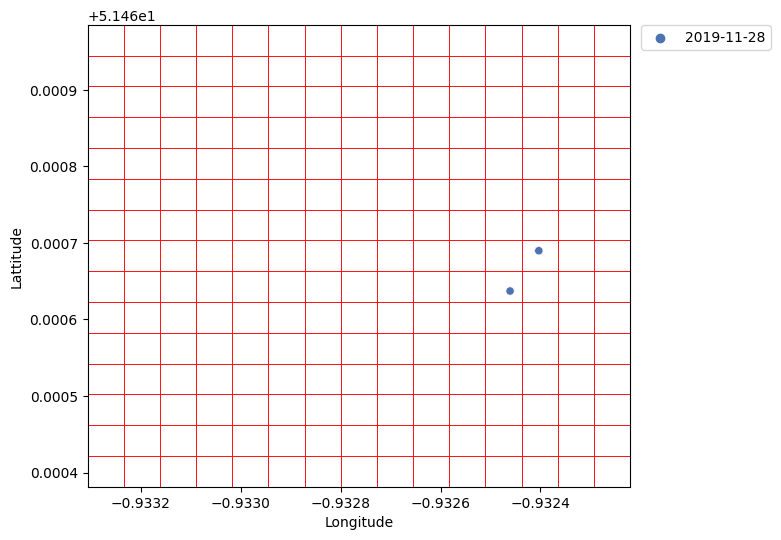

00:08:22:4c:f9:cd
designated_space
ClientMacAddr       00:08:22:4c:f9:cd
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         1.0
not_in_any                        0.0
training_center                   0.0
max_space                   it_office
Name: 3, dtype: object


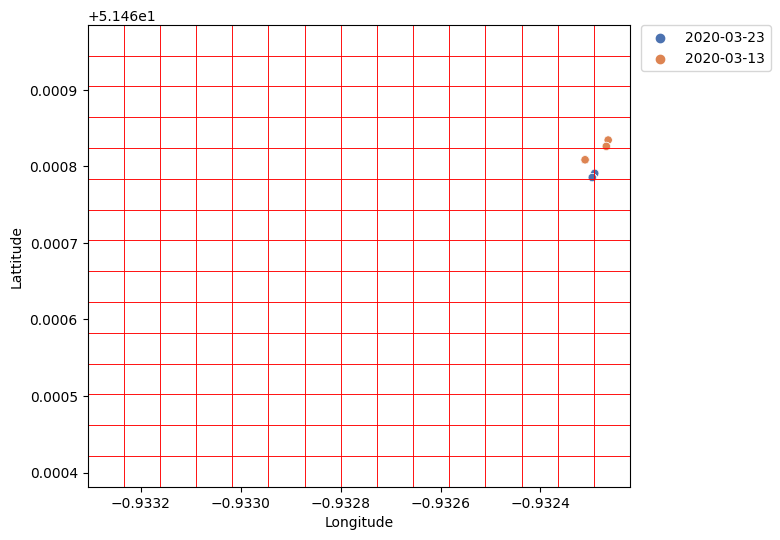

00:08:22:e0:ba:fb
designated_space
ClientMacAddr       00:08:22:e0:ba:fb
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          1.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                    entrance
Name: 4, dtype: object


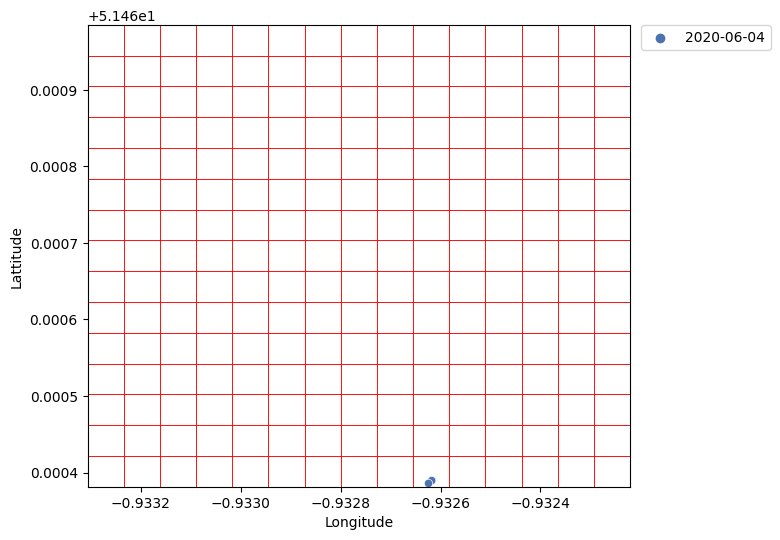

00:0b:82:d0:ff:35
designated_space
ClientMacAddr       00:0b:82:d0:ff:35
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          0.5
it_office                         0.0
not_in_any                        0.5
training_center                   0.0
max_space                    entrance
Name: 5, dtype: object


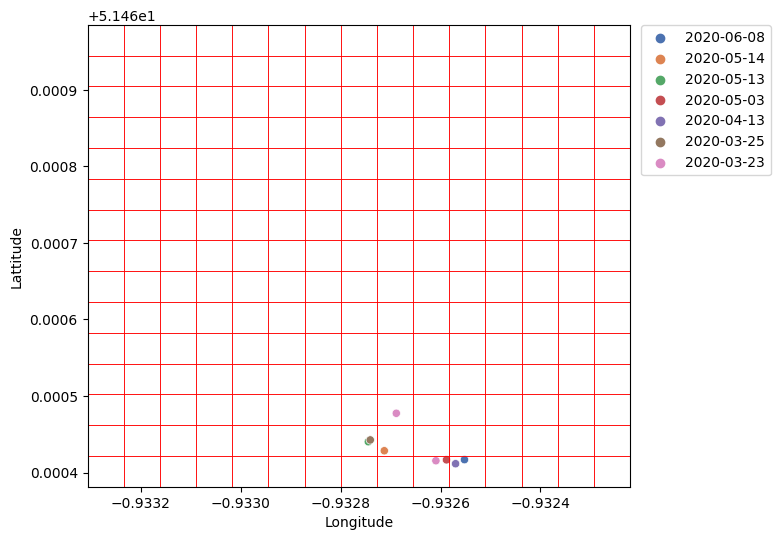

00:0c:e7:11:bf:cb
designated_space
ClientMacAddr       00:0c:e7:11:bf:cb
canteen                      0.923077
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         0.0
not_in_any                   0.076923
training_center                   0.0
max_space                     canteen
Name: 6, dtype: object


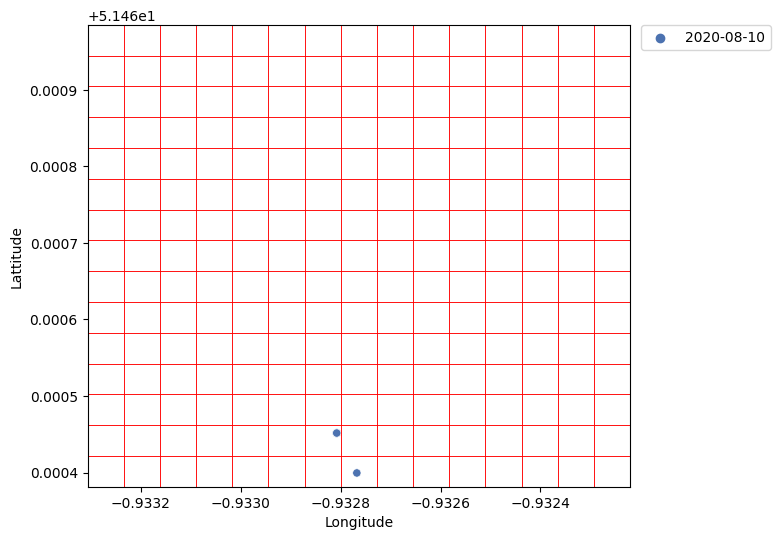

00:0c:e7:24:9c:29
designated_space
ClientMacAddr       00:0c:e7:24:9c:29
canteen                           1.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                     canteen
Name: 7, dtype: object


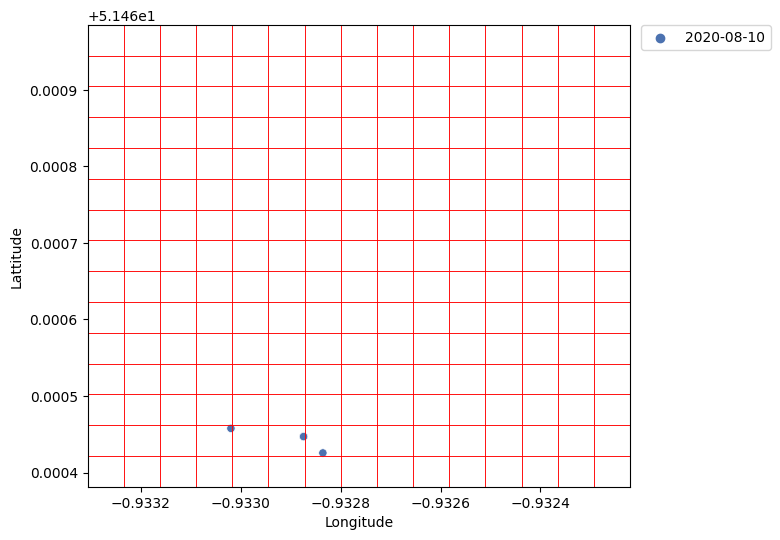

00:0c:e7:8d:79:f0
designated_space
ClientMacAddr       00:0c:e7:8d:79:f0
canteen                           0.0
conference                        0.0
engineering_room                  1.0
entrance                          0.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space            engineering_room
Name: 8, dtype: object


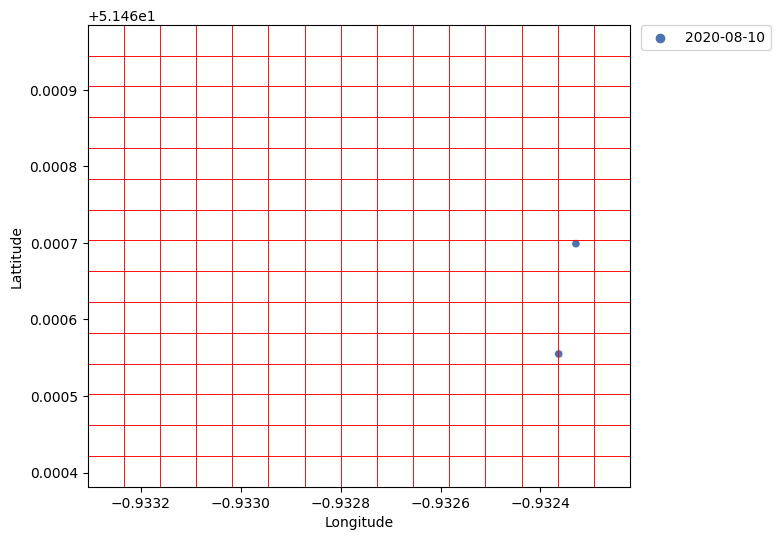

00:0c:e7:90:26:50
designated_space
ClientMacAddr       00:0c:e7:90:26:50
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         1.0
not_in_any                        0.0
training_center                   0.0
max_space                   it_office
Name: 9, dtype: object


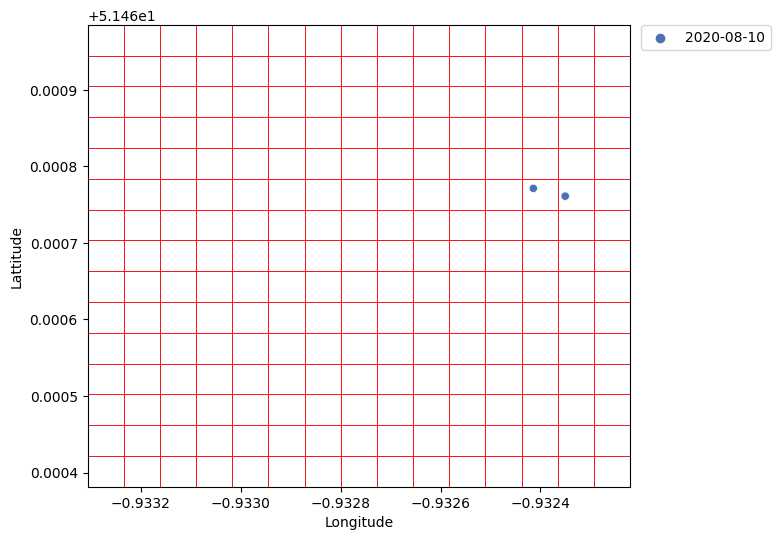

In [298]:
## plot the data with associated space
ind = 0
for i in df_mobile_space["ClientMacAddr"].unique()[:10]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    print(df_mobile_space.loc[ind,:])
    ind += 1
    # plot machinary colored by date
    data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="date", palette="deep")
    plotGrid(bl, tr, dim, [7,6])
#     plt.xlim([min_lng, max_lng])
#     plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [299]:
df_mobile_space.head()

designated_space      ClientMacAddr  canteen  conference  engineering_room  \
0                 00:08:22:24:bd:fb      0.0         0.0               0.0   
1                 00:08:22:2e:17:fc      0.0         0.0               0.0   
2                 00:08:22:38:c2:fb      0.0         0.0               1.0   
3                 00:08:22:4c:f9:cd      0.0         0.0               0.0   
4                 00:08:22:e0:ba:fb      0.0         0.0               0.0   

designated_space  entrance  it_office  not_in_any  training_center  \
0                      1.0        0.0         0.0              0.0   
1                      0.0        1.0         0.0              0.0   
2                      0.0        0.0         0.0              0.0   
3                      0.0        1.0         0.0              0.0   
4                      1.0        0.0         0.0              0.0   

designated_space         max_space  
0                         entrance  
1                        it_office  
2                 engineering_room  
3                        it_office  
4                         entrance

# Mobile device
## For 1st floor: (only weekday)
- "canteen":"canteen_worker",\
  "admin_office":"engineer", ## TODO: Change?\
  "assembly_line":"operator",\
  "entrance":"security_guard",\
  "control_rooms": "operator",\
  "lab": "researcher",\
  "storage": "storage worker",\
  "not_in_any": "visitor"
  
## For 2nd floor: (only weekday)
- Canteen workers  --> canteen && 2nd floor
- Engineers --> engineering_room && 2nd floor only
- IT Technicians --> it_office && 2nd floor only 
- Visitors --> come less than 5 days && spend most time at conference rooms and training center && weekday
- Intruders --> come at night only (between 10 PM. - 5 am.) both weekday and weekend and presence time at night < 2 hrs && present day < 2
- Security Guards --> stay mostly at the entrance || presence time >= 2 hrs for night shift both weekday and weekend || no specific place to stay (max_designated_space_percentage < 0.3)
- Machine Operators --> close to the machines/ 1st floor layout
- Vehicles --> move around the machines

## Fixed device
- Machinery --> 1st floor && Meters < 5m && occurence of days > 5 days
- Printers --> 2nd floor && Meters < 5m && occurence of days > 5 days


## TODO
- How to classify a mac id shows up both floors? --> Choose floor based on maximum time spending

In [67]:
# Create new column using dictionary
designated_space_mapping_dict = { 
             "canteen":"canteen_worker",
             "engineering_room":"engineer",
             "it_office":"IT_technician",
             "entrance":"security_guard",
             "conference": "engineer",
             "training_center": "visitor",
             "security_guard": "security_guard",
             "not_in_any": "visitor"
           }
  
# combine this new data with existing DataFrame
df_mobile_space["job_function"] = df_mobile_space["max_space"].map(designated_space_mapping_dict)

In [68]:
print(df_mobile_space['job_function'].value_counts(dropna=False))
df_mobile_space

canteen_worker    695
engineer          601
visitor           478
security_guard    254
IT_technician     236
Name: job_function, dtype: int64


designated_space      ClientMacAddr   canteen  conference  engineering_room  \
0                 00:06:c6:5a:a2:51  0.000000    0.000000          1.000000   
1                 00:08:22:24:bd:fb  0.000000    0.000000          0.000000   
2                 00:08:22:80:bb:fb  0.000000    0.000000          0.000000   
3                 00:08:22:da:bb:fb  0.000000    0.000000          0.000000   
4                 00:08:22:e0:ba:fb  0.000000    0.000000          0.000000   
...                             ...       ...         ...               ...   
2259              fc:62:b9:23:ea:05  0.975610    0.000000          0.000000   
2260              fc:62:b9:37:f1:b3  0.000000    0.000000          0.333333   
2261              fc:62:b9:ba:4d:77  0.000000    0.000000          0.000000   
2262              fc:94:35:23:ee:a5  0.403651    0.058824          0.112576   
2263              fc:aa:b6:2b:f0:9c  0.000000    0.071429          0.000000   

designated_space  entrance  it_office  not_in_any  training_center  \
0                 0.000000   0.000000    0.000000         0.000000   
1                 1.000000   0.000000    0.000000         0.000000   
2                 1.000000   0.000000    0.000000         0.000000   
3                 1.000000   0.000000    0.000000         0.000000   
4                 1.000000   0.000000    0.000000         0.000000   
...                    ...        ...         ...              ...   
2259              0.000000   0.000000    0.024390         0.000000   
2260              0.000000   0.666667    0.000000         0.000000   
2261              0.000000   1.000000    0.000000         0.000000   
2262              0.330629   0.005071    0.061866         0.027383   
2263              0.000000   0.000000    0.928571         0.000000   

designated_space         max_space    job_function  
0                 engineering_room        engineer  
1                         entrance  security_guard  
2                         entrance  security_guard  
3                         entrance  security_guard  
4                         entrance  security_guard  
...                            ...             ...  
2259                       canteen  canteen_worker  
2260                     it_office   IT_technician  
2261                     it_office   IT_technician  
2262                       canteen  canteen_worker  
2263                    not_in_any         visitor  

[2264 rows x 10 columns]

In [69]:
df_mobile_space['job_function'].value_counts()

canteen_worker    695
engineer          601
visitor           478
security_guard    254
IT_technician     236
Name: job_function, dtype: int64

In [70]:
print(df_mobile_space['max_space'].value_counts(dropna=False))

canteen             695
engineering_room    588
not_in_any          452
entrance            241
it_office           236
training_center      26
security_guard       13
conference           13
Name: max_space, dtype: int64


In [71]:
print(df_mobile_space['job_function'].value_counts(dropna=False))

canteen_worker    695
engineer          601
visitor           478
security_guard    254
IT_technician     236
Name: job_function, dtype: int64


In [72]:
Mobile_device = Mobile_device.merge(df_mobile_space[['ClientMacAddr','job_function']], on='ClientMacAddr', how='left').fillna("undefined")
Mobile_device.tail(30)

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
6768  08:c5:e1:ee:ee:0d         5.076744          3            72      3.0   
6769  38:80:df:1b:09:b0         5.076318          1            13      1.0   
6770  54:c9:df:9f:5d:aa         5.074406          8            96      8.0   
6771  ac:1f:74:16:5c:6d         5.072712         16           548     16.0   
6772  80:82:23:6c:a3:3a         5.070626          4            70      4.0   
6773  d0:77:14:56:aa:10         5.064207          1            13      1.0   
6774  38:80:df:17:14:36         5.055328          1            13      1.0   
6775  80:58:f8:ce:93:8f         5.054298          1            14      1.0   
6776  00:0c:e7:25:3e:8c         5.052467          1            13      1.0   
6777  d0:77:14:95:98:67         5.046683          1            14      1.0   
6778  80:58:f8:35:9d:bd         5.046683          1            14      1.0   
6779  d0:77:14:11:4c:7d         5.046553          1            13      1.0   
6780  00:08:22:80:bb:fb         5.046191          1             8      1.0   
6781  88:b4:a6:c2:50:eb         5.044996          1            13      1.0   
6782  80:58:f8:00:9f:f6         5.044044          1            13      1.0   
6783  08:cc:27:32:56:dc         5.040452          1            14      1.0   
6784  88:b4:a6:ce:5c:21         5.040452          1            13      1.0   
6785  80:58:f8:a8:91:7a         5.035022          1             2      1.0   
6786  80:58:f8:11:8c:ac         5.034346          1            13      1.0   
6787  38:80:df:5f:e0:bc         5.030738          1            13      1.0   
6788  00:0c:e7:66:3f:57         5.029300          1            14      1.0   
6789  d0:77:14:0a:1d:71         5.028210          1             5      1.0   
6790  a4:c3:f0:a5:f1:27         5.027636          1             4      1.0   
6791  f4:f5:24:cb:7f:fa         5.024890          2            20      2.0   
6792  5c:5f:67:8b:1b:f5         5.023312          1            13      1.0   
6793  d0:77:14:8d:dc:a3         5.017370          1            13      1.0   
6794  d0:77:14:74:a3:e9         5.006274          1            13      1.0   
6795  c4:36:6c:1a:6a:5c         5.005079          5            61      5.0   
6796  f4:f5:24:21:2e:a9         5.004640          1            13      1.0   
6797  a8:db:03:db:d5:1b         5.001321          1            13      1.0   

      Weekend             set  avg_time_per_day Mobile_or_fixed  \
6768      0.0  {working_hour}          0.074744   Mobile Device   
6769      0.0  {working_hour}          0.033616   Mobile Device   
6770      0.0  {working_hour}          0.053637   Mobile Device   
6771      0.0  {working_hour}          1.368189   Mobile Device   
6772      0.0  {working_hour}          0.877041   Mobile Device   
6773      0.0  {working_hour}          0.032579   Mobile Device   
6774      0.0  {working_hour}          0.032871   Mobile Device   
6775      0.0  {working_hour}          0.034184   Mobile Device   
6776      0.0  {working_hour}          0.031195   Mobile Device   
6777      0.0  {working_hour}          0.034238   Mobile Device   
6778      0.0  {working_hour}          0.034202   Mobile Device   
6779      0.0  {working_hour}          0.032317   Mobile Device   
6780      0.0  {working_hour}          0.574059   Mobile Device   
6781      0.0  {working_hour}          0.032208   Mobile Device   
6782      0.0  {working_hour}          0.031717   Mobile Device   
6783      0.0  {working_hour}          0.034598   Mobile Device   
6784      0.0  {working_hour}          0.033593   Mobile Device   
6785      0.0  {working_hour}          0.096482   Mobile Device   
6786      0.0  {working_hour}          0.031003   Mobile Device   
6787      0.0  {working_hour}          0.032194   Mobile Device   
6788      0.0  {working_hour}          0.034649   Mobile Device   
6789      0.0  {working_hour}          0.010363   Mobile Device   
6790      0.0  {working_hour}          0.035415   

In [73]:
# Identify intruders and security guards based on following logic
def is_intruder(row):
    if row['job_function'] == 'undefined':
        session = list(row['set'])
        # If this mac address comes at night and spend less than 2 hours, we would say it is intruders
        if len(session) < 2 and 'night_time' in session:
            if row['avg_time_per_day'] < 2 and row['total_day'] < 2: 
                return 'intruder'
            elif row['avg_time_per_day'] >= 2: 
                return 'security_guard'
            else:
                return 'undefined'
        else:
            return 'undefined'
    else:
        return row['job_function']

Mobile_device['job_function'] = Mobile_device.apply(is_intruder, axis=1)

In [74]:
Mobile_device['job_function'].value_counts(dropna=False)

undefined         4532
canteen_worker     695
engineer           601
visitor            478
security_guard     254
IT_technician      236
intruder             2
Name: job_function, dtype: int64

In [75]:
Mobile_device[Mobile_device['job_function']=='intruder']

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
571  40:83:de:61:09:1d        74.116909          1             4      1.0   
797  40:83:de:61:68:92        68.894020          1             4      1.0   

     Weekend           set  avg_time_per_day Mobile_or_fixed job_function  
571      0.0  {night_time}          0.076511   Mobile Device     intruder  
797      0.0  {night_time}          0.027262   Mobile Device     intruder

In [76]:
df_mobile_space.head()

designated_space      ClientMacAddr  canteen  conference  engineering_room  \
0                 00:06:c6:5a:a2:51      0.0         0.0               1.0   
1                 00:08:22:24:bd:fb      0.0         0.0               0.0   
2                 00:08:22:80:bb:fb      0.0         0.0               0.0   
3                 00:08:22:da:bb:fb      0.0         0.0               0.0   
4                 00:08:22:e0:ba:fb      0.0         0.0               0.0   

designated_space  entrance  it_office  not_in_any  training_center  \
0                      0.0        0.0         0.0              0.0   
1                      1.0        0.0         0.0              0.0   
2                      1.0        0.0         0.0              0.0   
3                      1.0        0.0         0.0              0.0   
4                      1.0        0.0         0.0              0.0   

designated_space         max_space    job_function  
0                 engineering_room        engineer  
1                         entrance  security_guard  
2                         entrance  security_guard  
3                         entrance  security_guard  
4                         entrance  security_guard

In [77]:
df.head()

Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                         localtime                  normalized_time  \
0 2020-09-01 23:58:49.582000+00:00 2020-09-01 23:58:49.582000+00:00   
1 2020-09-01 23:58:38.112000+00:00 2020-09-01 23:58:38.112000+00:00   
2 2020-09-01 23:58:29.514000+00:00 2020-09-01 23:58:29.514000+00:00   
3 2020-09-01 23:58:18.046000+00:00 2020-09-01 23:58:18.046000+00:00   
4 2020-09-01 23:58:09.522000+00:00 2020-09-01 23:58:09.522000+00:00   

         date  min  hour  dayOfWeek  IsWeekend     session  
0  2020-09-01   58    23          1      False  night_time  
1  2020-09-01   58    23          1      False  night_time  
2  2020-09-01   58    23          1      False  night_time  
3  2020-09-01   58    23          1      False  night_time  
4  2020-09-01   58    23          1      False  night_time

40:83:de:61:09:1d


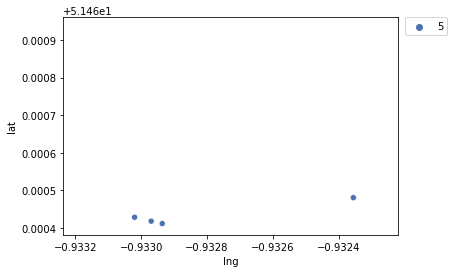

40:83:de:61:68:92


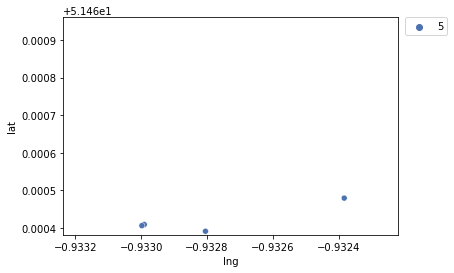

In [78]:
## plot the data with associated space
ind = 0
for i in Mobile_device[Mobile_device['job_function']=='intruder']["ClientMacAddr"][:10]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    #print(df_mobile_space[df_mobile_space['ClientMacAddr'] == i])
    ind += 1
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[df['ClientMacAddr'] == i]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="hour", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [79]:
############### End of changes #######################

## Count number of signals that belong to designated areas (1st Floor)

In [290]:
def find_designated_space_1F(lat, lng):
    # Canteen
    bottom_left_canteen = gridDF["J12"][0]
    top_right_canteen   = gridDF["O15"][1]
    
    # Lab
    bottom_left_lab = gridDF["E12"][0]
    top_right_lab = gridDF["I14"][1]
    
    # Entrance
    bottom_left_entrance = gridDF["A10"][0]
    top_right_entrance = gridDF["A11"][1]
    
    # Assembly Line
    bottom_left_assemblyline = gridDF["A1"][0]
    top_right_assemblyline = gridDF["E5"][1]
    
    # Control room
    bottom_left_control_rooms = gridDF["A6"][0]
    top_right_control_rooms = gridDF["D8"][1]

    # Storage
    bottom_left_storage = gridDF["B9"][0]
    top_right_storage = gridDF["D11"][1]
    
    # Admin office
    bottom_left_admin_office = gridDF["A12"][0]
    top_right_admin_office = gridDF["D13"][1]
    # Canteen
#     bottom_left_canteen = (51.46079754688419, -0.932543300159931)
#     top_right_canteen   = (51.46098040420442, -0.9322317891150113)
    
#     # Lab
#     bottom_left_lab = (51.460511289004344, -0.9325966645999756)
#     top_right_lab = (51.46076277798453, -0.9322830982136779)
    
#     # Entrance
#     bottom_left_entrance = (51.46030604220702, -0.932772184478665)
#     top_right_entrance = (51.46038783329849, -0.9325170620291541)
    
#     # Assembly Line
#     bottom_left_assemblyline = (51.46037535823833, -0.933292264577848)
#     top_right_assemblyline = (51.46053231597175, -0.9329178977311808)
    
#     # Control room
#     bottom_left_control_rooms = (51.46036351126477, -0.9329178977311808)
#     top_right_control_rooms = (51.4605206006061, -0.9327703787013455)

    # Storage
#     bottom_left_storage = (51.46036685171761, -0.932772184478665)
#     top_right_storage = (51.460505605290635, -0.9326059032401409)
    
#     # Admin office
#     bottom_left_admin_office = (51.46035352283357, -0.9325924891387347)
#     top_right_admin_office = (51.46047718898315, -0.9323189038465033)
    
    if lat >= bottom_left_canteen[0] and lat <= top_right_canteen[0] and lng >= bottom_left_canteen[1] and lng <= top_right_canteen[1]:
        designated_space = 'canteen'
    elif lat >= bottom_left_lab[0] and lat <= top_right_lab[0] and lng >= bottom_left_lab[1] and lng <= top_right_lab[1]:
        designated_space = 'lab'
    elif lat >= bottom_left_entrance[0] and lat <= top_right_entrance[0] and lng >= bottom_left_entrance[1] and lng <= top_right_entrance[1]:
        designated_space = 'entrance'
    elif lat >= bottom_left_assemblyline[0] and lat <= top_right_assemblyline[0] and lng >= bottom_left_assemblyline[1] and lng <= top_right_assemblyline[1]:
        designated_space = 'assembly_line'
    elif lat >= bottom_left_control_rooms[0] and lat <= top_right_control_rooms[0] and lng >= bottom_left_control_rooms[1] and lng <= top_right_control_rooms[1]:
        designated_space = 'control_rooms'
    elif lat >= bottom_left_storage[0] and lat <= top_right_storage[0] and lng >= bottom_left_storage[1] and lng <= top_right_storage[1]:
        designated_space = 'storage'
    elif lat >= bottom_left_admin_office[0] and lat <= top_right_admin_office[0] and lng >= bottom_left_admin_office[1] and lng <= top_right_admin_office[1]:
        designated_space = 'admin_office'
    else:
        designated_space = 'not_in_any'
    
    return designated_space

### Mobile Device

In [300]:
Mobile_device_1F = Mobile_device[Mobile_device['job_function']=='undefined']
print(len(Mobile_device_1F['ClientMacAddr'].unique()))
# print(len(Mobile_device_1F[Mobile_device_1F['Weekend']==0]['ClientMacAddr'].unique()))

0


In [301]:
## Select only 1st floor, mobile mac id, and weekday data
# df_mobile_1F = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
#                (df['Level'].isin(["1st Floor"])) &
#                (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
df_mobile_1F = df[df['ClientMacAddr'].isin(Mobile_device_1F["ClientMacAddr"])]
df_mobile_1F

Empty DataFrame
Columns: [Site, Level, ClientMacAddr, lat, lng, localtime, normalized_time, date, hour, dayOfWeek, IsWeekend, session, job_function, veh_authority_level, min]
Index: []

In [302]:
df_mobile_1F['designated_space'] = df_mobile_1F.apply(lambda x: find_designated_space_1F(x['lat'], x['lng']), axis=1)
df_mobile_1F['designated_space'].value_counts()

ValueError: Expected a 1D array, got an array with shape (0, 15)

In [84]:
len(df_mobile_1F['ClientMacAddr'].unique())

4532

In [85]:
def choose_max_space_1F(row):
    space_dict = {'admin_office': row[2], 'assembly_line': row[3], 'canteen': row[4],
                  'control_rooms': row[5], 'entrance': row[6], 'lab':row[7], 
                  'not_in_any':row[8], 'storage':row[9]}
    return list(dict(sorted(space_dict.items(), key=lambda item: item[1], reverse=True)).keys())[0]

In [86]:
df_mobile_space_1F = df_mobile_1F.groupby('ClientMacAddr')['designated_space'].value_counts(normalize=True).unstack().reset_index(drop=False).fillna(0)
print(df_mobile_space_1F.columns)
df_mobile_space_1F["max_space"] = [choose_max_space_1F(row) for row in df_mobile_space_1F.itertuples()]
df_mobile_space_1F.tail()


Index(['ClientMacAddr', 'admin_office', 'assembly_line', 'canteen',
       'control_rooms', 'entrance', 'lab', 'not_in_any', 'storage'],
      dtype='object', name='designated_space')


designated_space      ClientMacAddr  admin_office  assembly_line   canteen  \
4527              fc:a4:79:ad:0e:71      0.000000       0.000000  0.000000   
4528              fc:a6:67:be:c0:a5      0.047695       0.000000  0.052464   
4529              fc:d8:48:80:ab:de      0.003175       0.415873  0.000000   
4530              fc:f8:ae:5a:6f:ea      0.193146       0.000000  0.000000   
4531              fc:fc:48:36:16:6b      0.000000       0.000000  0.245614   

designated_space  control_rooms  entrance       lab  not_in_any   storage  \
4527                    0.00000  0.000000  0.714286    0.285714  0.000000   
4528                    0.00159  0.000000  0.845787    0.052464  0.000000   
4529                    0.00000  0.174603  0.000000    0.000000  0.406349   
4530                    0.00000  0.000000  0.803738    0.003115  0.000000   
4531                    0.00000  0.000000  0.438596    0.315789  0.000000   

designated_space      max_space  
4527                        lab  
4528                        lab  
4529              assembly_line  
4530                        lab  
4531                        lab

In [87]:
df_mobile_space_1F['max_space'].value_counts()

assembly_line    1149
lab               800
not_in_any        661
control_rooms     541
storage           520
admin_office      427
canteen           417
entrance           17
Name: max_space, dtype: int64

00:08:22:20:bc:fb
designated_space
ClientMacAddr    00:08:22:20:bc:fb
admin_office              0.666667
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                  0.166667
lab                            0.0
not_in_any                     0.0
storage                   0.166667
max_space             admin_office
Name: 0, dtype: object


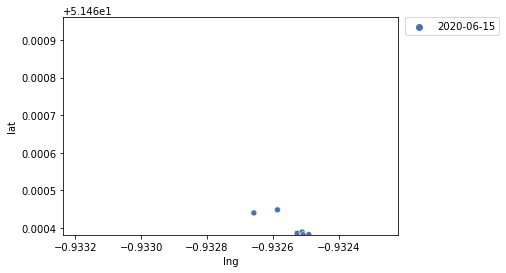

00:08:22:24:b7:fb
designated_space
ClientMacAddr    00:08:22:24:b7:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                       0.909091
not_in_any                0.090909
storage                        0.0
max_space                      lab
Name: 1, dtype: object


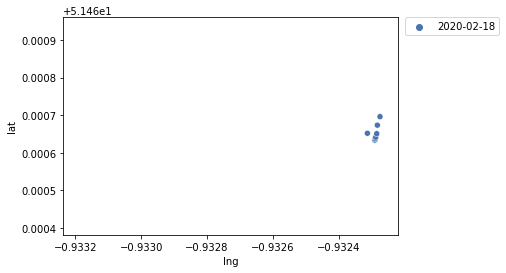

00:08:22:26:bb:fb
designated_space
ClientMacAddr    00:08:22:26:bb:fb
admin_office                   0.5
assembly_line               0.0625
canteen                        0.0
control_rooms                  0.0
entrance                    0.0625
lab                         0.1875
not_in_any                  0.0625
storage                      0.125
max_space             admin_office
Name: 2, dtype: object


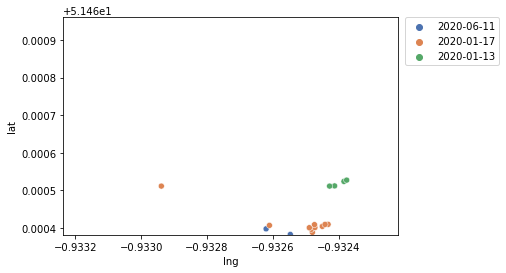

00:08:22:38:c2:fb
designated_space
ClientMacAddr    00:08:22:38:c2:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                       0.351351
not_in_any                0.648649
storage                        0.0
max_space               not_in_any
Name: 3, dtype: object


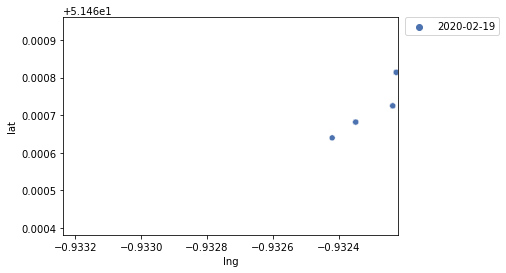

00:08:22:4c:c2:fb
designated_space
ClientMacAddr    00:08:22:4c:c2:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                       0.846154
not_in_any                     0.0
storage                   0.153846
max_space                      lab
Name: 4, dtype: object


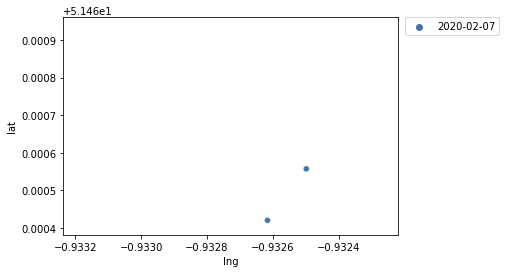

00:08:22:c0:c1:fb
designated_space
ClientMacAddr    00:08:22:c0:c1:fb
admin_office                   0.0
assembly_line                  0.0
canteen                   0.916667
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                0.083333
storage                        0.0
max_space                  canteen
Name: 5, dtype: object


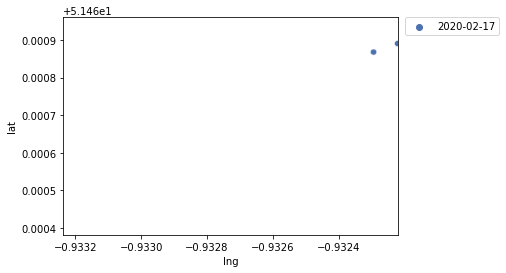

00:08:22:d8:c2:fb
designated_space
ClientMacAddr    00:08:22:d8:c2:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        1.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                     0.0
storage                        0.0
max_space                  canteen
Name: 6, dtype: object


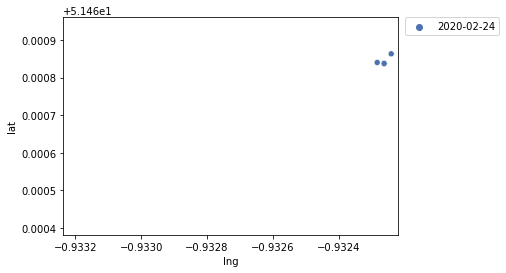

00:08:22:e0:32:fc
designated_space
ClientMacAddr    00:08:22:e0:32:fc
admin_office                   0.0
assembly_line             0.136364
canteen                        0.0
control_rooms                  0.5
entrance                       0.0
lab                            0.0
not_in_any                0.045455
storage                   0.318182
max_space            control_rooms
Name: 7, dtype: object


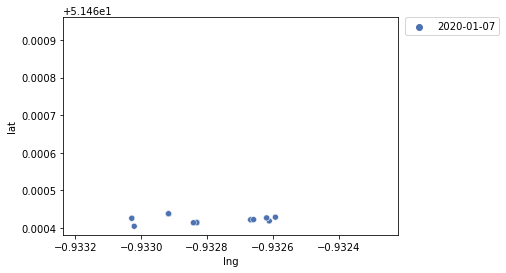

00:0a:f5:40:18:c0
designated_space
ClientMacAddr    00:0a:f5:40:18:c0
admin_office              0.035838
assembly_line             0.578035
canteen                        0.0
control_rooms             0.201156
entrance                  0.078613
lab                        0.00578
not_in_any                0.002312
storage                   0.098266
max_space            assembly_line
Name: 8, dtype: object


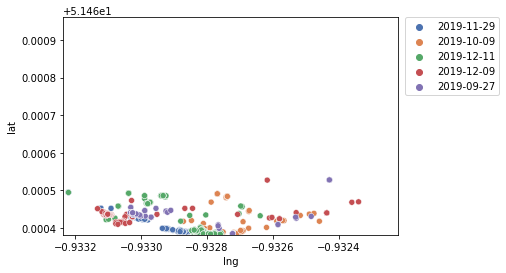

00:0c:e7:02:67:0d
designated_space
ClientMacAddr    00:0c:e7:02:67:0d
admin_office              0.923077
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                0.076923
storage                        0.0
max_space             admin_office
Name: 9, dtype: object


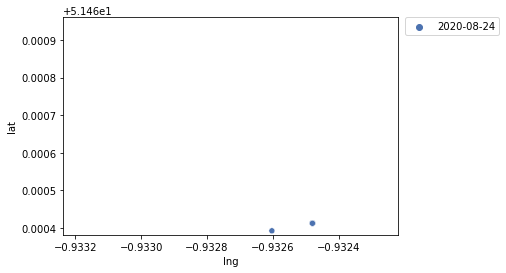

In [88]:
## plot the data with associated space
ind = 0
for i in df_mobile_space_1F["ClientMacAddr"].unique()[:10]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    print(df_mobile_space_1F.loc[ind,:])
    ind += 1
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[(df['ClientMacAddr'] == i)]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

### Try to find vehicles and operator

In [89]:
vehicle_or_operator = df_mobile_space_1F[df_mobile_space_1F['max_space'] == 'assembly_line']
vehicle_or_operator

designated_space      ClientMacAddr  admin_office  assembly_line  canteen  \
8                 00:0a:f5:40:18:c0      0.035838       0.578035  0.00000   
12                00:0c:e7:09:cd:29      0.000000       1.000000  0.00000   
36                00:0c:e7:3d:4b:00      0.000000       0.857143  0.00000   
71                00:0c:e7:84:aa:b1      0.000000       1.000000  0.00000   
100               00:0c:e7:c9:db:14      0.000000       1.000000  0.00000   
...                             ...           ...            ...      ...   
4518              fc:3f:7c:08:cd:4d      0.000000       0.866667  0.00000   
4519              fc:45:96:c6:da:f5      0.000000       0.458078  0.03681   
4521              fc:62:b9:70:33:fa      0.000000       0.970588  0.00000   
4523              fc:62:b9:b9:4b:1b      0.000000       1.000000  0.00000   
4529              fc:d8:48:80:ab:de      0.003175       0.415873  0.00000   

designated_space  control_rooms  entrance       lab  not_in_any   storage  \
8                      0.201156  0.078613  0.005780    0.002312  0.098266   
12                     0.000000  0.000000  0.000000    0.000000  0.000000   
36                     0.000000  0.071429  0.000000    0.000000  0.071429   
71                     0.000000  0.000000  0.000000    0.000000  0.000000   
100                    0.000000  0.000000  0.000000    0.000000  0.000000   
...                         ...       ...       ...         ...       ...   
4518                   0.133333  0.000000  0.000000    0.000000  0.000000   
4519                   0.018405  0.002045  0.042945    0.435583  0.006135   
4521                   0.029412  0.000000  0.000000    0.000000  0.000000   
4523                   0.000000  0.000000  0.000000    0.000000  0.000000   
4529                   0.000000  0.174603  0.000000    0.000000  0.406349   

designated_space      max_space  
8                 assembly_line  
12                assembly_line  
36                assembly_line  
71                assembly_line  
100               assembly_line  
...                         ...  
4518              assembly_line  
4519              assembly_line  
4521              assembly_line  
4523              assembly_line  
4529              assembly_line  

[1149 rows x 10 columns]

                                  8
designated_space                   
ClientMacAddr     00:0a:f5:40:18:c0
admin_office               0.035838
assembly_line              0.578035
canteen                         0.0
control_rooms              0.201156
entrance                   0.078613
lab                         0.00578
not_in_any                 0.002312
storage                    0.098266
max_space             assembly_line


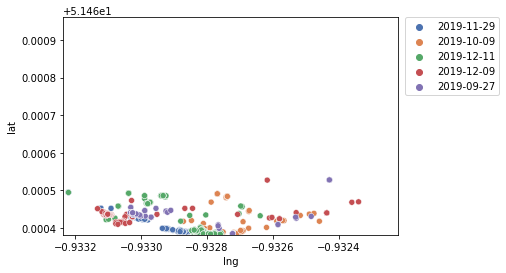

                                 12
designated_space                   
ClientMacAddr     00:0c:e7:09:cd:29
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


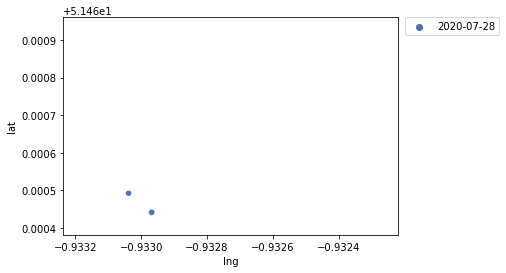

                                 36
designated_space                   
ClientMacAddr     00:0c:e7:3d:4b:00
admin_office                    0.0
assembly_line              0.857143
canteen                         0.0
control_rooms                   0.0
entrance                   0.071429
lab                             0.0
not_in_any                      0.0
storage                    0.071429
max_space             assembly_line


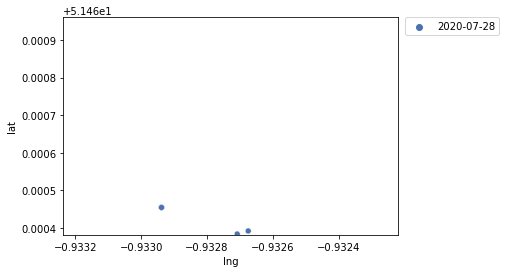

                                 71
designated_space                   
ClientMacAddr     00:0c:e7:84:aa:b1
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


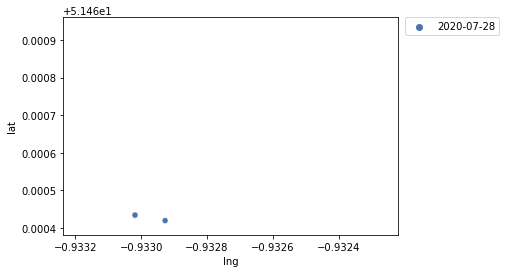

                                100
designated_space                   
ClientMacAddr     00:0c:e7:c9:db:14
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


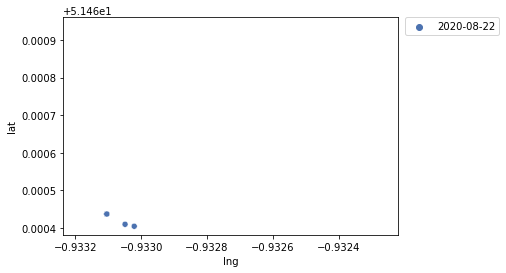

                                120
designated_space                   
ClientMacAddr     00:0c:e7:ef:e5:6b
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


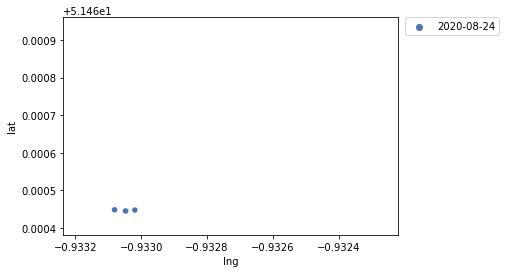

                                122
designated_space                   
ClientMacAddr     00:0c:e7:f4:04:28
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


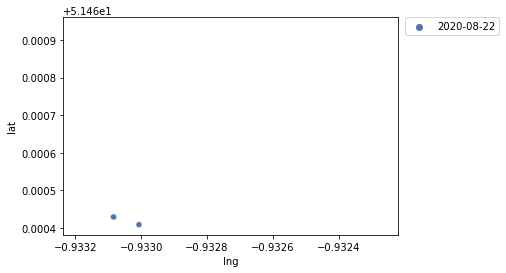

                                128
designated_space                   
ClientMacAddr     00:10:20:cd:86:91
admin_office               0.153153
assembly_line              0.657658
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                        0.036036
not_in_any                  0.09009
storage                    0.063063
max_space             assembly_line


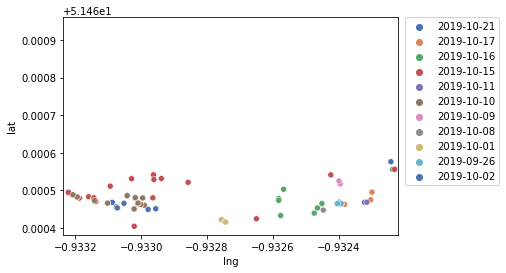

                                129
designated_space                   
ClientMacAddr     00:10:20:cd:a9:21
admin_office               0.142857
assembly_line              0.714286
canteen                         0.0
control_rooms              0.142857
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


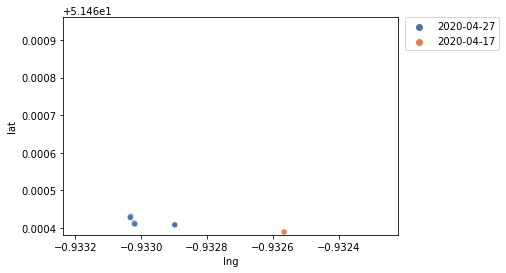

                                130
designated_space                   
ClientMacAddr     00:10:20:ce:2b:2b
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


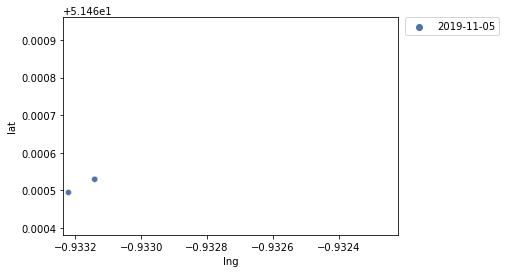

In [90]:
## plot the data with associated space
for i in vehicle_or_operator["ClientMacAddr"].unique()[:10]:
    print((vehicle_or_operator[vehicle_or_operator['ClientMacAddr'] == i]).T)
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[(df['ClientMacAddr'] == i)]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

### Assign Job function

In [91]:
# Create new column using dictionary
designated_space_mapping_dict = { 
             "canteen":"canteen_worker",
             "admin_office":"engineer", ## TODO: Change?
             "assembly_line":"operator",
             "entrance":"security_guard",
             "control_rooms": "operator",
             "lab": "researcher",
             "storage": "storage worker",
             "not_in_any": "visitor"
           }
  
# combine this new data with existing DataFrame
df_mobile_space_1F["job_function"] = df_mobile_space_1F["max_space"].map(designated_space_mapping_dict)

In [92]:
print(df_mobile_space_1F['job_function'].value_counts(dropna=False))
df_mobile_space_1F

operator          1690
researcher         800
visitor            661
storage worker     520
engineer           427
canteen_worker     417
security_guard      17
Name: job_function, dtype: int64


designated_space      ClientMacAddr  admin_office  assembly_line   canteen  \
0                 00:08:22:20:bc:fb      0.666667       0.000000  0.000000   
1                 00:08:22:24:b7:fb      0.000000       0.000000  0.000000   
2                 00:08:22:26:bb:fb      0.500000       0.062500  0.000000   
3                 00:08:22:38:c2:fb      0.000000       0.000000  0.000000   
4                 00:08:22:4c:c2:fb      0.000000       0.000000  0.000000   
...                             ...           ...            ...       ...   
4527              fc:a4:79:ad:0e:71      0.000000       0.000000  0.000000   
4528              fc:a6:67:be:c0:a5      0.047695       0.000000  0.052464   
4529              fc:d8:48:80:ab:de      0.003175       0.415873  0.000000   
4530              fc:f8:ae:5a:6f:ea      0.193146       0.000000  0.000000   
4531              fc:fc:48:36:16:6b      0.000000       0.000000  0.245614   

designated_space  control_rooms  entrance       lab  not_in_any   storage  \
0                       0.00000  0.166667  0.000000    0.000000  0.166667   
1                       0.00000  0.000000  0.909091    0.090909  0.000000   
2                       0.00000  0.062500  0.187500    0.062500  0.125000   
3                       0.00000  0.000000  0.351351    0.648649  0.000000   
4                       0.00000  0.000000  0.846154    0.000000  0.153846   
...                         ...       ...       ...         ...       ...   
4527                    0.00000  0.000000  0.714286    0.285714  0.000000   
4528                    0.00159  0.000000  0.845787    0.052464  0.000000   
4529                    0.00000  0.174603  0.000000    0.000000  0.406349   
4530                    0.00000  0.000000  0.803738    0.003115  0.000000   
4531                    0.00000  0.000000  0.438596    0.315789  0.000000   

designated_space      max_space job_function  
0                  admin_office     engineer  
1                           lab   researcher  
2                  admin_office     engineer  
3                    not_in_any      visitor  
4                           lab   researcher  
...                         ...          ...  
4527                        lab   researcher  
4528                        lab   researcher  
4529              assembly_line     operator  
4530                        lab   researcher  
4531                        lab   researcher  

[4532 rows x 11 columns]

In [93]:
len(df_mobile_space_1F['ClientMacAddr'].unique())

4532

In [94]:
print(df_mobile_space_1F['max_space'].value_counts(dropna=False))
print('---------------------------------')
print(df_mobile_space_1F['job_function'].value_counts(dropna=False))

assembly_line    1149
lab               800
not_in_any        661
control_rooms     541
storage           520
admin_office      427
canteen           417
entrance           17
Name: max_space, dtype: int64
---------------------------------
operator          1690
researcher         800
visitor            661
storage worker     520
engineer           427
canteen_worker     417
security_guard      17
Name: job_function, dtype: int64


In [95]:
Mobile_device_1F = Mobile_device.merge(df_mobile_space_1F[['ClientMacAddr','job_function']], on='ClientMacAddr', how='right').fillna("undefined")
Mobile_device_1F.tail(10)


ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
4522  fc:62:b9:70:ef:17        11.224170          1            14      1.0   
4523  fc:62:b9:b9:4b:1b         8.361729          1            29      1.0   
4524  fc:62:b9:b9:4c:be         8.414407          1             4      1.0   
4525  fc:65:de:5e:93:00        26.160282          1            19      1.0   
4526  fc:77:74:a4:a0:06        88.568786          1           226      1.0   
4527  fc:a4:79:ad:0e:71        40.261881          1             7      1.0   
4528  fc:a6:67:be:c0:a5        37.134853         12           629     12.0   
4529  fc:d8:48:80:ab:de        32.174643          2           315      2.0   
4530  fc:f8:ae:5a:6f:ea        26.020636          1           321      1.0   
4531  fc:fc:48:36:16:6b        40.561440          1           114      1.0   

      Weekend             set  avg_time_per_day Mobile_or_fixed  \
4522      0.0  {working_hour}          0.329145   Mobile Device   
4523      0.0  {working_hour}          0.231430   Mobile Device   
4524      0.0  {working_hour}          0.094249   Mobile Device   
4525      0.0  {working_hour}          0.051118   Mobile Device   
4526      0.0  {working_hour}          2.694285   Mobile Device   
4527      0.0  {working_hour}          0.020936   Mobile Device   
4528      0.0  {working_hour}          0.682434   Mobile Device   
4529      0.0  {working_hour}          0.433865   Mobile Device   
4530      0.0  {working_hour}          0.933199   Mobile Device   
4531      0.0  {working_hour}          0.614165   Mobile Device   

     job_function_x  job_function_y  
4522      undefined  storage worker  
4523      undefined        operator  
4524      undefined  storage worker  
4525      undefined  canteen_worker  
4526      undefined  canteen_worker  
4527      undefined      researcher  
4528      undefined      researcher  
4529      undefined        operator  
4530      undefined      researcher  
4531      undefined      researcher

In [96]:
Mobile_device_1F.loc[(Mobile_device_1F['job_function_y'] == 'operator') & (Mobile_device_1F['Distance(Meter)'] < 10),
                       'job_function_y'] = 'vehicle'


In [97]:
Mobile_device_1F['job_function_y'].value_counts(dropna=False)

operator          1260
researcher         800
visitor            661
storage worker     520
vehicle            430
engineer           427
canteen_worker     417
security_guard      17
Name: job_function_y, dtype: int64

In [98]:
len(Mobile_device_1F['ClientMacAddr'].unique())

4532

In [99]:
Mobile_device['job_function'].value_counts(dropna=False)

undefined         4532
canteen_worker     695
engineer           601
visitor            478
security_guard     254
IT_technician      236
intruder             2
Name: job_function, dtype: int64

In [100]:
Mobile_device_1F.loc[Mobile_device_1F['ClientMacAddr']=='fc:a6:67:be:c0:a5', 'job_function_y'].to_string(index=False)

'researcher'

In [101]:
# Identify intruders and security guards based on following logic
def merge_jobfunc(row):
    if row['job_function'] == 'undefined':
        return Mobile_device_1F[Mobile_device_1F['ClientMacAddr']==row['ClientMacAddr']]['job_function_y'].to_string(index=False)
    else:
        return row['job_function']

Mobile_device['job_function'] = Mobile_device.apply(merge_jobfunc, axis=1)

In [102]:
Mobile_device['job_function'].value_counts(dropna=False)

operator          1260
visitor           1139
canteen_worker    1112
engineer          1028
researcher         800
storage worker     520
vehicle            430
security_guard     271
IT_technician      236
intruder             2
Name: job_function, dtype: int64

## Define authority level for space
- Scale: 0 is lowest access - 4 is highest access
- operator          4 
- canteen_worker    1   
- visitor           1   
- engineer          4 
- researcher        4 
- storage worker    3 
- vehicle           N/A
- security_guard    4 
- IT_technician     2 
- intruder          0 


## For vehicle
- Scale: 0 and 1
- Only operator and storage worker have 1, otherwise 0

### Fixed device: machine and printer

In [103]:
Fix_device.head()


ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
8328   80:58:f8:cc:10:67         4.997148          1            13      1.0   
6276   74:c1:4f:7b:71:1c         4.992401          3            24      3.0   
14772  d0:77:14:7f:b9:2c         4.988431          1            13      1.0   
7539   80:58:f8:70:0f:66         4.977924          1            13      1.0   
14633  d0:77:14:74:85:9d         4.975688          1            13      1.0   

       Weekend             set  avg_time_per_day Mobile_or_fixed  
8328       0.0  {working_hour}          0.032159    Fixed Device  
6276       0.0  {working_hour}          0.098504    Fixed Device  
14772      0.0  {working_hour}          0.033606    Fixed Device  
7539       0.0  {working_hour}          0.033331    Fixed Device  
14633      0.0  {working_hour}          0.033730    Fixed Device

In [104]:
# machinery_df = Fix_device[Fix_device["total_day"] > 5]
# print(machinery_df.shape)
# machinery_df

In [105]:
df_machine = df[(df['ClientMacAddr'].isin(Fix_device[Fix_device["total_day"] > 5]["ClientMacAddr"])) & 
               (df['Level'].isin(["1st Floor"]))]

df_printer = df[(df['ClientMacAddr'].isin(Fix_device[Fix_device["total_day"] > 5]["ClientMacAddr"])) & 
               (df['Level'].isin(["2nd Floor"]))]

print(df_machine['ClientMacAddr'].nunique())
print(df_printer['ClientMacAddr'].nunique()) # No printer

# TODO: What about the rest?

134
71


In [106]:
df_machine


Site      Level      ClientMacAddr        lat       lng  \
4245      UK Office  1st Floor  cc:88:26:54:6d:e3  51.460384 -0.932312   
4257      UK Office  1st Floor  cc:88:26:54:6d:e3  51.460386 -0.932311   
4259      UK Office  1st Floor  cc:88:26:54:6d:e3  51.460386 -0.932311   
4261      UK Office  1st Floor  cc:88:26:54:6d:e3  51.460385 -0.932314   
4267      UK Office  1st Floor  cc:88:26:54:6d:e3  51.460383 -0.932313   
...             ...        ...                ...        ...       ...   
69536509  UK Office  1st Floor  e0:9d:31:2a:e2:a4  51.460593 -0.932379   
69536557  UK Office  1st Floor  e0:9d:31:2a:e2:a4  51.460593 -0.932379   
69536605  UK Office  1st Floor  e0:9d:31:2a:e2:a4  51.460593 -0.932379   
69536647  UK Office  1st Floor  e0:9d:31:2a:e2:a4  51.460597 -0.932393   
69536691  UK Office  1st Floor  e0:9d:31:2a:e2:a4  51.460619 -0.932399   

                                localtime                  normalized_time  \
4245     2020-09-01 13:21:56.814000+00:00 2020-09-01 13:21:56.814000+00:00   
4257     2020-09-01 13:19:57.584000+00:00 2020-09-01 13:19:57.584000+00:00   
4259     2020-09-01 13:19:49.687000+00:00 2020-09-01 13:19:49.687000+00:00   
4261     2020-09-01 13:19:38.139000+00:00 2020-09-01 13:19:38.139000+00:00   
4267     2020-09-01 13:18:57.970000+00:00 2020-09-01 13:18:57.970000+00:00   
...                                   ...                              ...   
69536509 2019-09-16 13:25:07.884000+00:00 2019-09-16 13:25:07.884000+00:00   
69536557 2019-09-16 13:24:57.856000+00:00 2019-09-16 13:24:57.856000+00:00   
69536605 2019-09-16 13:24:47.822000+00:00 2019-09-16 13:24:47.822000+00:00   
69536647 2019-09-16 13:24:37.796000+00:00 2019-09-16 13:24:37.796000+00:00   
69536691 2019-09-16 13:24:27.763000+00:00 2019-09-16 13:24:27.763000+00:00   

                date  min  hour  dayOfWeek  IsWeekend       session  
4245      2020-09-01   21    13          1      False  working_hour  
4257      2020-09-01   19    13          1      False  working_hour  
4259      2020-09-01   19    13          1      False  working_hour  
4261      2020-09-01   19    13          1      False  working_hour  
4267      2020-09-01   18    13          1      False  working_hour  
...              ...  ...   ...        ...        ...           ...  
69536509  2019-09-16   25    13          0      False  working_hour  
69536557  2019-09-16   24    13          0      False  working_hour  
69536605  2019-09-16   24    13          0      False  working_hour  
69536647  2019-09-16   24    13          0      False  working_hour  
69536691  2019-09-16   24    13          0      False  working_hour  

[105101 rows x 13 columns]

In [107]:
Fix_device['job_function'] = 'undefined'
Fix_device.loc[Fix_device["ClientMacAddr"].isin(df_machine['ClientMacAddr'].unique()), 'job_function'] = 'machinery'
Fix_device.loc[Fix_device["ClientMacAddr"].isin(df_printer['ClientMacAddr'].unique()), 'job_function'] = 'printer'
Fix_device.head()

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
8328   80:58:f8:cc:10:67         4.997148          1            13      1.0   
6276   74:c1:4f:7b:71:1c         4.992401          3            24      3.0   
14772  d0:77:14:7f:b9:2c         4.988431          1            13      1.0   
7539   80:58:f8:70:0f:66         4.977924          1            13      1.0   
14633  d0:77:14:74:85:9d         4.975688          1            13      1.0   

       Weekend             set  avg_time_per_day Mobile_or_fixed job_function  
8328       0.0  {working_hour}          0.032159    Fixed Device    undefined  
6276       0.0  {working_hour}          0.098504    Fixed Device    undefined  
14772      0.0  {working_hour}          0.033606    Fixed Device    undefined  
7539       0.0  {working_hour}          0.033331    Fixed Device    undefined  
14633      0.0  {working_hour}          0.033730    Fixed Device    undefined

In [108]:
Fix_device['job_function'].value_counts() ## TODO: Could we deal with the undefined job_function?

undefined    11184
printer         71
machinery       67
Name: job_function, dtype: int64

cc:88:26:54:6d:e3


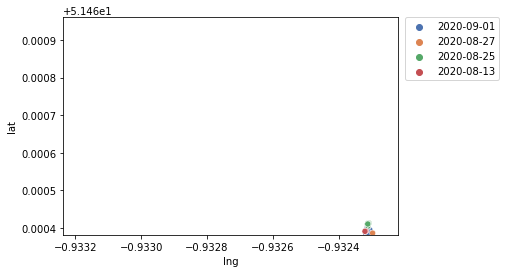

f0:6e:0b:cd:f8:27


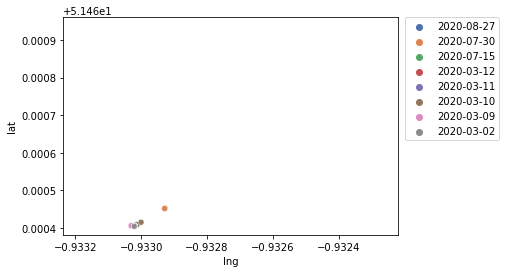

60:70:c0:f3:ce:b9


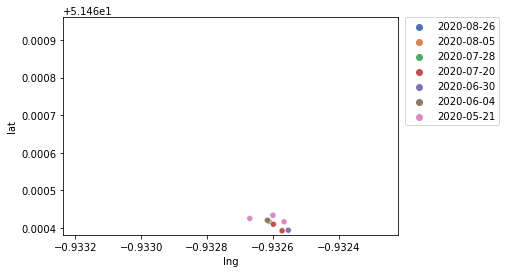

38:f9:d3:1e:30:df


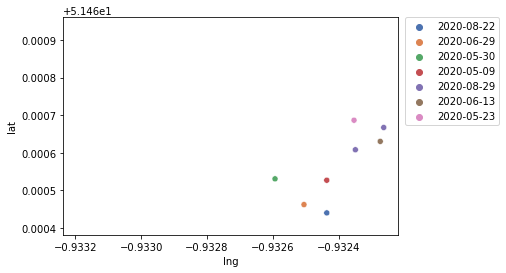

04:72:95:b0:dd:55


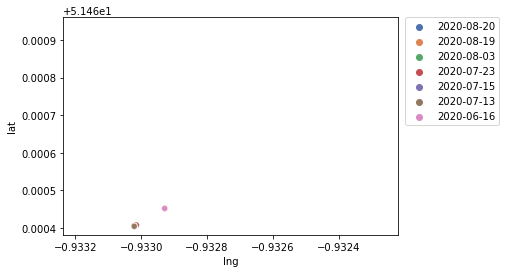

04:ea:56:92:f9:9b


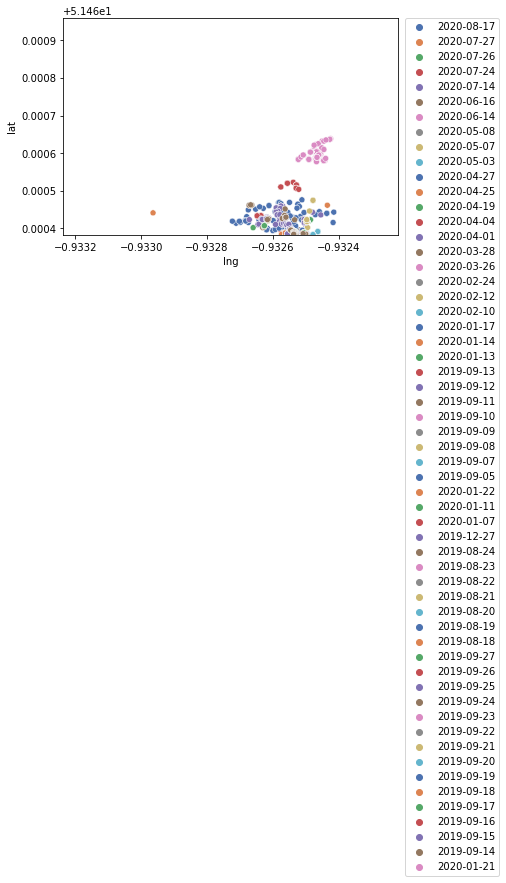

b0:68:e6:4e:62:d4


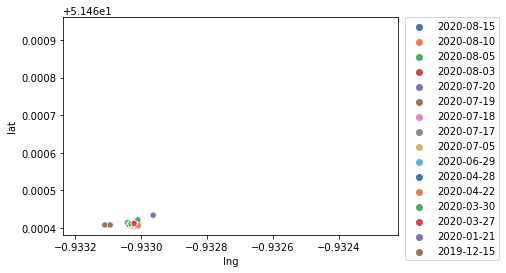

38:f9:d3:20:e5:75


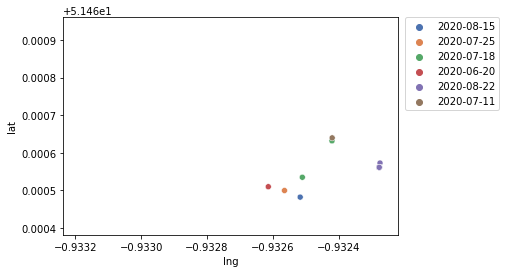

7c:b3:7b:19:5b:e4


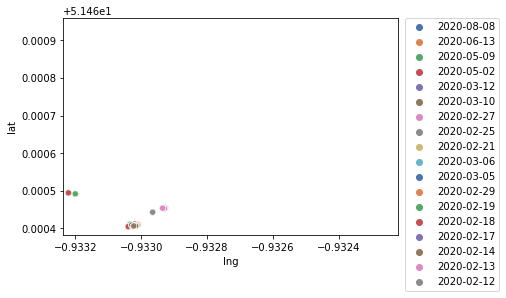

40:b8:9a:cc:f6:5f


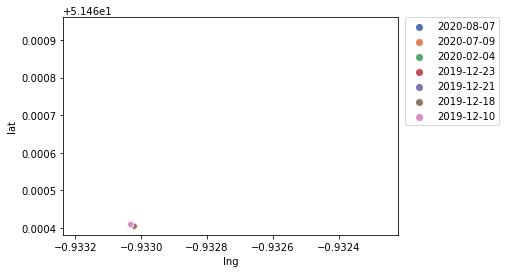

04:72:95:42:af:df


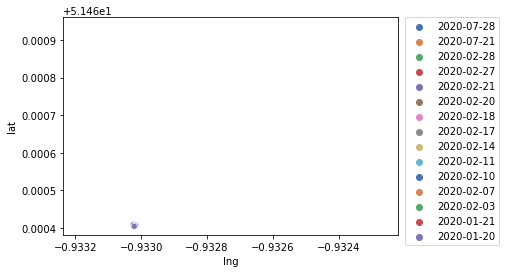

48:a4:72:ae:11:81


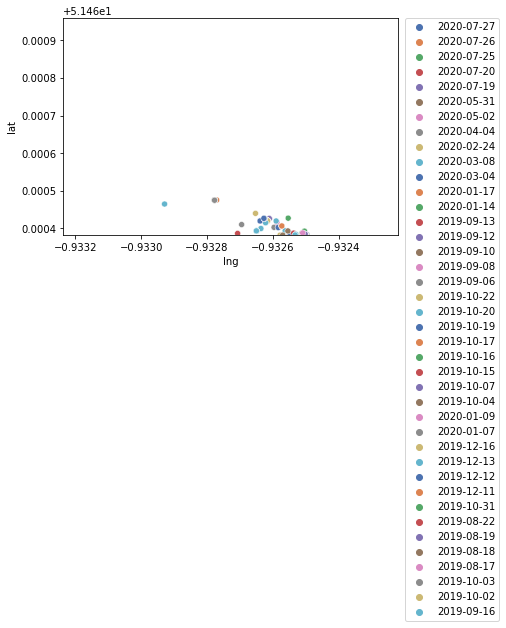

1c:5c:f2:ac:52:3f


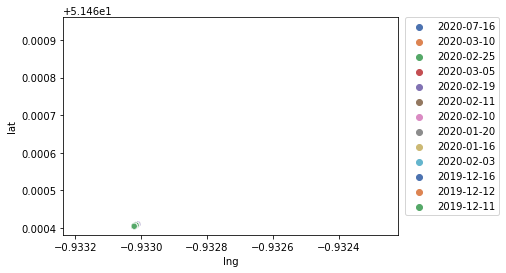

f4:8c:50:1e:a1:31


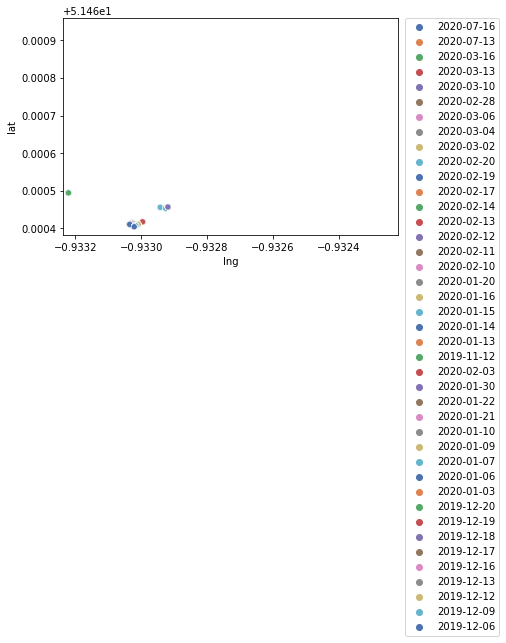

9c:4e:36:92:ec:e4


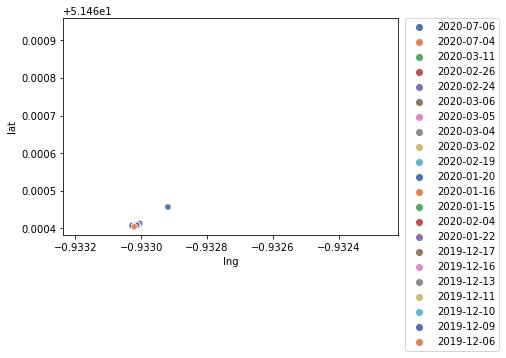

9c:4e:36:86:82:ec


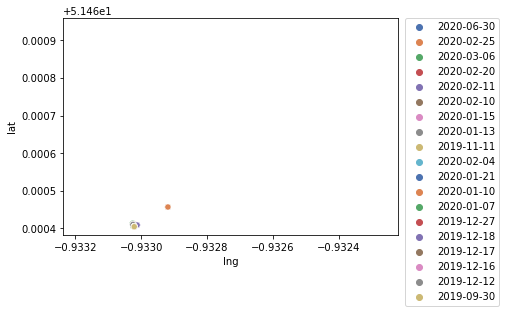

58:00:e3:d9:e4:91


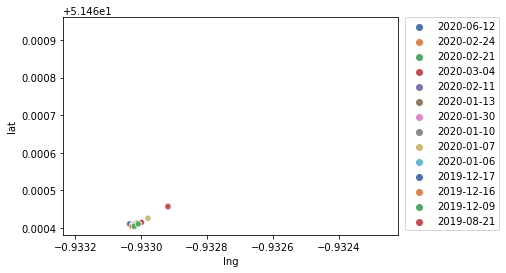

58:20:b1:5d:8a:8d


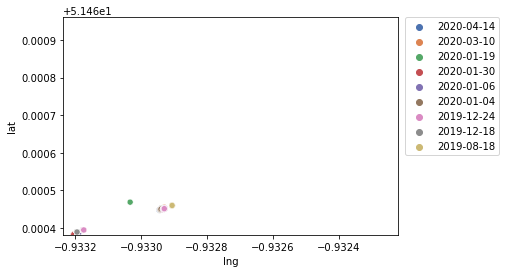

64:6e:69:d9:fc:8b


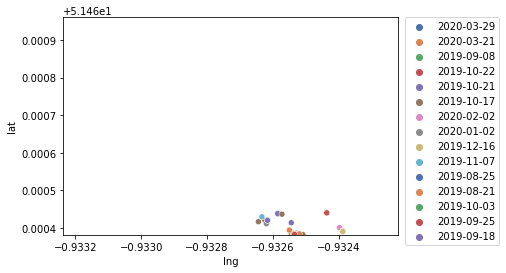

84:ad:8d:5e:1f:bd


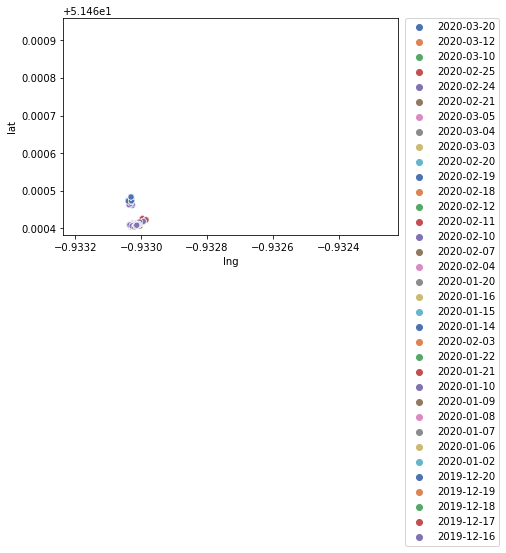

f0:98:9d:67:ba:9f


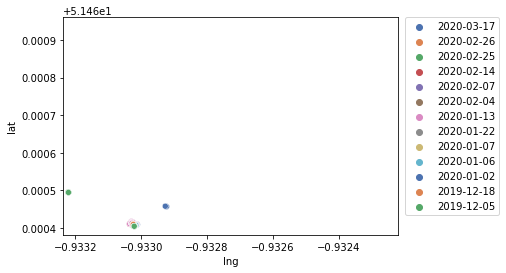

9c:da:3e:83:df:8d


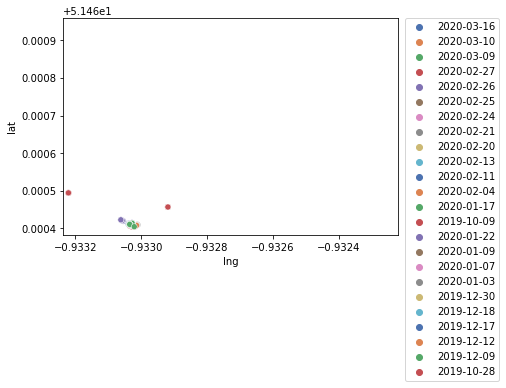

d8:68:c3:ae:29:73


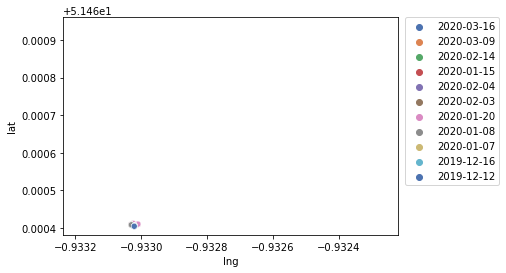

94:65:9c:0f:d0:4d


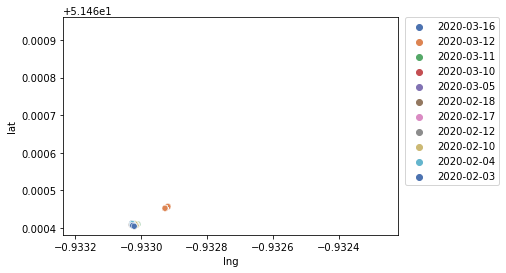

3c:cd:36:ee:71:7d


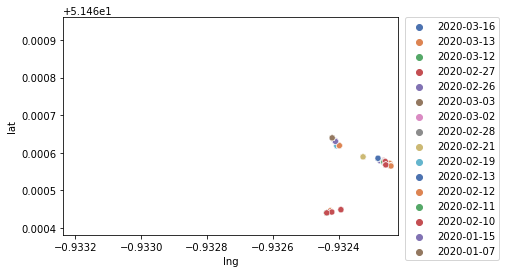

c4:98:80:e5:2b:5f


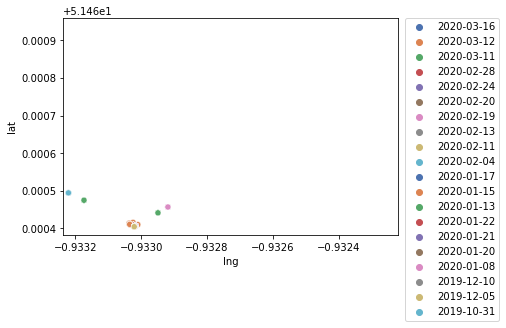

94:e9:79:f3:5c:5b


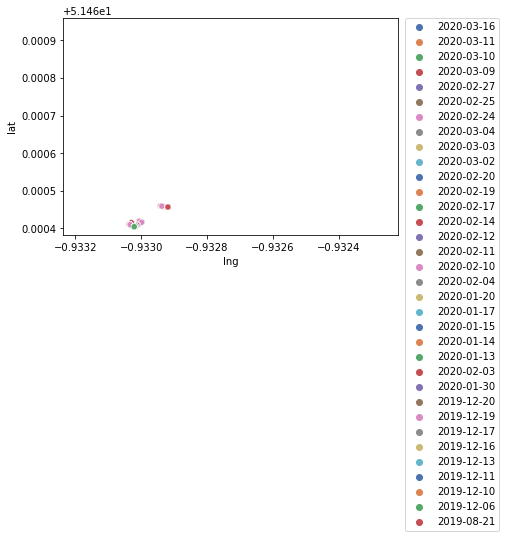

f0:d5:bf:19:55:37


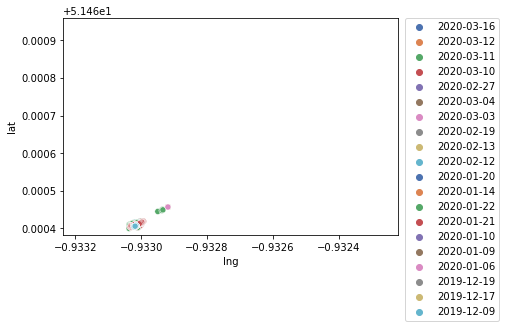

28:b2:bd:14:12:34


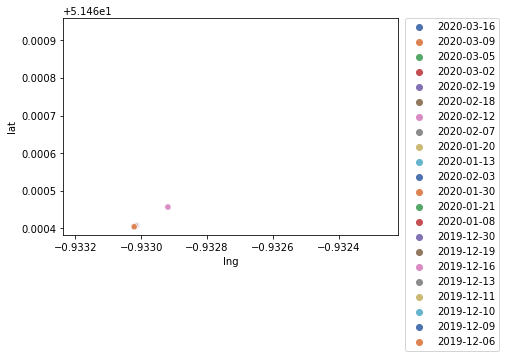

f4:60:e2:ce:26:d8


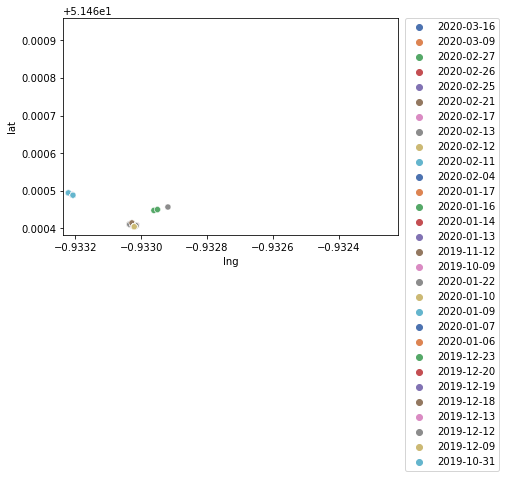

5c:e0:c5:ad:af:f2


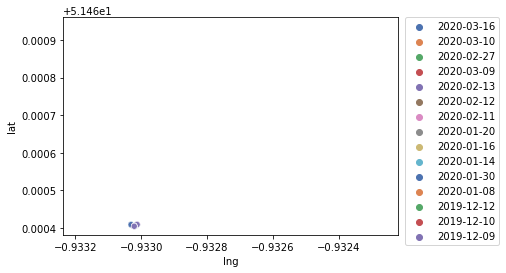

9c:b6:d0:e2:71:b5


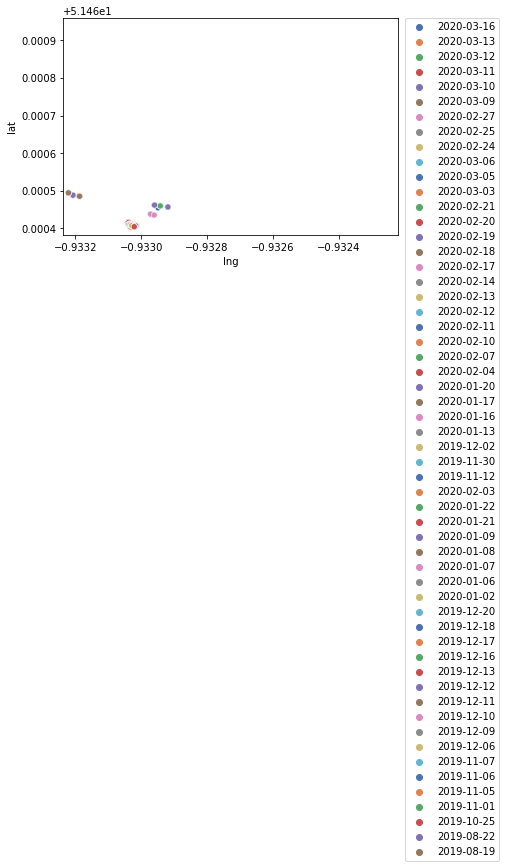

5c:80:b6:4e:d2:b6


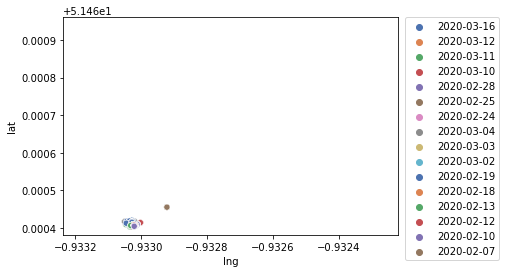

9c:b6:d0:e1:72:9f


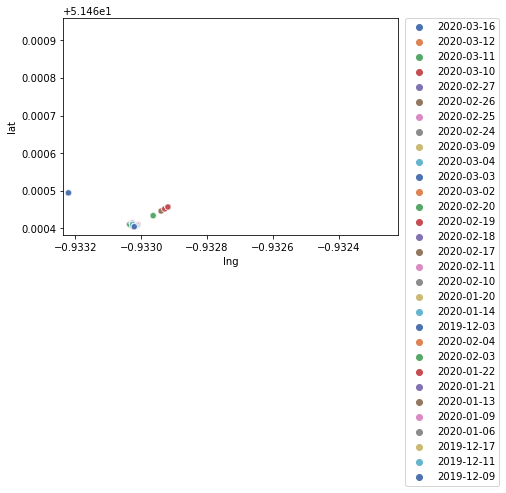

28:3a:4d:8e:4f:5f


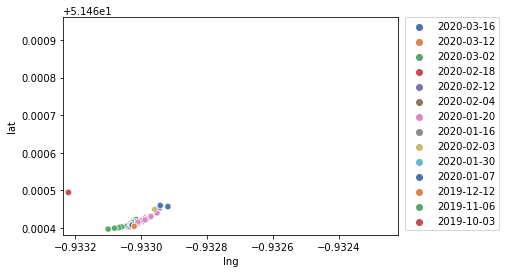

fc:4d:d4:55:31:b4


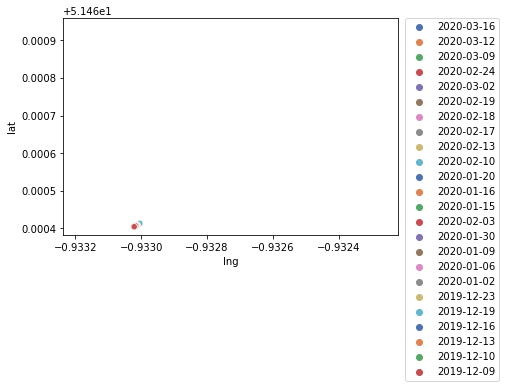

9c:8d:7c:45:18:05


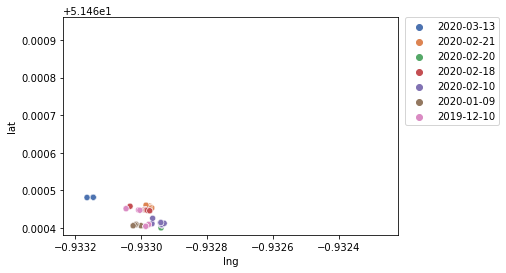

c0:b6:f9:f5:58:d4


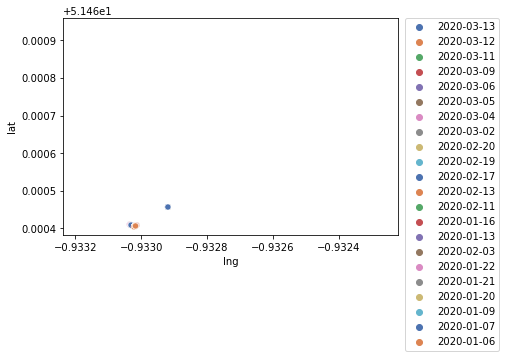

38:78:62:0e:a0:7b


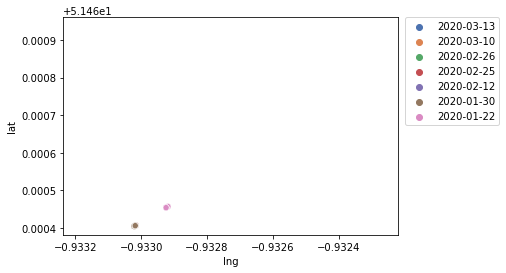

6c:c7:ec:66:ab:a5


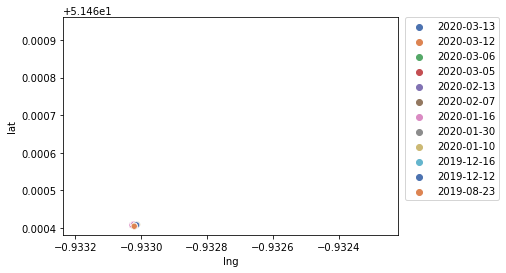

a4:f1:e8:1c:a9:04


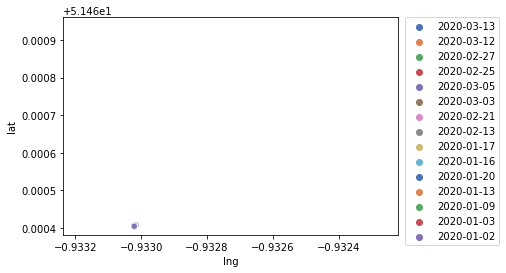

c4:e9:84:09:a4:6f


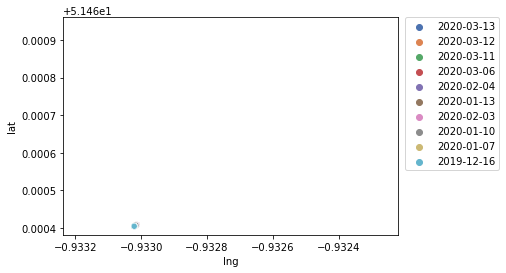

f4:c2:48:57:c9:77


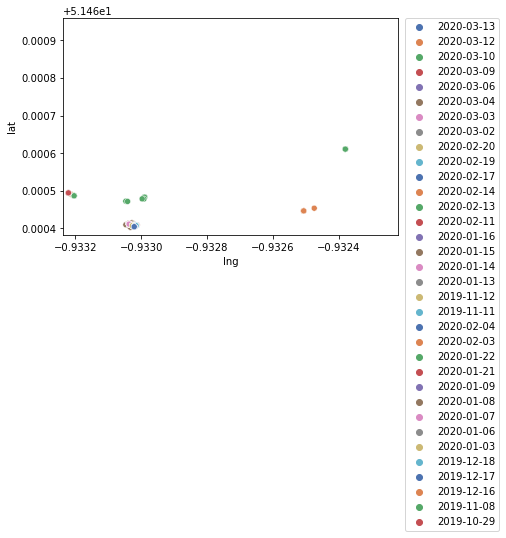

58:fb:84:6d:98:59


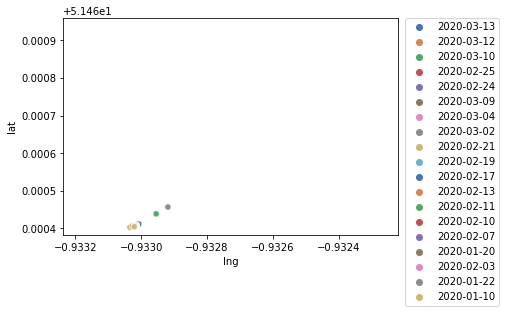

f0:c3:71:a1:21:34


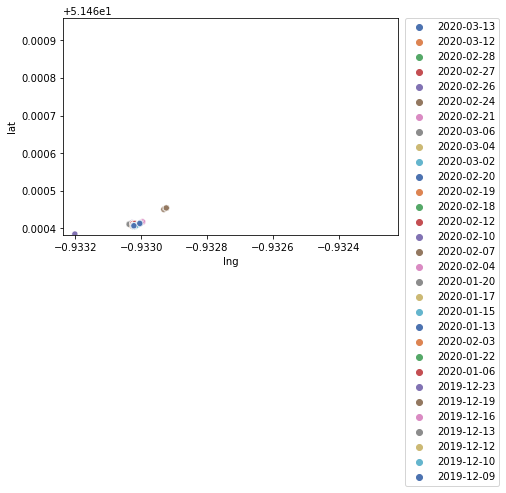

2c:f0:a2:62:8d:28


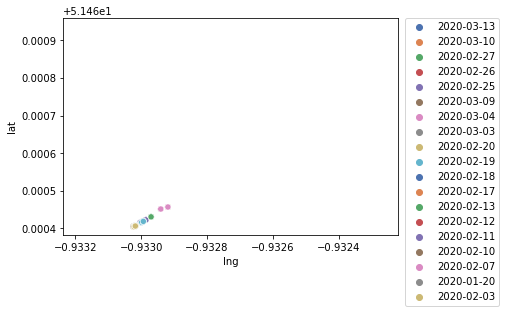

14:d1:69:bf:67:0d


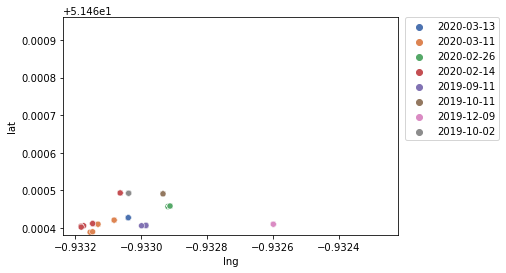

54:99:63:ec:4a:a3


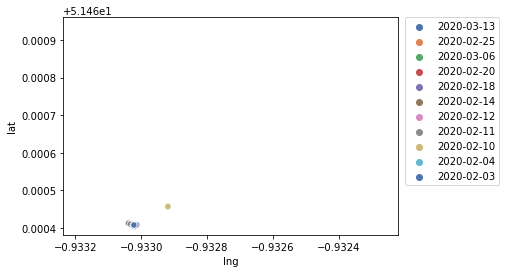

90:e1:7b:2d:3a:ac


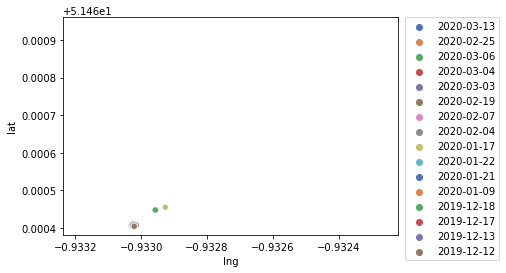

40:9c:28:e2:83:9e


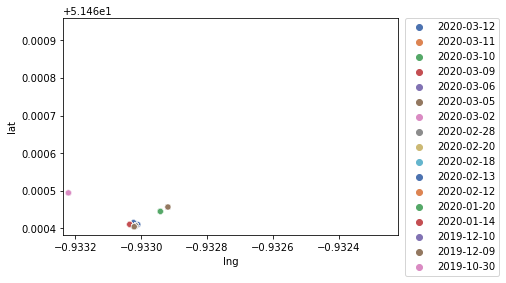

dc:53:60:c0:18:5e


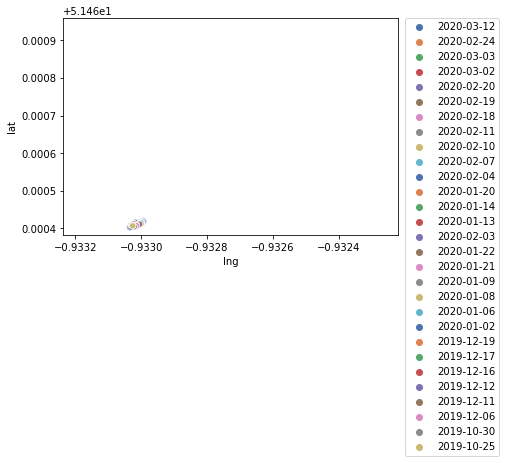

74:e2:8c:41:94:cc


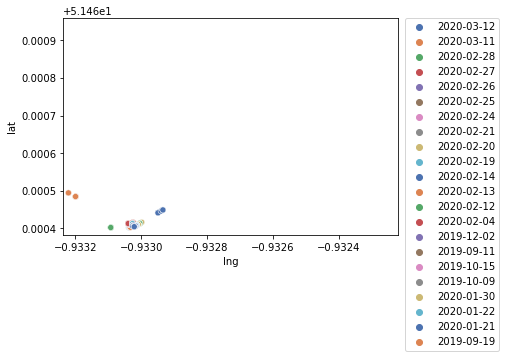

30:07:4d:f3:43:15


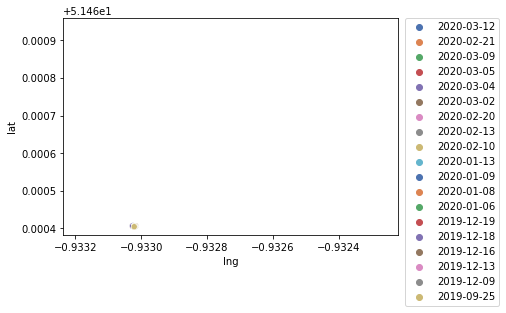

88:11:96:e6:07:1d


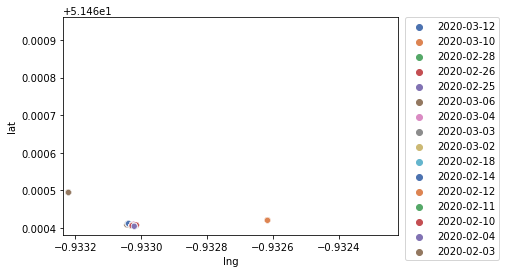

a4:d9:31:5d:90:93


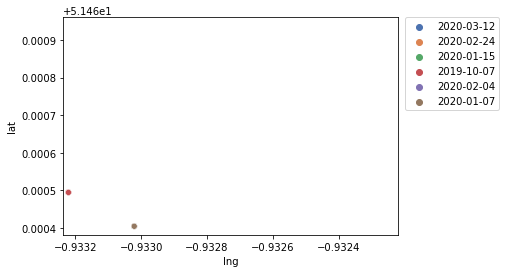

90:94:97:a2:00:9c


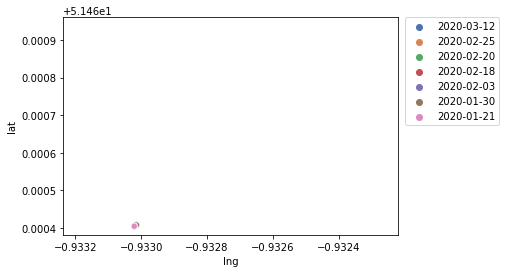

f8:2d:7c:5a:14:67


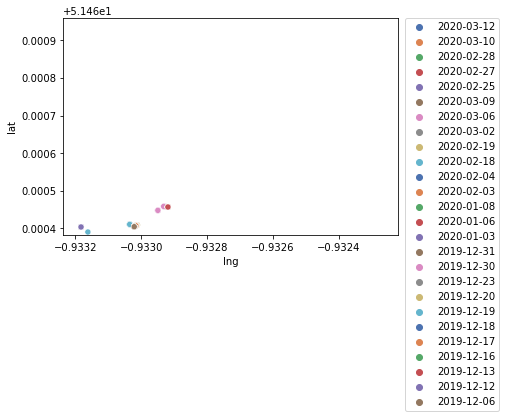

3c:f8:62:6c:86:4e


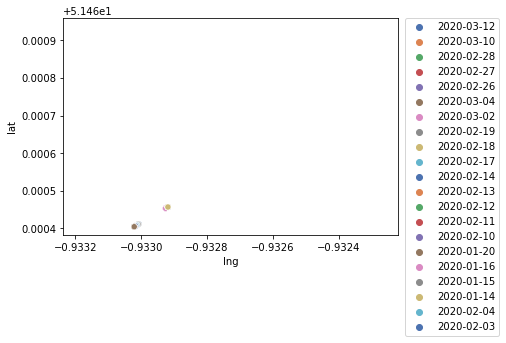

a0:a4:c5:98:73:94


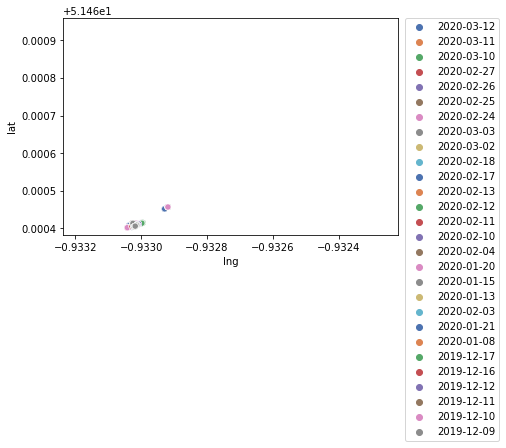

9c:4e:36:86:7e:14


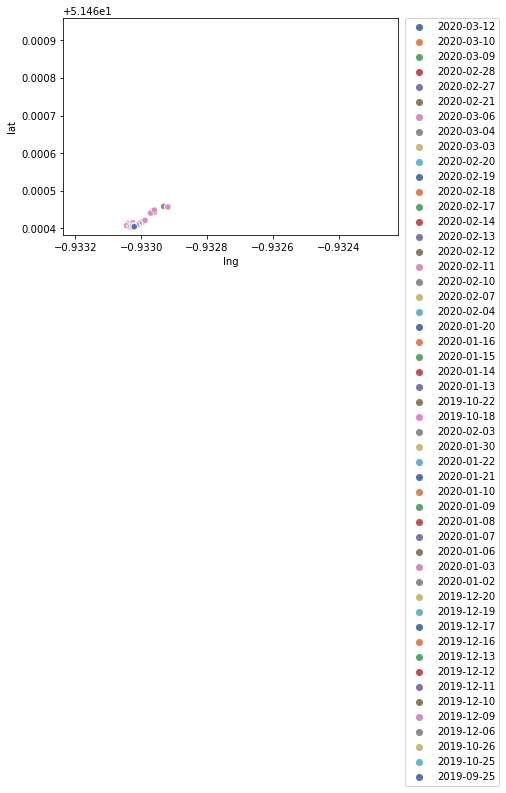

b4:6b:fc:06:18:69


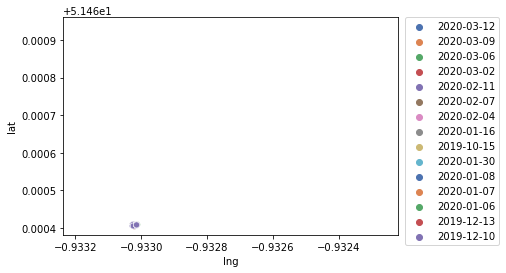

30:07:4d:72:11:54


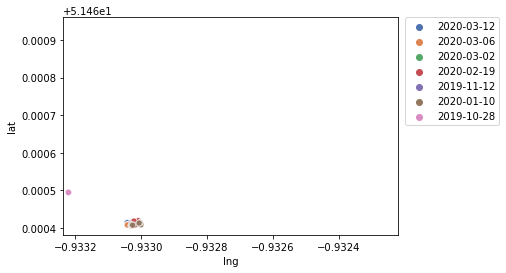

00:10:02:29:99:b5


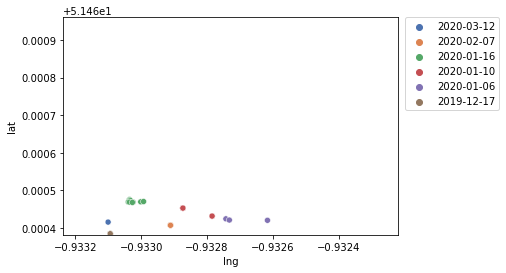

f4:8c:50:62:11:cd


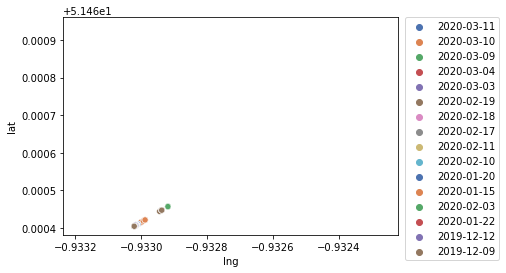

c0:e8:62:66:c5:8a


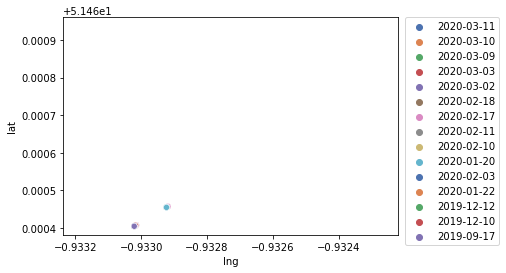

9c:b6:d0:e1:9b:4b


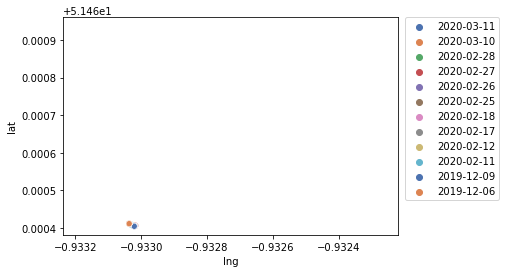

60:57:18:d7:19:c3


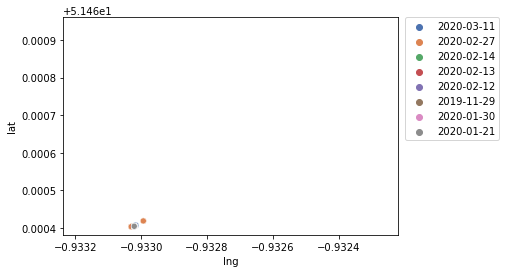

6c:c7:ec:6c:ec:9a


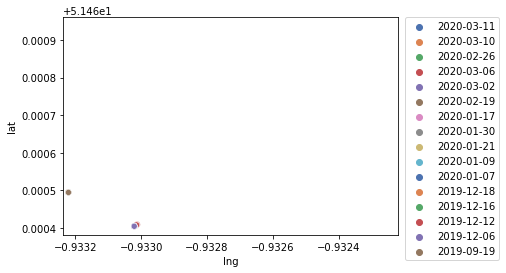

28:16:a8:71:19:9a


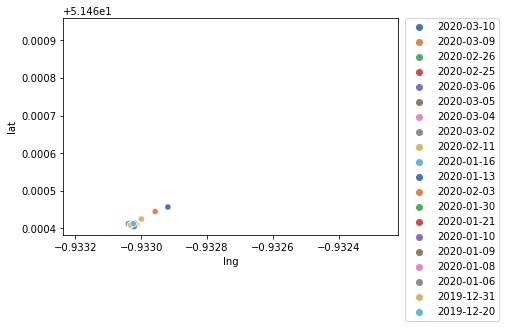

58:a0:23:18:f9:89


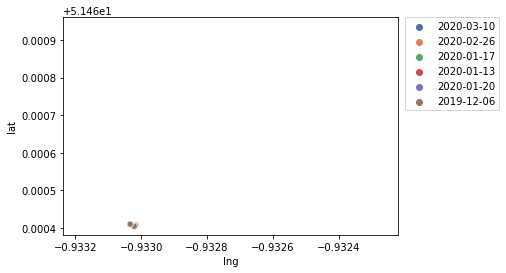

28:24:ff:55:df:2b


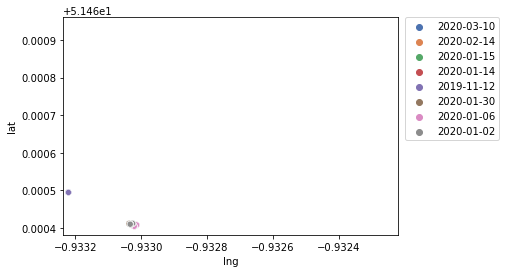

10:8e:e0:1c:db:6a


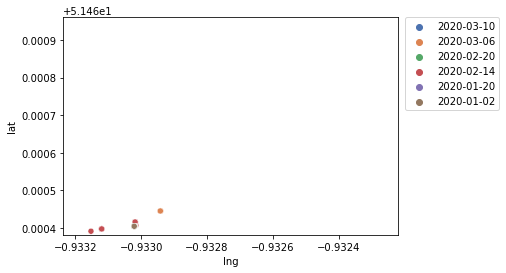

a0:88:69:e1:a0:a0


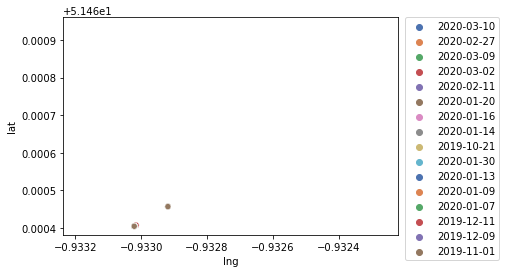

80:82:23:80:5d:d8


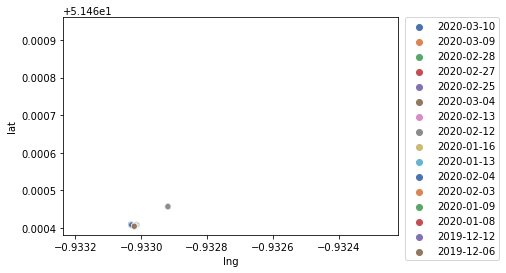

00:c2:c6:f9:2f:9f


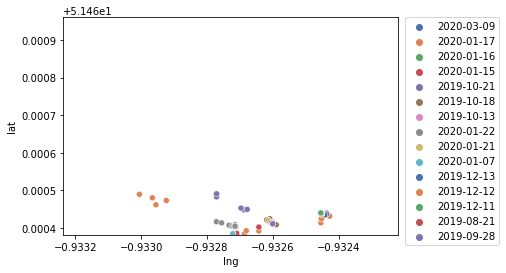

f8:94:c2:49:80:c7


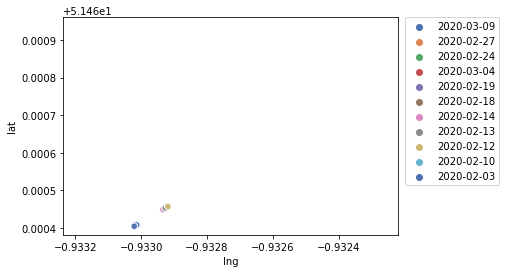

6c:c7:ec:6d:f0:4e


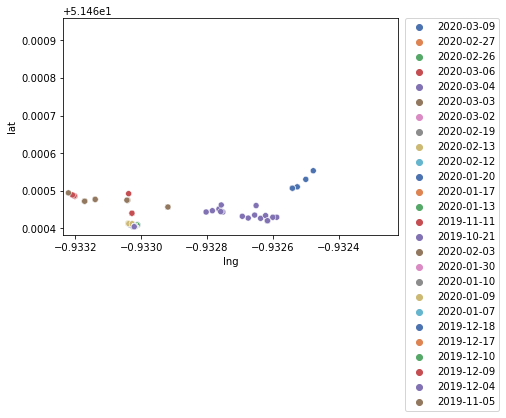

d8:68:c3:a3:80:91


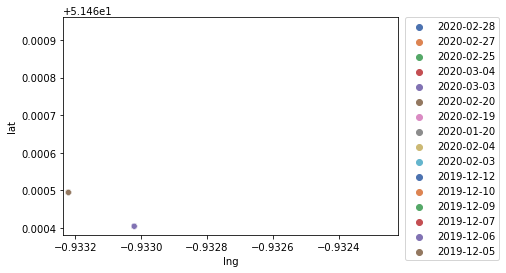

d8:68:c3:b4:fd:cd


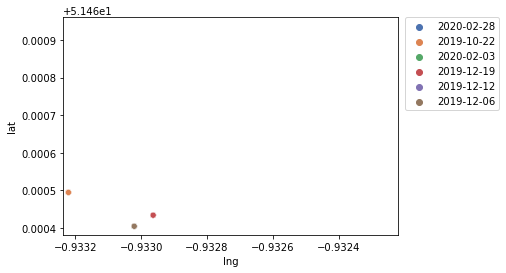

64:a2:f9:b8:30:53


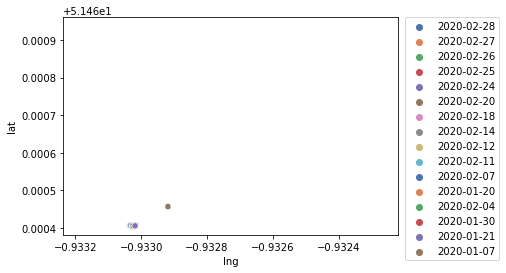

dc:53:60:c0:18:3b


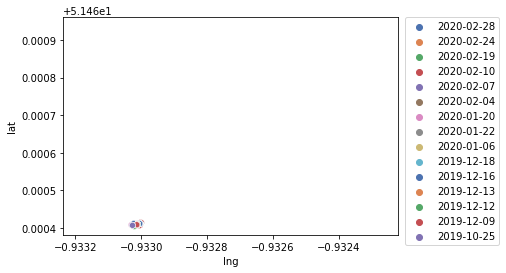

08:6d:41:b7:50:dc


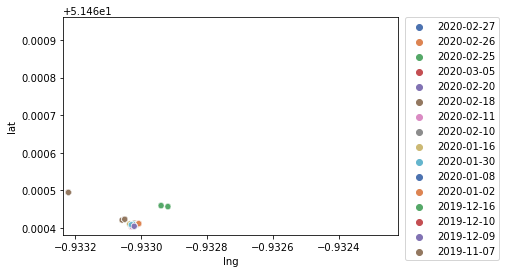

7c:67:a2:a5:91:b9


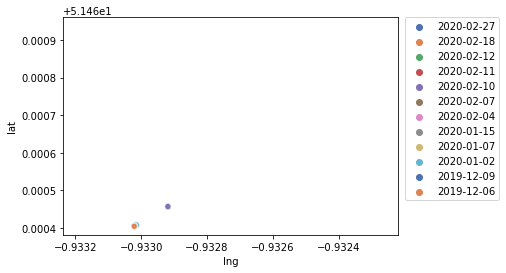

5c:ca:1a:a9:78:40


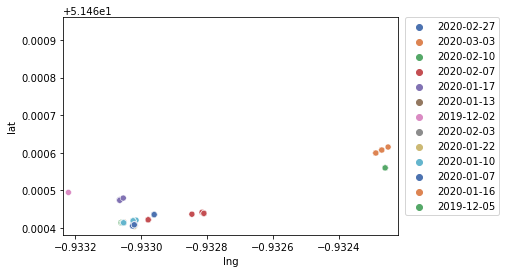

40:cb:c0:11:32:0c


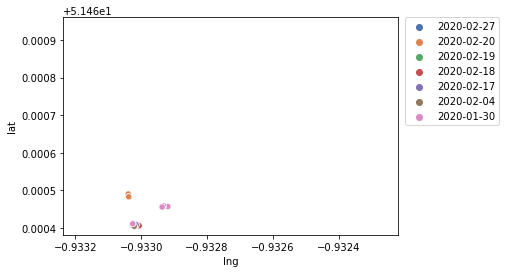

d8:0f:99:51:46:6f


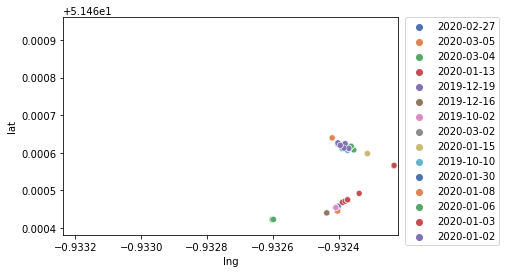

a8:6d:aa:ba:84:cf


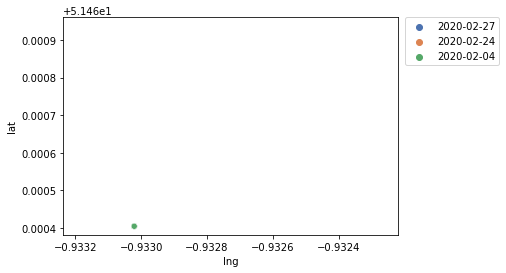

9c:b6:d0:e2:75:ed


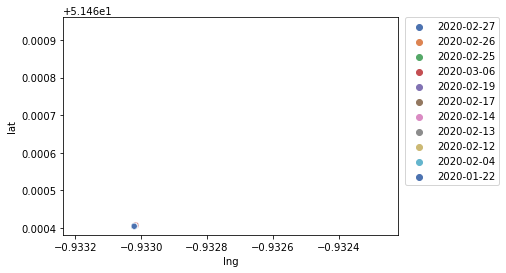

48:bf:6b:1f:5e:fd


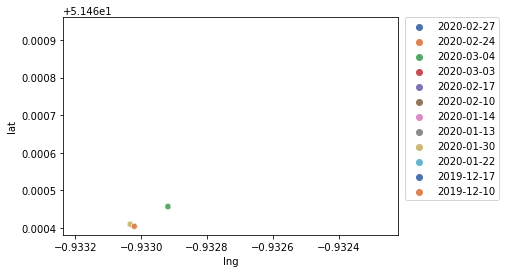

c4:9d:ed:8d:75:3f


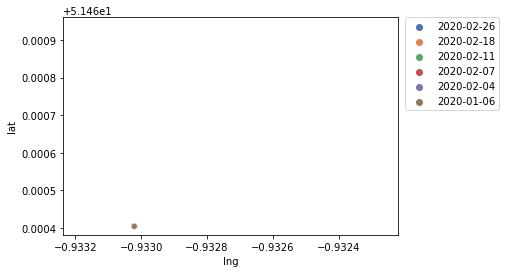

84:cf:bf:8a:54:29


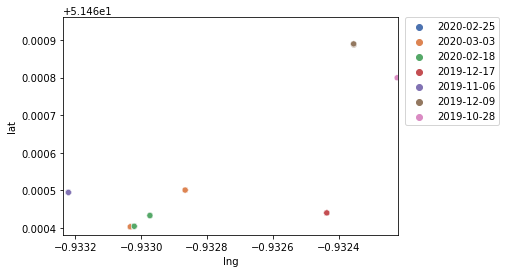

f4:06:16:86:ef:76


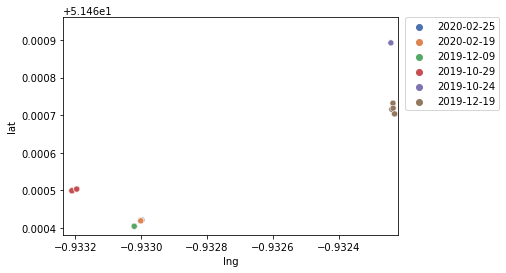

00:6d:52:2d:b5:2f


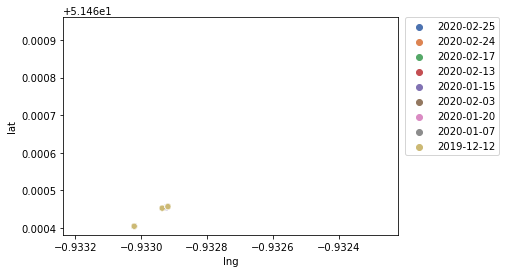

9c:8d:7c:82:44:28


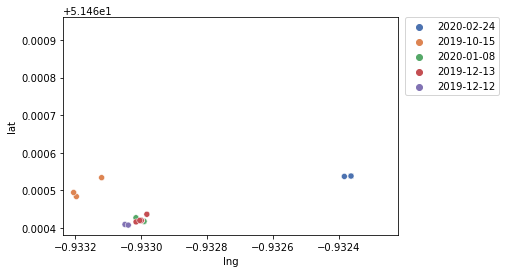

bc:e1:43:2a:fe:d9


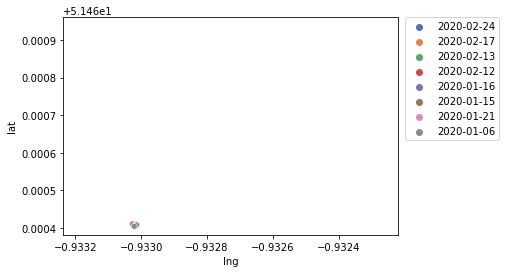

d4:25:8b:f9:24:23


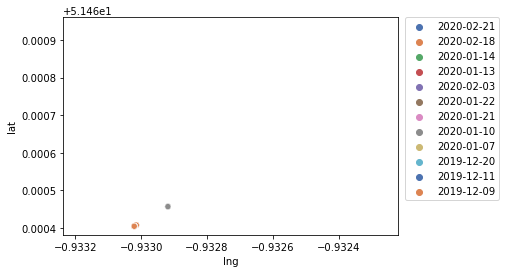

4c:66:41:db:99:33


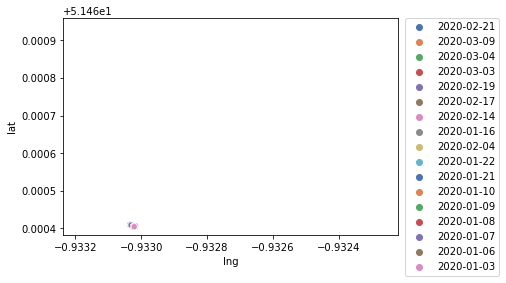

38:78:62:04:c7:dc


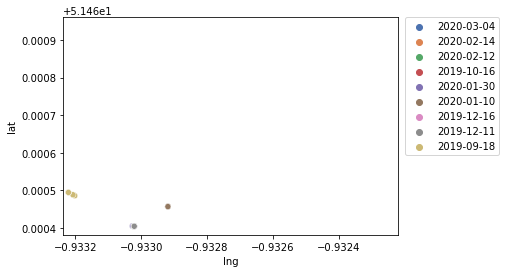

5c:5f:67:a4:eb:29


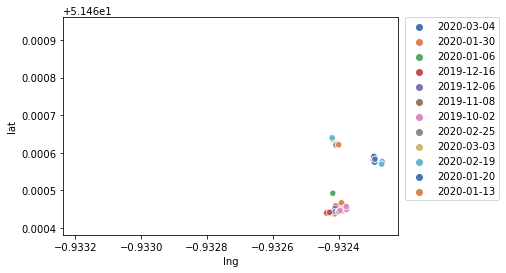

58:c5:cb:43:31:99


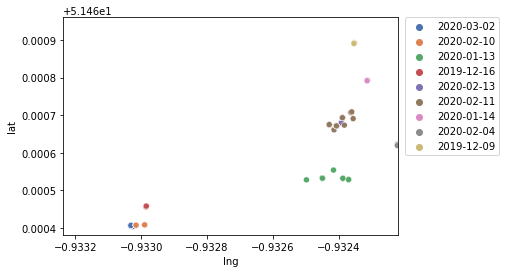

94:0c:98:21:6b:6d


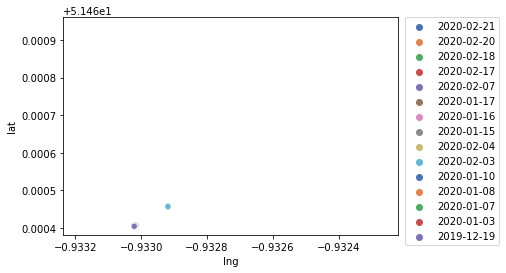

78:f7:be:9c:ba:fb


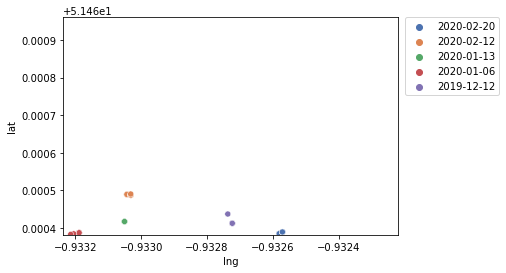

a4:c3:f0:a5:f0:d2


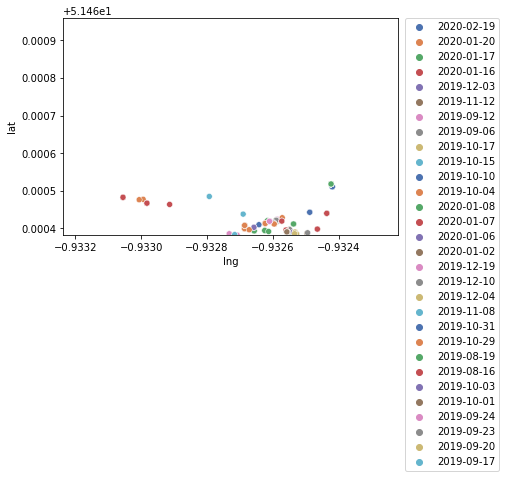

b4:f6:1c:11:ba:00


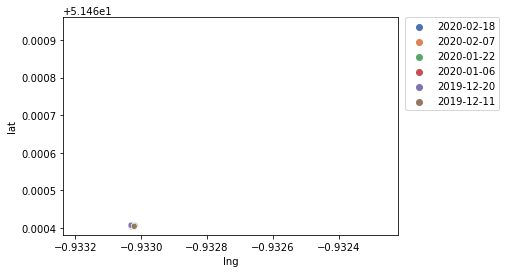

74:29:af:93:3b:e1


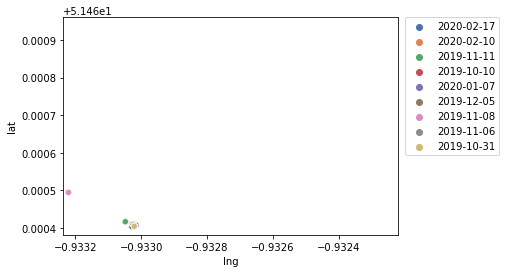

e0:94:67:be:5b:68


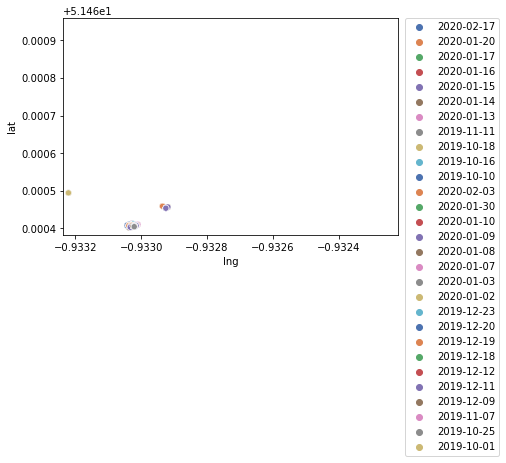

ec:aa:25:32:20:4a


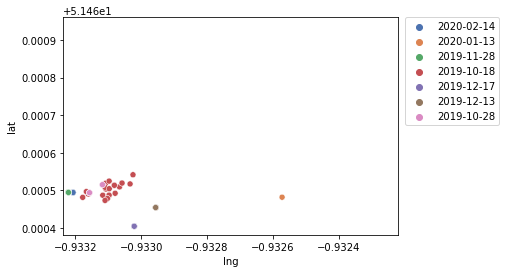

6c:00:6b:5f:40:2b


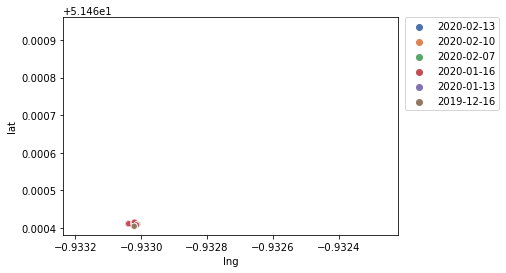

08:c5:e1:72:5c:cc


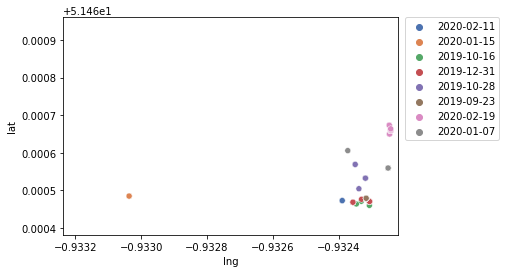

64:eb:8c:92:4b:59


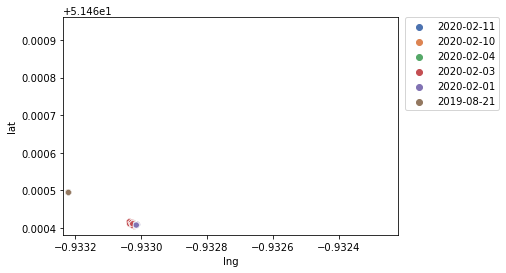

ec:8e:b5:06:01:0e


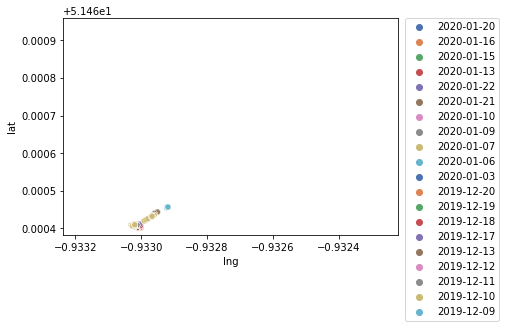

60:14:b3:77:98:8b


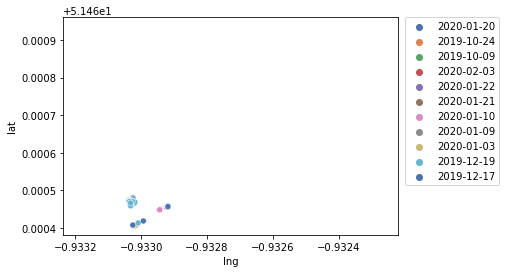

b0:7e:11:33:f0:22


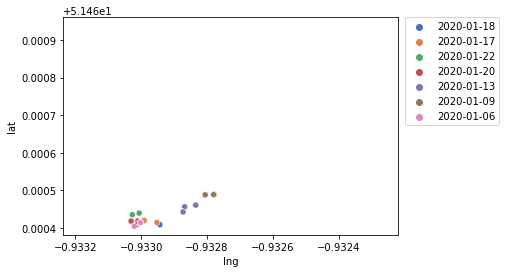

18:60:24:2b:06:56


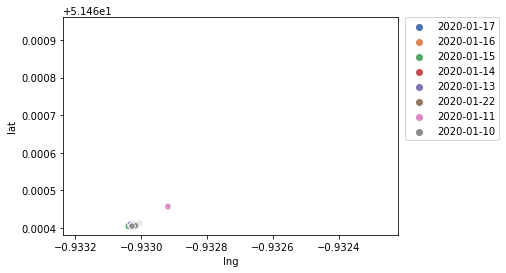

bc:e1:43:43:93:37


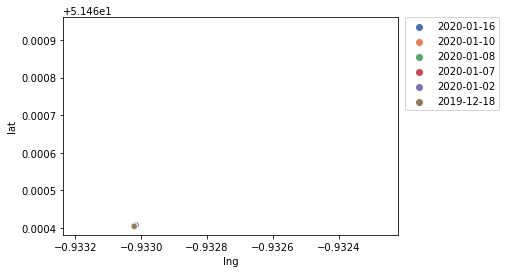

60:f1:89:25:7f:29


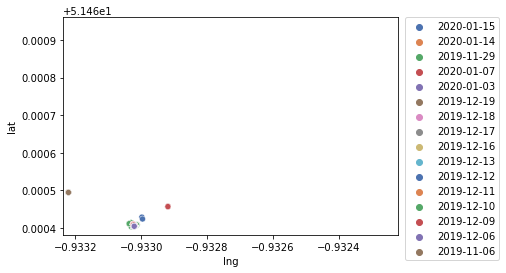

ac:e4:b5:c0:db:52


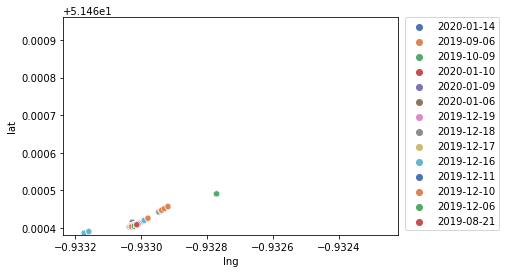

d8:68:c3:aa:4e:a9


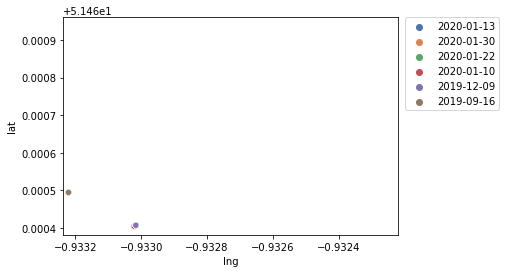

48:45:20:4c:11:93


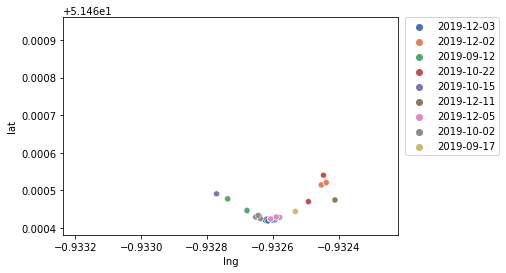

c0:ee:fb:6c:19:1f


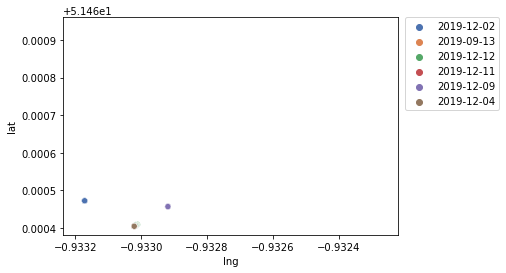

50:bc:96:b9:61:09


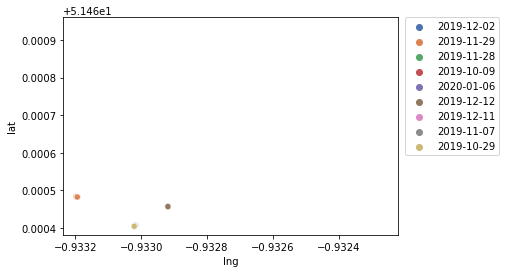

a8:5c:2c:89:4d:b2


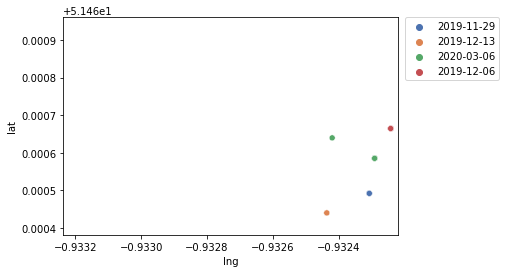

b0:48:1a:73:4a:dc


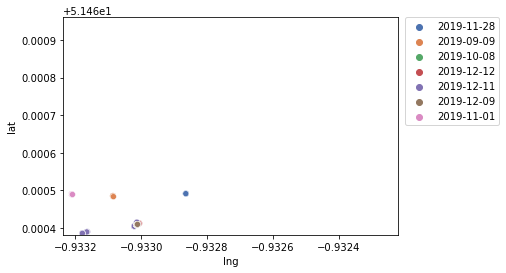

48:f0:7b:39:b8:3d


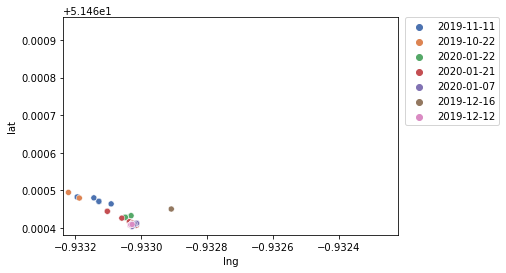

e0:9d:31:2a:e2:a4


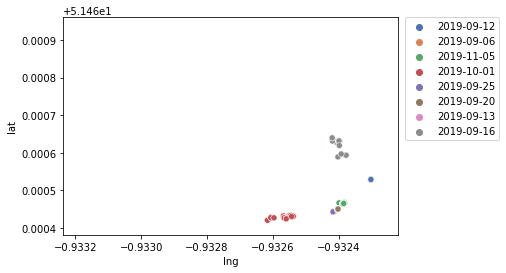

f4:0e:22:b7:d5:d9


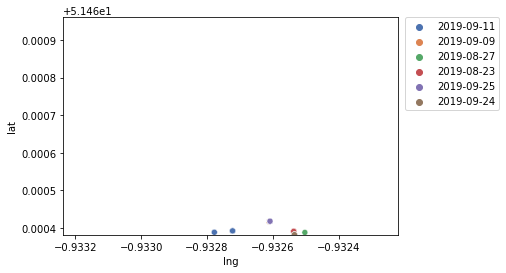

94:fb:29:10:c2:f7


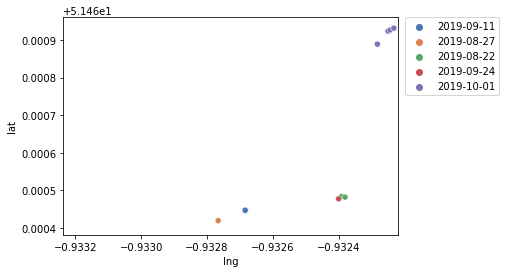

60:64:05:22:ea:93


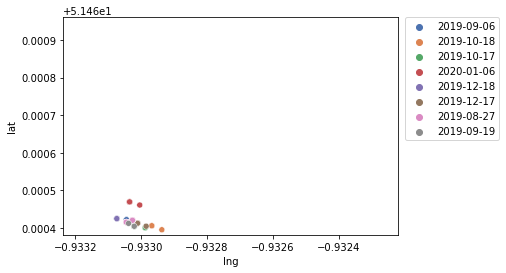

4c:34:88:f6:62:9c


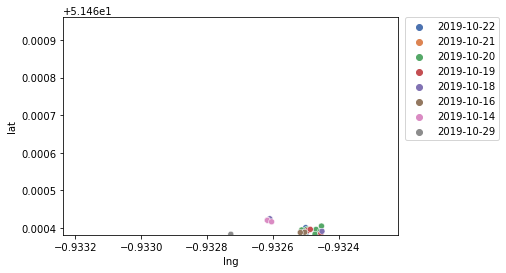

2c:59:8a:5e:85:a0


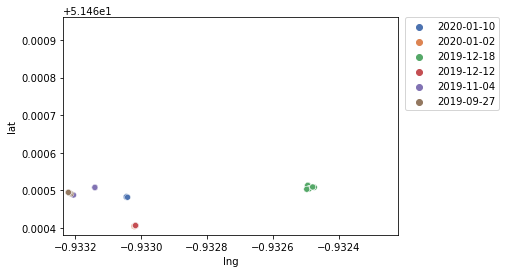

10:5b:ad:10:79:b7


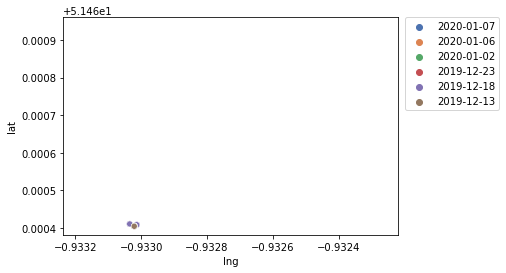

ec:9b:f3:55:5e:48


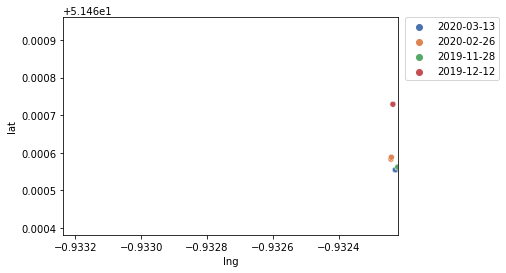

40:a1:08:04:c2:97


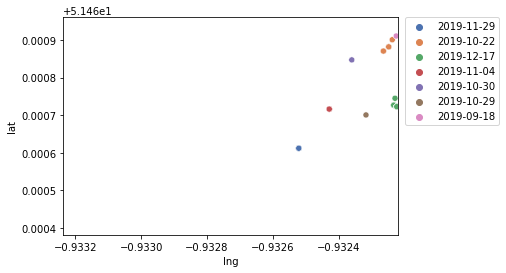

98:84:e3:d8:80:60


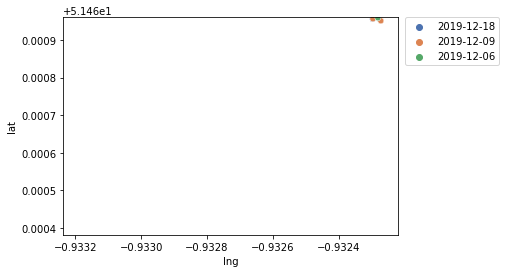

In [109]:
# plot machinary colored by level
for i in df_machine["ClientMacAddr"].unique():
    print(i)
    sns.scatterplot(x="lng", y="lat", data=df_machine[df_machine['ClientMacAddr'] == i], hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

## Scenarios:
- E-permitting --> Use vehicles without key/ unauthorized workers cannot use vehicles
- Virtual geofencing --> Notify when access unauthorized space/area --> intruders and visitors
- Machine not working --> A machine is malfunction --> notify the nearest workers

In [110]:
## Add authority level for vehicles
Mobile_device['veh_authority_level'] = 0
Mobile_device.loc[Mobile_device['job_function'].isin(['operator', 'storage worker']), 'veh_authority_level'] = 1
#Mobile_device.head()

## Check the authority level assignment for vehicle
Mobile_device[Mobile_device['job_function'].isin(['operator', 'storage worker'])]['veh_authority_level'].unique()

array([1])

In [111]:
### Left join df with job function for mobile device
df = df.merge(Mobile_device[['ClientMacAddr', 'job_function', 'veh_authority_level']], on='ClientMacAddr')
df.head()

Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                         localtime                  normalized_time  \
0 2020-09-01 23:58:49.582000+00:00 2020-09-01 23:58:49.582000+00:00   
1 2020-09-01 23:58:38.112000+00:00 2020-09-01 23:58:38.112000+00:00   
2 2020-09-01 23:58:29.514000+00:00 2020-09-01 23:58:29.514000+00:00   
3 2020-09-01 23:58:18.046000+00:00 2020-09-01 23:58:18.046000+00:00   
4 2020-09-01 23:58:09.522000+00:00 2020-09-01 23:58:09.522000+00:00   

         date  min  hour  dayOfWeek  IsWeekend     session job_function  \
0  2020-09-01   58    23          1      False  night_time     operator   
1  2020-09-01   58    23          1      False  night_time     operator   
2  2020-09-01   58    23          1      False  night_time     operator   
3  2020-09-01   58    23          1      False  night_time     operator   
4  2020-09-01   58    23          1      False  night_time     operator   

   veh_authority_level  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

## E-permitting
- Pick a date, plot all vehicles, operators, and storage workers 

In [112]:
Mobile_device

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
0     c0:e8:62:3f:c1:3f       123.287680          1           241      1.0   
1     d4:d2:52:86:f3:da       122.892808          1          2502      1.0   
2     84:ad:8d:66:24:2b       121.868253          1          2340      1.0   
3     18:81:0e:4c:75:f6       121.271258          1          2384      1.0   
4     24:1b:7a:b6:2e:76       121.240430          1          1415      1.0   
...                 ...              ...        ...           ...      ...   
6793  d0:77:14:8d:dc:a3         5.017370          1            13      1.0   
6794  d0:77:14:74:a3:e9         5.006274          1            13      1.0   
6795  c4:36:6c:1a:6a:5c         5.005079          5            61      5.0   
6796  f4:f5:24:21:2e:a9         5.004640          1            13      1.0   
6797  a8:db:03:db:d5:1b         5.001321          1            13      1.0   

      Weekend             set  avg_time_per_day Mobile_or_fixed  \
0         0.0  {working_hour}          6.699619   Mobile Device   
1         0.0  {working_hour}          7.956360   Mobile Device   
2         0.0  {working_hour}          9.823800   Mobile Device   
3         0.0  {working_hour}          8.550128   Mobile Device   
4         0.0  {working_hour}          5.383164   Mobile Device   
...       ...             ...               ...             ...   
6793      0.0  {working_hour}          0.032888   Mobile Device   
6794      0.0  {working_hour}          0.030774   Mobile Device   
6795      0.0  {working_hour}          0.032226   Mobile Device   
6796      0.0  {working_hour}          0.032136   Mobile Device   
6797      0.0  {working_hour}          0.031878   Mobile Device   

        job_function  veh_authority_level  
0         researcher                    0  
1           operator                    1  
2           engineer                    0  
3         researcher                    0  
4           operator                    1  
...              ...                  ...  
6793         vehicle                    0  
6794         vehicle                    0  
6795  canteen_worker                    0  
6796      researcher                    0  
6797        engineer                    0  

[6798 rows x 11 columns]

In [113]:
# Obtain mac id of 3 job functions
vec_mac_id = Mobile_device[Mobile_device['job_function']=='vehicle']['ClientMacAddr'].unique()
ope_mac_id = Mobile_device[Mobile_device['job_function']=='operator']['ClientMacAddr'].unique()
sto_mac_id = Mobile_device[Mobile_device['job_function']=='storage worker']['ClientMacAddr'].unique()

In [114]:
sim_ope_df = df[ (df['job_function'] == 'operator') & (df['date'] == dt.date(2019,10,26))]
sim_ope_df

Site      Level      ClientMacAddr        lat       lng  \
2706954  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460469 -0.932975   
2706955  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460469 -0.932975   
2706956  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460469 -0.932975   
2706957  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460466 -0.932969   
2706958  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460466 -0.932969   
...            ...        ...                ...        ...       ...   
2715589  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460462 -0.932963   
2715590  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460467 -0.932975   
2715591  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460469 -0.932980   
2715592  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460469 -0.932980   
2715593  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460469 -0.932980   

                               localtime                  normalized_time  \
2706954 2019-10-26 23:59:57.135000+00:00 2019-10-26 23:59:57.135000+00:00   
2706955 2019-10-26 23:59:47.105000+00:00 2019-10-26 23:59:47.105000+00:00   
2706956 2019-10-26 23:59:37.079000+00:00 2019-10-26 23:59:37.079000+00:00   
2706957 2019-10-26 23:59:27.055000+00:00 2019-10-26 23:59:27.055000+00:00   
2706958 2019-10-26 23:59:16.624000+00:00 2019-10-26 23:59:16.624000+00:00   
...                                  ...                              ...   
2715589 2019-10-26 00:00:48.058000+00:00 2019-10-26 00:00:48.058000+00:00   
2715590 2019-10-26 00:00:38.030000+00:00 2019-10-26 00:00:38.030000+00:00   
2715591 2019-10-26 00:00:27.603000+00:00 2019-10-26 00:00:27.603000+00:00   
2715592 2019-10-26 00:00:17.567000+00:00 2019-10-26 00:00:17.567000+00:00   
2715593 2019-10-26 00:00:07.540000+00:00 2019-10-26 00:00:07.540000+00:00   

               date  min  hour  dayOfWeek  IsWeekend     session job_function  \
2706954  2019-10-26   59    23          5       True  night_time     operator   
2706955  2019-10-26   59    23          5       True  night_time     operator   
2706956  2019-10-26   59    23          5       True  night_time     operator   
2706957  2019-10-26   59    23          5       True  night_time     operator   
2706958  2019-10-26   59    23          5       True  night_time     operator   
...             ...  ...   ...        ...        ...         ...          ...   
2715589  2019-10-26    0     0          5       True  night_time     operator   
2715590  2019-10-26    0     0          5       True  night_time     operator   
2715591  2019-10-26    0     0          5       True  night_time     operator   
2715592  2019-10-26    0     0          5       True  night_time     operator   
2715593  2019-10-26    0     0          5       True  night_time     operator   

         veh_authority_level  
2706954                    1  
2706955                    1  
2706956                    1  
2706957                    1  
2706958                    1  
...                      ...  
2715589                    1  
2715590                    1  
2715591                    1  
2715592                    1  
2715593                    1  

[8640 rows x 15 columns]

In [115]:
veh_df = Mobile_device[Mobile_device['job_function']=='vehicle'].sort_values(by=['total_day', 'total_signal'], ascending=False)
veh_df

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
6663  3c:01:ef:05:69:75         5.379402         30          1722     30.0   
5548  08:c5:e1:6f:06:ef         9.630029         21           274     21.0   
6252  38:f9:d3:20:e9:47         6.723035         13           852      1.0   
6444  fc:62:b9:70:33:fa         6.056460         13           170     13.0   
6042  00:23:32:28:05:a2         7.520879         12           288     12.0   
...                 ...              ...        ...           ...      ...   
6036  34:79:16:fa:32:c4         7.543856          1             2      1.0   
6207  c4:36:6c:24:81:45         6.885231          1             2      1.0   
6420  38:f7:3d:26:64:02         6.162238          1             2      1.0   
6453  74:9e:af:16:2b:70         6.033871          1             2      1.0   
6546  40:83:de:e5:cf:56         5.755404          1             2      1.0   

      Weekend                         set  avg_time_per_day Mobile_or_fixed  \
6663      0.0              {working_hour}          2.118729   Mobile Device   
5548      0.0              {working_hour}          0.369605   Mobile Device   
6252     12.0  {working_hour, night_time}          0.178378   Mobile Device   
6444      0.0              {working_hour}          0.096092   Mobile Device   
6042      0.0              {working_hour}          2.088624   Mobile Device   
...       ...                         ...               ...             ...   
6036      0.0              {working_hour}          0.002897   Mobile Device   
6207      0.0              {working_hour}          0.038789   Mobile Device   
6420      0.0              {working_hour}          0.002812   Mobile Device   
6453      0.0              {working_hour}          0.002787   Mobile Device   
6546      0.0              {working_hour}          0.002804   Mobile Device   

     job_function  veh_authority_level  
6663      vehicle                    0  
5548      vehicle                    0  
6252      vehicle                    0  
6444      vehicle                    0  
6042      vehicle                    0  
...           ...                  ...  
6036      vehicle                    0  
6207      vehicle                    0  
6420      vehicle                    0  
6453      vehicle                    0  
6546      vehicle                    0  

[430 rows x 11 columns]

3c:01:ef:05:69:75


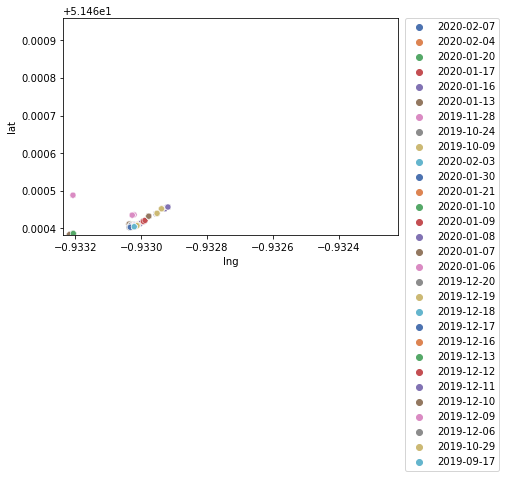

08:c5:e1:6f:06:ef


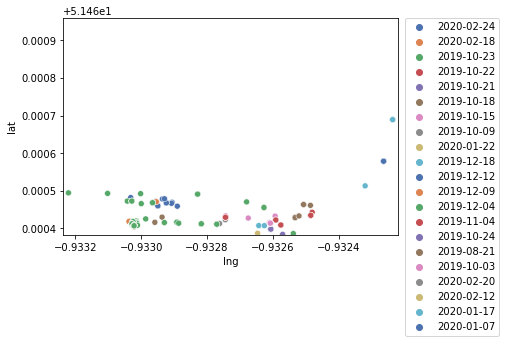

38:f9:d3:20:e9:47


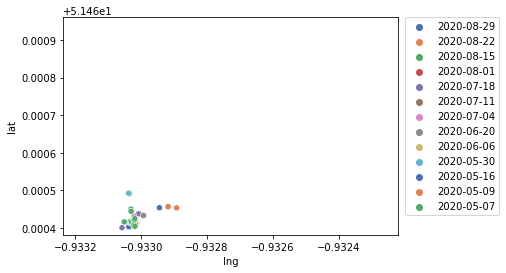

fc:62:b9:70:33:fa


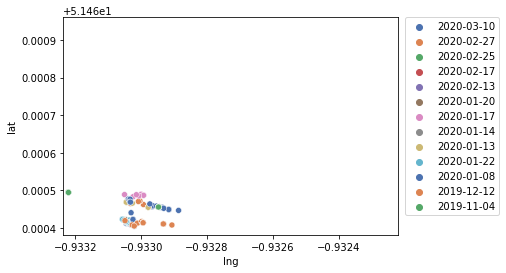

00:23:32:28:05:a2


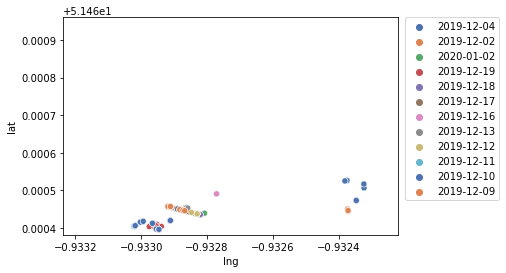

74:b5:87:1d:65:69


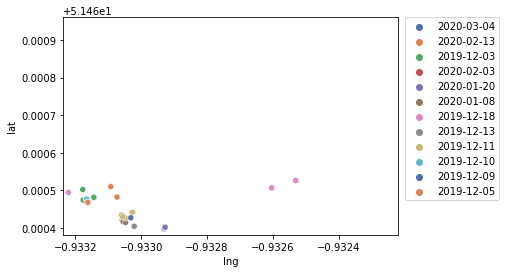

54:c9:df:9f:5d:aa


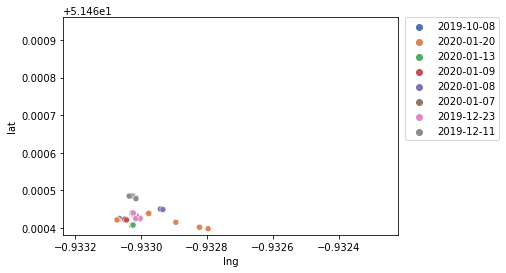

e4:04:39:68:c5:c0


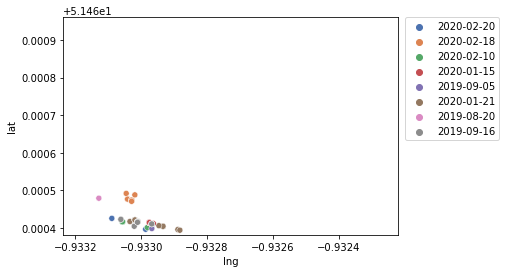

8c:fe:57:7c:b1:ce


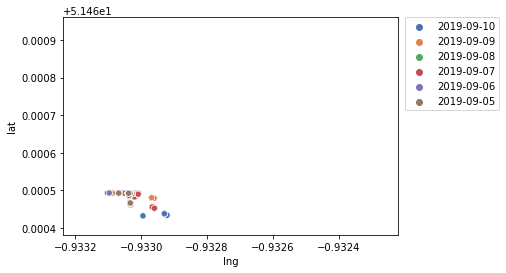

6c:c7:ec:66:9f:3a


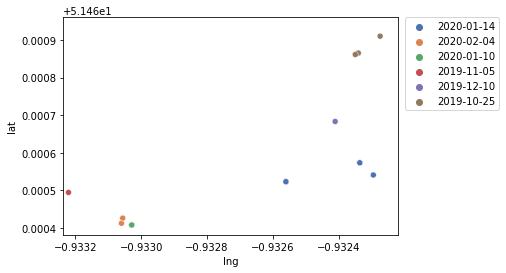

In [116]:
# plot vehicles colored by date
for i in veh_df['ClientMacAddr'][:10]:
    print(i)
    sns.scatterplot(x="lng", y="lat", data=df[df['ClientMacAddr'] == i], hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [117]:
sim_veh_df = df[ (df['ClientMacAddr'] == '00:10:02:28:95:a7') & (df['date'] == dt.date(2020,1,15))]
sim_veh_df.sort_values(by=['localtime'],inplace=True)

<ipython-input-117-f113346eb198>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_veh_df.sort_values(by=['localtime'],inplace=True)


In [118]:
sim_veh_df[sim_veh_df['hour']==16]

Empty DataFrame
Columns: [Site, Level, ClientMacAddr, lat, lng, localtime, normalized_time, date, min, hour, dayOfWeek, IsWeekend, session, job_function, veh_authority_level]
Index: []

In [119]:
sim_all_df = df[ (df['date'] == dt.date(2020,1,15)) & (df['hour'] == 16) * (df['Level'] == '1st Floor')]
sim_all_df

/Users/rickywang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


Site      Level      ClientMacAddr        lat       lng  \
1831801   UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460464 -0.932982   
1831802   UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460450 -0.933023   
1831803   UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460450 -0.933023   
1831804   UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460450 -0.933023   
1831805   UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460476 -0.933018   
...             ...        ...                ...        ...       ...   
70274839  UK Office  1st Floor  88:da:1a:2c:96:2c  51.460836 -0.932248   
70274840  UK Office  1st Floor  88:da:1a:2c:96:2c  51.460836 -0.932248   
70274841  UK Office  1st Floor  88:da:1a:2c:96:2c  51.460836 -0.932248   
70274842  UK Office  1st Floor  88:da:1a:2c:96:2c  51.460836 -0.932248   
70274843  UK Office  1st Floor  88:da:1a:2c:96:2c  51.460836 -0.932248   

                                localtime                  normalized_time  \
1831801  2020-01-15 16:59:57.497000+00:00 2020-01-15 16:59:57.497000+00:00   
1831802  2020-01-15 16:59:47.476000+00:00 2020-01-15 16:59:47.476000+00:00   
1831803  2020-01-15 16:59:37.445000+00:00 2020-01-15 16:59:37.445000+00:00   
1831804  2020-01-15 16:59:27.319000+00:00 2020-01-15 16:59:27.319000+00:00   
1831805  2020-01-15 16:59:19.444000+00:00 2020-01-15 16:59:19.444000+00:00   
...                                   ...                              ...   
70274839 2020-01-15 16:00:48.698000+00:00 2020-01-15 16:00:48.698000+00:00   
70274840 2020-01-15 16:00:38.582000+00:00 2020-01-15 16:00:38.582000+00:00   
70274841 2020-01-15 16:00:28.556000+00:00 2020-01-15 16:00:28.556000+00:00   
70274842 2020-01-15 16:00:18.525000+00:00 2020-01-15 16:00:18.525000+00:00   
70274843 2020-01-15 16:00:08.504000+00:00 2020-01-15 16:00:08.504000+00:00   

                date  min  hour  dayOfWeek  IsWeekend       session  \
1831801   2020-01-15   59    16          2      False  working_hour   
1831802   2020-01-15   59    16          2      False  working_hour   
1831803   2020-01-15   59    16          2      False  working_hour   
1831804   2020-01-15   59    16          2      False  working_hour   
1831805   2020-01-15   59    16          2      False  working_hour   
...              ...  ...   ...        ...        ...           ...   
70274839  2020-01-15    0    16          2      False  working_hour   
70274840  2020-01-15    0    16          2      False  working_hour   
70274841  2020-01-15    0    16          2      False  working_hour   
70274842  2020-01-15    0    16          2      False  working_hour   
70274843  2020-01-15    0    16          2      False  working_hour   

            job_function  veh_authority_level  
1831801         operator                    1  
1831802         operator                    1  
1831803         operator                    1  
1831804         operator                    1  
1831805         operator                    1  
...                  ...                  ...  
70274839  canteen_worker                    0  
70274840  canteen_worker                    0  
70274841  canteen_worker                    0  
70274842  canteen_worker                    0  
70274843  canteen_worker                    0  

[53519 rows x 15 columns]

In [120]:
# Filter only mac id in assembly line 
sim_all_df = sim_all_df.query("lat>=51.46037535823833 and lat<=51.46053231597175")
sim_all_df = sim_all_df.query("lng>=-0.933292264577848 and lng<=-0.9329178977311808")

In [121]:
sim_all_df = sim_all_df[sim_all_df['min'] == 59]

In [122]:
sim_all_df

Site      Level      ClientMacAddr        lat       lng  \
1831801   UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460464 -0.932982   
1831802   UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460450 -0.933023   
1831803   UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460450 -0.933023   
1831804   UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460450 -0.933023   
1831805   UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460476 -0.933018   
...             ...        ...                ...        ...       ...   
63077145  UK Office  1st Floor  10:02:b5:e3:09:8b  51.460442 -0.933122   
63077146  UK Office  1st Floor  10:02:b5:e3:09:8b  51.460443 -0.933125   
63077147  UK Office  1st Floor  10:02:b5:e3:09:8b  51.460443 -0.933125   
63077148  UK Office  1st Floor  10:02:b5:e3:09:8b  51.460492 -0.933038   
63077149  UK Office  1st Floor  10:02:b5:e3:09:8b  51.460445 -0.933103   

                                localtime                  normalized_time  \
1831801  2020-01-15 16:59:57.497000+00:00 2020-01-15 16:59:57.497000+00:00   
1831802  2020-01-15 16:59:47.476000+00:00 2020-01-15 16:59:47.476000+00:00   
1831803  2020-01-15 16:59:37.445000+00:00 2020-01-15 16:59:37.445000+00:00   
1831804  2020-01-15 16:59:27.319000+00:00 2020-01-15 16:59:27.319000+00:00   
1831805  2020-01-15 16:59:19.444000+00:00 2020-01-15 16:59:19.444000+00:00   
...                                   ...                              ...   
63077145 2020-01-15 16:59:46.563000+00:00 2020-01-15 16:59:46.563000+00:00   
63077146 2020-01-15 16:59:36.422000+00:00 2020-01-15 16:59:36.422000+00:00   
63077147 2020-01-15 16:59:26.116000+00:00 2020-01-15 16:59:26.116000+00:00   
63077148 2020-01-15 16:59:19.464000+00:00 2020-01-15 16:59:19.464000+00:00   
63077149 2020-01-15 16:59:05.684000+00:00 2020-01-15 16:59:05.684000+00:00   

                date  min  hour  dayOfWeek  IsWeekend       session  \
1831801   2020-01-15   59    16          2      False  working_hour   
1831802   2020-01-15   59    16          2      False  working_hour   
1831803   2020-01-15   59    16          2      False  working_hour   
1831804   2020-01-15   59    16          2      False  working_hour   
1831805   2020-01-15   59    16          2      False  working_hour   
...              ...  ...   ...        ...        ...           ...   
63077145  2020-01-15   59    16          2      False  working_hour   
63077146  2020-01-15   59    16          2      False  working_hour   
63077147  2020-01-15   59    16          2      False  working_hour   
63077148  2020-01-15   59    16          2      False  working_hour   
63077149  2020-01-15   59    16          2      False  working_hour   

         job_function  veh_authority_level  
1831801      operator                    1  
1831802      operator                    1  
1831803      operator                    1  
1831804      operator                    1  
1831805      operator                    1  
...               ...                  ...  
63077145     operator                    1  
63077146     operator                    1  
63077147     operator                    1  
63077148     operator                    1  
63077149     operator                    1  

[120 rows x 15 columns]

In [123]:
sim_all_df['job_function'].unique()

array(['operator', 'canteen_worker', 'visitor', 'IT_technician',
       'engineer', 'security_guard', 'storage worker'], dtype=object)

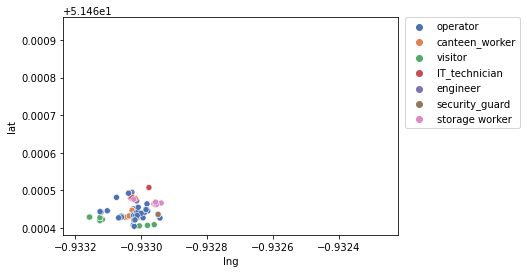

In [124]:
sns.scatterplot(x="lng", y="lat", data=sim_all_df, hue="job_function", palette="deep")
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

No handles with labels found to put in legend.


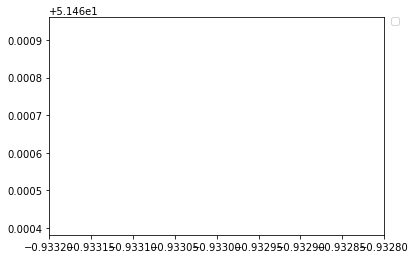

In [125]:
sns.scatterplot(x="lng", y="lat", data=sim_all_df[sim_all_df['job_function'] == 'vehicle'], 
                hue="job_function", palette="deep",
                hue_order=["vehicle"])
plt.xlim([-0.9332, -0.9328])
plt.ylim([min_lat, max_lat])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

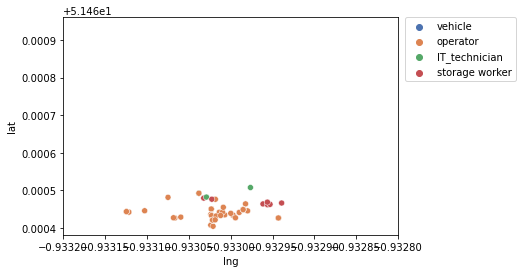

In [126]:
sns.scatterplot(x="lng", y="lat", data=sim_all_df[sim_all_df['job_function'].isin(['vehicle', 'operator', 'storage worker', 'IT_technician'])], 
                hue="job_function", palette="deep", hue_order=["vehicle", "operator", "IT_technician", "storage worker"])
plt.xlim([-0.9332, -0.9328])
plt.ylim([min_lat, max_lat])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [127]:
sample_operator = sim_all_df[sim_all_df['job_function'] == 'operator'].reset_index(drop=True).loc[0, ['ClientMacAddr', 'lat', 'lng', 'localtime', 'job_function', 'veh_authority_level']]
sample_it_tech = sim_all_df[sim_all_df['job_function'] == 'IT_technician'].reset_index(drop=True).loc[0, ['ClientMacAddr', 'lat', 'lng', 'localtime', 'job_function', 'veh_authority_level']]
sample_storage_worker = sim_all_df[sim_all_df['job_function'] == 'storage worker'].reset_index(drop=True).loc[0, ['ClientMacAddr', 'lat', 'lng', 'localtime', 'job_function', 'veh_authority_level']]
sample_visitor = sim_all_df[sim_all_df['job_function'] == 'visitor'].reset_index(drop=True).loc[0, ['ClientMacAddr', 'lat', 'lng', 'localtime', 'job_function', 'veh_authority_level']]

In [128]:
sample_operator

ClientMacAddr                         9c:8c:6e:46:1c:5e
lat                                           51.460464
lng                                           -0.932982
localtime              2020-01-15 16:59:57.497000+00:00
job_function                                   operator
veh_authority_level                                   1
Name: 0, dtype: object

In [129]:
def is_autho_vehicle(mac_id_df):
    print('ClientMacAddr: {}'.format(mac_id_df['ClientMacAddr']))
    print('Job function: {}'.format(mac_id_df['job_function']))
    if mac_id_df['veh_authority_level'] == 1:
        print('Authorized!')
    else:
        print('Unauthorized')

In [130]:
is_autho_vehicle(sample_operator)
print()
is_autho_vehicle(sample_storage_worker)

ClientMacAddr: 9c:8c:6e:46:1c:5e
Job function: operator
Authorized!

ClientMacAddr: 9c:da:3e:7f:a0:df
Job function: storage worker
Authorized!


In [131]:
is_autho_vehicle(sample_it_tech)
print()
is_autho_vehicle(sample_visitor)

ClientMacAddr: bc:e1:43:0e:5a:87
Job function: IT_technician
Unauthorized

ClientMacAddr: 88:66:a5:11:93:79
Job function: visitor
Unauthorized


## Virtual geofencing 
--> Notify security guard when someone 
access unauthorized space/area --> intruders and visitors

### Intruder

In [136]:
Intruder = Mobile_device[Mobile_device['job_function']=='intruder']
Intruder

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
571  40:83:de:61:09:1d        74.116909          1             4      1.0   
797  40:83:de:61:68:92        68.894020          1             4      1.0   

     Weekend           set  avg_time_per_day Mobile_or_fixed job_function  \
571      0.0  {night_time}          0.076511   Mobile Device     intruder   
797      0.0  {night_time}          0.027262   Mobile Device     intruder   

     veh_authority_level  
571                    0  
797                    0

40:83:de:61:09:1d


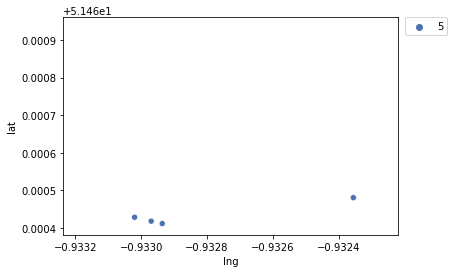

40:83:de:61:68:92


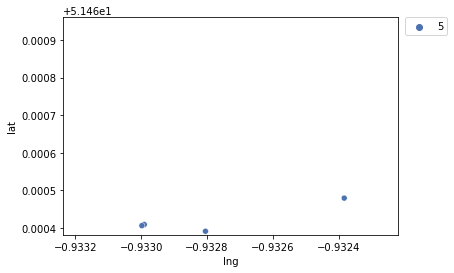

In [134]:
## plot the data with associated space
ind = 0
for i in Mobile_device[Mobile_device['job_function']=='intruder']["ClientMacAddr"][:10]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    #print(df_mobile_space[df_mobile_space['ClientMacAddr'] == i])
    ind += 1
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[df['ClientMacAddr'] == i]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="hour", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [188]:
Intruder_df = Intruder.merge(df, on = 'ClientMacAddr', how = 'left').reset_index(drop=True)
Intruder_df

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
0  40:83:de:61:09:1d        74.116909          1             4      1.0   
1  40:83:de:61:09:1d        74.116909          1             4      1.0   
2  40:83:de:61:09:1d        74.116909          1             4      1.0   
3  40:83:de:61:09:1d        74.116909          1             4      1.0   
4  40:83:de:61:68:92        68.894020          1             4      1.0   
5  40:83:de:61:68:92        68.894020          1             4      1.0   
6  40:83:de:61:68:92        68.894020          1             4      1.0   
7  40:83:de:61:68:92        68.894020          1             4      1.0   

   Weekend           set  avg_time_per_day Mobile_or_fixed job_function_x  \
0      0.0  {night_time}          0.076511   Mobile Device       intruder   
1      0.0  {night_time}          0.076511   Mobile Device       intruder   
2      0.0  {night_time}          0.076511   Mobile Device       intruder   
3      0.0  {night_time}          0.076511   Mobile Device       intruder   
4      0.0  {night_time}          0.027262   Mobile Device       intruder   
5      0.0  {night_time}          0.027262   Mobile Device       intruder   
6      0.0  {night_time}          0.027262   Mobile Device       intruder   
7      0.0  {night_time}          0.027262   Mobile Device       intruder   

   ...                        localtime                  normalized_time  \
0  ... 2019-10-15 05:18:22.341000+00:00 2019-10-15 05:18:22.341000+00:00   
1  ... 2019-10-15 05:14:46.349000+00:00 2019-10-15 05:14:46.349000+00:00   
2  ... 2019-10-15 05:14:00.539000+00:00 2019-10-15 05:14:00.539000+00:00   
3  ... 2019-10-15 05:13:46.901000+00:00 2019-10-15 05:13:46.901000+00:00   
4  ... 2020-02-26 05:24:34.466000+00:00 2020-02-26 05:24:34.466000+00:00   
5  ... 2020-02-26 05:23:12.560000+00:00 2020-02-26 05:23:12.560000+00:00   
6  ... 2020-02-26 05:23:02.524000+00:00 2020-02-26 05:23:02.524000+00:00   
7  ... 2020-02-26 05:22:56.324000+00:00 2020-02-26 05:22:56.324000+00:00   

         date  min  hour dayOfWeek IsWeekend     session  job_function_y  \
0  2019-10-15   18     5         1     False  night_time        intruder   
1  2019-10-15   14     5         1     False  night_time        intruder   
2  2019-10-15   14     5         1     False  night_time        intruder   
3  2019-10-15   13     5         1     False  night_time        intruder   
4  2020-02-26   24     5         2     False  night_time        intruder   
5  2020-02-26   23     5         2     False  night_time        intruder   
6  2020-02-26   23     5         2     False  night_time        intruder   
7  2020-02-26   22     5         2     False  night_time        intruder   

   veh_authority_level_y  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
5                      0  
6                      0  
7                      0  

[8 rows x 25 columns]

### Security guard

In [208]:
Security_Guard = Mobile_device[Mobile_device['job_function']=='security_guard']
Security_Guard.head()

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
14   c0:e8:62:e6:cc:e4       117.608679          8          3371      6.0   
25   74:9e:af:1e:15:da       112.014666          1           872      1.0   
62   b4:ef:39:c3:4a:2a       103.031265         53         27243     53.0   
107  8c:f5:a3:cd:d2:db        97.477712        138         53555    138.0   
117  58:c5:cb:5b:3f:d7        96.871757          5           616      4.0   

     Weekend                         set  avg_time_per_day Mobile_or_fixed  \
14       2.0  {working_hour, night_time}         17.923946   Mobile Device   
25       0.0              {working_hour}          2.664369   Mobile Device   
62       0.0  {working_hour, night_time}          4.614921   Mobile Device   
107      0.0              {working_hour}          5.488059   Mobile Device   
117      1.0  {working_hour, night_time}          9.579874   Mobile Device   

       job_function  veh_authority_level  
14   security_guard                    0  
25   security_guard                    0  
62   security_guard                    0  
107  security_guard                    0  
117  security_guard                    0

c0:e8:62:e6:cc:e4


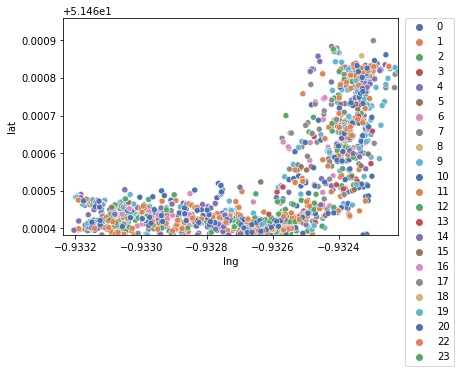

74:9e:af:1e:15:da


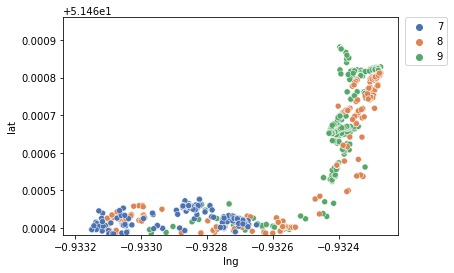

b4:ef:39:c3:4a:2a


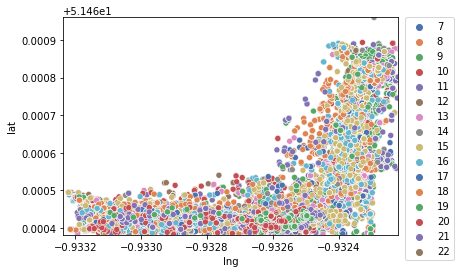

8c:f5:a3:cd:d2:db


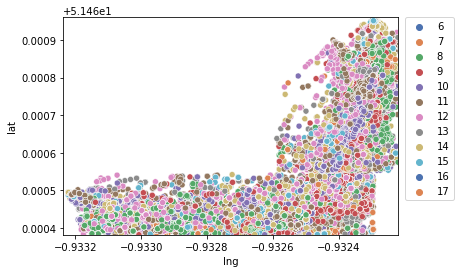

58:c5:cb:5b:3f:d7


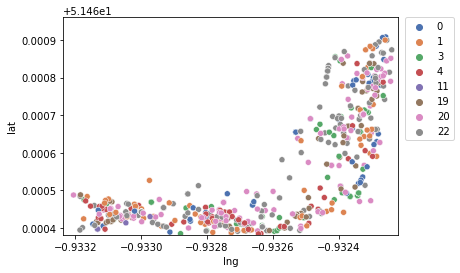

In [139]:
## plot the data with associated space
ind = 0
for i in Mobile_device[Mobile_device['job_function']=='security_guard']["ClientMacAddr"][:5]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    #print(df_mobile_space[df_mobile_space['ClientMacAddr'] == i])
    ind += 1
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[df['ClientMacAddr'] == i]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="hour", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [209]:
Security_Guard_df = Security_Guard.merge(df, on = 'ClientMacAddr', how = 'left').reset_index(drop=True)
Security_Guard_df.tail()

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
5181290  00:08:22:80:bb:fb         5.046191          1             8      1.0   
5181291  00:08:22:80:bb:fb         5.046191          1             8      1.0   
5181292  00:08:22:80:bb:fb         5.046191          1             8      1.0   
5181293  00:08:22:80:bb:fb         5.046191          1             8      1.0   
5181294  00:08:22:80:bb:fb         5.046191          1             8      1.0   

         Weekend             set  avg_time_per_day Mobile_or_fixed  \
5181290      0.0  {working_hour}          0.574059   Mobile Device   
5181291      0.0  {working_hour}          0.574059   Mobile Device   
5181292      0.0  {working_hour}          0.574059   Mobile Device   
5181293      0.0  {working_hour}          0.574059   Mobile Device   
5181294      0.0  {working_hour}          0.574059   Mobile Device   

         job_function_x  ...                        localtime  \
5181290  security_guard  ... 2020-07-15 15:21:29.149000+00:00   
5181291  security_guard  ... 2020-07-15 15:21:19.660000+00:00   
5181292  security_guard  ... 2020-07-15 15:21:06.050000+00:00   
5181293  security_guard  ... 2020-07-15 15:20:59.520000+00:00   
5181294  security_guard  ... 2020-07-15 15:20:49.429000+00:00   

                         normalized_time        date  min  hour dayOfWeek  \
5181290 2020-07-15 15:21:29.149000+00:00  2020-07-15   21    15         2   
5181291 2020-07-15 15:21:19.660000+00:00  2020-07-15   21    15         2   
5181292 2020-07-15 15:21:06.050000+00:00  2020-07-15   21    15         2   
5181293 2020-07-15 15:20:59.520000+00:00  2020-07-15   20    15         2   
5181294 2020-07-15 15:20:49.429000+00:00  2020-07-15   20    15         2   

        IsWeekend       session  job_function_y  veh_authority_level_y  
5181290     False  working_hour  security_guard                      0  
5181291     False  working_hour  security_guard                      0  
5181292     False  working_hour  security_guard                      0  
5181293     False  working_hour  security_guard                      0  
5181294     False  working_hour  security_guard                      0  

[5 rows x 25 columns]

## When intruder appeared, notify a security guard

In [263]:
data = {'ClientMacAddr': '40:83:de:61:09:1d', 'date': '2020-07-16', 'hour': 4}
Intruder1 = pd.DataFrame(data, index=[0])
Intruder1['date'] = pd.to_datetime(Intruder1['date'], format="%Y-%m-%d")
Intruder1 = Intruder1.loc[0, :]
Intruder1

ClientMacAddr      40:83:de:61:09:1d
date             2020-07-16 00:00:00
hour                               4
Name: 0, dtype: object

In [225]:
Security_Guard1 = Security_Guard_df.loc[:, ['ClientMacAddr', 'date', 'hour']].drop_duplicates()
Security_Guard1['date'] = pd.to_datetime(Security_Guard1['date'])
Security_Guard1

ClientMacAddr       date  hour
0        c0:e8:62:e6:cc:e4 2020-08-11    11
9        c0:e8:62:e6:cc:e4 2020-08-11    10
87       c0:e8:62:e6:cc:e4 2020-08-11     4
104      c0:e8:62:e6:cc:e4 2020-08-10    19
135      c0:e8:62:e6:cc:e4 2020-08-10     4
...                    ...        ...   ...
5181232  58:48:22:a7:b5:1e 2020-08-13    10
5181249  d0:77:14:76:04:b1 2020-03-05    15
5181262  d0:77:14:d2:f5:79 2020-03-06     8
5181275  24:46:c8:21:fb:94 2020-03-10    15
5181287  00:08:22:80:bb:fb 2020-07-15    15

[27598 rows x 3 columns]

In [266]:
def notification_intruder(data):
    Intruder_ID = data['ClientMacAddr']
    Intruder_Date = data['date']
    Intruder_Time = data['hour']
    print('Ring!!! Notification!!!')
    print('There is an intruder:', Intruder_ID)
    print('Date:', Intruder_Date)
    print('Time: {}'.format(Intruder_Time))
    Security_Guard = Security_Guard1[(Security_Guard1['date'] == Intruder_Date) & 
                                     (Security_Guard1['hour'] == Intruder_Time)]
    print()
    print('Assigned secruity guard:', np.array(Security_Guard['ClientMacAddr']))

In [267]:
notification_intruder(Intruder1)

Ring!!! Notification!!!
There is an intruder: 40:83:de:61:09:1d
Date: 2020-07-16 00:00:00
Time: 4

Assigned secruity guard: ['58:c5:cb:5b:3f:d7']


### Visitor

In [268]:
Visitor = Mobile_device[Mobile_device['job_function']=='visitor']
Visitor

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
6     ac:e4:b5:a4:b7:92       119.817921          2          2533      2.0   
17    d4:dc:cd:c0:a4:51       116.632938          1           395      1.0   
26    d4:11:a3:a0:53:4d       111.589282          1           484      1.0   
33    78:7b:8a:a4:82:55       109.302613          1           106      1.0   
39    a4:e9:75:a3:fd:4d       107.359133          1          1329      1.0   
...                 ...              ...        ...           ...      ...   
6781  88:b4:a6:c2:50:eb         5.044996          1            13      1.0   
6784  88:b4:a6:ce:5c:21         5.040452          1            13      1.0   
6787  38:80:df:5f:e0:bc         5.030738          1            13      1.0   
6788  00:0c:e7:66:3f:57         5.029300          1            14      1.0   
6792  5c:5f:67:8b:1b:f5         5.023312          1            13      1.0   

      Weekend             set  avg_time_per_day Mobile_or_fixed job_function  \
6         0.0  {working_hour}          6.293693   Mobile Device      visitor   
17        0.0  {working_hour}          1.720427   Mobile Device      visitor   
26        0.0  {working_hour}          4.589425   Mobile Device      visitor   
33        0.0  {working_hour}          6.136587   Mobile Device      visitor   
39        0.0  {working_hour}          7.574808   Mobile Device      visitor   
...       ...             ...               ...             ...          ...   
6781      0.0  {working_hour}          0.032208   Mobile Device      visitor   
6784      0.0  {working_hour}          0.033593   Mobile Device      visitor   
6787      0.0  {working_hour}          0.032194   Mobile Device      visitor   
6788      0.0  {working_hour}          0.034649   Mobile Device      visitor   
6792      0.0  {working_hour}          0.036380   Mobile Device      visitor   

      veh_authority_level  
6                       0  
17                      0  
26                      0  
33                      0  
39                      0  
...                   ...  
6781                    0  
6784                    0  
6787                    0  
6788                    0  
6792                    0  

[1139 rows x 11 columns]

ac:e4:b5:a4:b7:92


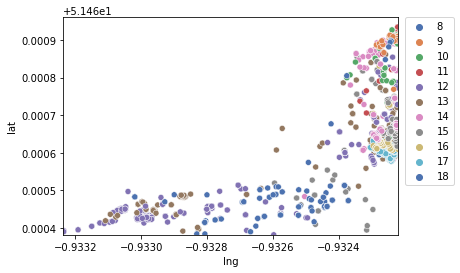

d4:dc:cd:c0:a4:51


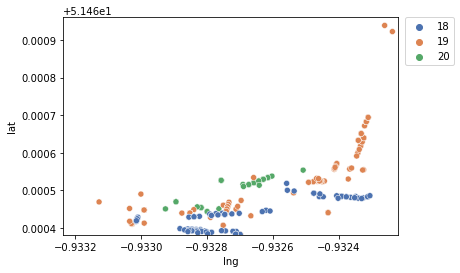

d4:11:a3:a0:53:4d


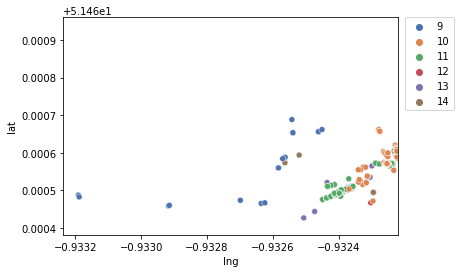

78:7b:8a:a4:82:55


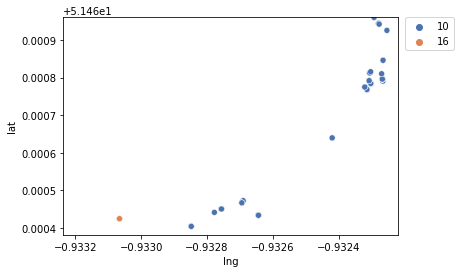

a4:e9:75:a3:fd:4d


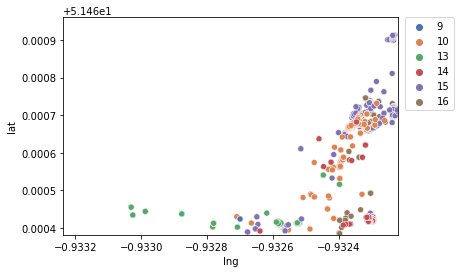

In [269]:
## plot the data with associated space
ind = 0
for i in Mobile_device[Mobile_device['job_function']=='visitor']["ClientMacAddr"][:5]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    #print(df_mobile_space[df_mobile_space['ClientMacAddr'] == i])
    ind += 1
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[df['ClientMacAddr'] == i]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="hour", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [283]:
Visitor_pattern = df_mobile_space_1F[df_mobile_space_1F['job_function'] == 'visitor']
Visitor_pattern

designated_space      ClientMacAddr  admin_office  assembly_line   canteen  \
3                 00:08:22:38:c2:fb      0.000000       0.000000  0.000000   
10                00:0c:e7:02:8b:64      0.000000       0.000000  0.000000   
17                00:0c:e7:19:bb:48      0.000000       0.000000  0.000000   
24                00:0c:e7:25:db:4e      0.000000       0.000000  0.076923   
30                00:0c:e7:2c:b6:55      0.000000       0.000000  0.000000   
...                             ...           ...            ...       ...   
4493              f8:63:3f:57:fa:0d      0.134058       0.002717  0.000000   
4495              f8:63:3f:e7:86:78      0.017241       0.103448  0.000000   
4510              f8:e9:4e:59:5d:d1      0.000000       0.000000  0.000000   
4514              f8:ff:c2:8f:5d:16      0.000000       0.000000  0.000000   
4516              fc:18:3c:21:0f:d3      0.008037       0.000000  0.025258   

designated_space  control_rooms  entrance       lab  not_in_any   storage  \
3                      0.000000       0.0  0.351351    0.648649  0.000000   
10                     0.000000       0.0  0.000000    1.000000  0.000000   
17                     0.000000       0.0  0.000000    1.000000  0.000000   
24                     0.000000       0.0  0.000000    0.923077  0.000000   
30                     0.000000       0.0  0.142857    0.857143  0.000000   
...                         ...       ...       ...         ...       ...   
4493                   0.000000       0.0  0.391304    0.453804  0.018116   
4495                   0.000000       0.0  0.129310    0.750000  0.000000   
4510                   0.000000       0.0  0.445578    0.551020  0.003401   
4514                   0.000000       0.0  0.467742    0.532258  0.000000   
4516                   0.014925       0.0  0.300804    0.647532  0.003444   

designated_space   max_space job_function  
3                 not_in_any      visitor  
10                not_in_any      visitor  
17                not_in_any      visitor  
24                not_in_any      visitor  
30                not_in_any      visitor  
...                      ...          ...  
4493              not_in_any      visitor  
4495              not_in_any      visitor  
4510              not_in_any      visitor  
4514              not_in_any      visitor  
4516              not_in_any      visitor  

[661 rows x 11 columns]

## When visitors access unauthorized space, notify a security guard

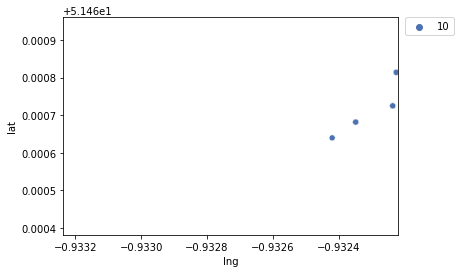

In [285]:
Visitor1 = df[df['ClientMacAddr'] == '00:08:22:38:c2:fb']
sns.scatterplot(x="lng", y="lat", data=Visitor1, hue="hour", palette="deep")
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [293]:
Visitor1 = df_mobile_1F[df_mobile_1F['ClientMacAddr'] == '00:08:22:38:c2:fb']
Visitor1

Site      Level      ClientMacAddr        lat       lng  \
45908065  UK Office  1st Floor  00:08:22:38:c2:fb  51.460814 -0.932227   
45908161  UK Office  1st Floor  00:08:22:38:c2:fb  51.460814 -0.932227   
45908241  UK Office  1st Floor  00:08:22:38:c2:fb  51.460814 -0.932227   
45908340  UK Office  1st Floor  00:08:22:38:c2:fb  51.460814 -0.932227   
45908390  UK Office  1st Floor  00:08:22:38:c2:fb  51.460814 -0.932227   
45908522  UK Office  1st Floor  00:08:22:38:c2:fb  51.460814 -0.932227   
45908578  UK Office  1st Floor  00:08:22:38:c2:fb  51.460814 -0.932227   
45908699  UK Office  1st Floor  00:08:22:38:c2:fb  51.460814 -0.932227   
45908766  UK Office  1st Floor  00:08:22:38:c2:fb  51.460814 -0.932227   
45908792  UK Office  1st Floor  00:08:22:38:c2:fb  51.460814 -0.932227   
45908920  UK Office  1st Floor  00:08:22:38:c2:fb  51.460814 -0.932227   
45909005  UK Office  1st Floor  00:08:22:38:c2:fb  51.460814 -0.932227   
45913799  UK Office  1st Floor  00:08:22:38:c2:fb  51.460725 -0.932237   
45913883  UK Office  1st Floor  00:08:22:38:c2:fb  51.460725 -0.932237   
45913985  UK Office  1st Floor  00:08:22:38:c2:fb  51.460725 -0.932237   
45914111  UK Office  1st Floor  00:08:22:38:c2:fb  51.460725 -0.932237   
45914118  UK Office  1st Floor  00:08:22:38:c2:fb  51.460725 -0.932237   
45914252  UK Office  1st Floor  00:08:22:38:c2:fb  51.460725 -0.932237   
45914347  UK Office  1st Floor  00:08:22:38:c2:fb  51.460725 -0.932237   
45914415  UK Office  1st Floor  00:08:22:38:c2:fb  51.460725 -0.932237   
45914453  UK Office  1st Floor  00:08:22:38:c2:fb  51.460725 -0.932237   
45914572  UK Office  1st Floor  00:08:22:38:c2:fb  51.460725 -0.932237   
45914601  UK Office  1st Floor  00:08:22:38:c2:fb  51.460725 -0.932237   
45914760  UK Office  1st Floor  00:08:22:38:c2:fb  51.460725 -0.932237   
45921863  UK Office  1st Floor  00:08:22:38:c2:fb  51.460682 -0.932350   
45921929  UK Office  1st Floor  00:08:22:38:c2:fb  51.460682 -0.932350   
45921976  UK Office  1st Floor  00:08:22:38:c2:fb  51.460682 -0.932350   
45922104  UK Office  1st Floor  00:08:22:38:c2:fb  51.460682 -0.932350   
45922153  UK Office  1st Floor  00:08:22:38:c2:fb  51.460682 -0.932350   
45922209  UK Office  1st Floor  00:08:22:38:c2:fb  51.460682 -0.932350   
45922274  UK Office  1st Floor  00:08:22:38:c2:fb  51.460682 -0.932350   
45922346  UK Office  1st Floor  00:08:22:38:c2:fb  51.460682 -0.932350   
45922416  UK Office  1st Floor  00:08:22:38:c2:fb  51.460682 -0.932350   
45922463  UK Office  1st Floor  00:08:22:38:c2:fb  51.460682 -0.932350   
45922575  UK Office  1st Floor  00:08:22:38:c2:fb  51.460682 -0.932350   
45922648  UK Office  1st Floor  00:08:22:38:c2:fb  51.460682 -0.932350   
45922720  UK Office  1st Floor  00:08:22:38:c2:fb  51.460640 -0.932421   

                                localtime                  normalized_time  \
45908065 2020-02-19 10:36:25.531000+00:00 2020-02-19 10:36:25.531000+00:00   
45908161 2020-02-19 10:36:14.032000+00:00 2020-02-19 10:36:14.032000+00:00   
45908241 2020-02-19 10:36:07.833000+00:00 2020-02-19 10:36:07.833000+00:00   
45908340 2020-02-19 10:35:55.428000+00:00 2020-02-19 10:35:55.428000+00:00   
45908390 2020-02-19 10:35:45.395000+00:00 2020-02-19 10:35:45.395000+00:00   
45908522 2020-02-19 10:35:32.694000+00:00 2020-02-19 10:35:32.694000+00:00   
45908578 2020-02-19 10:35:26.585000+00:00 2020-02-19 10:35:26.585000+00:00   
45908699 2020-02-19 10:35:13.744000+00:00 2020-02-19 10:35:13.744000+00:00   
45908766 2020-02-19 10:35:07.559000+00:00 2020-02-19 10:35:07.559000+00:00   
45908792 2020-02-19 10:34:57.520000+00:00 2020-02-19 10:34:57.520000+00:00   
45908920 2020-02-19 10:34:44.931000+00:00 2020-02-19 10:34:44.931000+00:00   
45909005 2020-02-19 10:34:38.686000+00:00 2020-02-19 10:34:38.686000+00:00   
45913799 2020-02-19 10:23:49.399000+00:00 2020-02-19 10:23:49.399000+00:00   
45913883 2020-02-19 10:23:39.231000+00:00 2020-02-19 10:23:39.231000+00:00   
45913985 2020-02-19 10:23:27.501

In [300]:
Visitor1_pattern = Visitor1.loc[:, ['ClientMacAddr', 'date', 'hour', 'designated_space']]
Visitor1_pattern['date'] = pd.to_datetime(Visitor1_pattern['date'])
Visitor1_pattern

ClientMacAddr       date  hour designated_space
45908065  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45908161  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45908241  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45908340  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45908390  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45908522  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45908578  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45908699  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45908766  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45908792  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45908920  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45909005  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45913799  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45913883  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45913985  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45914111  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45914118  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45914252  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45914347  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45914415  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45914453  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45914572  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45914601  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45914760  00:08:22:38:c2:fb 2020-02-19    10       not_in_any
45921863  00:08:22:38:c2:fb 2020-02-19    10              lab
45921929  00:08:22:38:c2:fb 2020-02-19    10              lab
45921976  00:08:22:38:c2:fb 2020-02-19    10              lab
45922104  00:08:22:38:c2:fb 2020-02-19    10              lab
45922153  00:08:22:38:c2:fb 2020-02-19    10              lab
45922209  00:08:22:38:c2:fb 2020-02-19    10              lab
45922274  00:08:22:38:c2:fb 2020-02-19    10              lab
45922346  00:08:22:38:c2:fb 2020-02-19    10              lab
45922416  00:08:22:38:c2:fb 2020-02-19    10              lab
45922463  00:08:22:38:c2:fb 2020-02-19    10              lab
45922575  00:08:22:38:c2:fb 2020-02-19    10              lab
45922648  00:08:22:38:c2:fb 2020-02-19    10              lab
45922720  00:08:22:38:c2:fb 2020-02-19    10              lab

In [329]:
def notification_visitor(data):
    for index, row in data.iterrows():
        if row['designated_space'] != 'not_in_any':
            print('You do not have access, please leave!')
            print("Current location:", row['designated_space'])
            print("Visitor ID:", row['ClientMacAddr'])
            print("Date:", row['date'])
            print("Time:", row['hour'])
            
            Security_Guard = Security_Guard1[(Security_Guard1['date'] == row['date']) & 
                                     (Security_Guard1['hour'] == row['hour'])].head(5)
            print()
            print('Assigned secruity guard:', np.array(Security_Guard['ClientMacAddr']))
            print('------------------------------------------------------------')
            print()
        else:
            print("Visitor ID:", row['ClientMacAddr'])
            print("Date:", row['date'])
            print("Time:", row['hour'])
            print("Current location:", row['designated_space'])
            print('Authorized')
            print('------------------------------------------------------------')
            print()
           

In [330]:
notification_visitor(Visitor1_pattern)

Visitor ID: 00:08:22:38:c2:fb
Date: 2020-02-19 00:00:00
Time: 10
Current location: not_in_any
Authorized
------------------------------------------------------------

Visitor ID: 00:08:22:38:c2:fb
Date: 2020-02-19 00:00:00
Time: 10
Current location: not_in_any
Authorized
------------------------------------------------------------

Visitor ID: 00:08:22:38:c2:fb
Date: 2020-02-19 00:00:00
Time: 10
Current location: not_in_any
Authorized
------------------------------------------------------------

Visitor ID: 00:08:22:38:c2:fb
Date: 2020-02-19 00:00:00
Time: 10
Current location: not_in_any
Authorized
------------------------------------------------------------

Visitor ID: 00:08:22:38:c2:fb
Date: 2020-02-19 00:00:00
Time: 10
Current location: not_in_any
Authorized
------------------------------------------------------------

Visitor ID: 00:08:22:38:c2:fb
Date: 2020-02-19 00:00:00
Time: 10
Current location: not_in_any
Authorized
------------------------------------------------------------

## TODO:
- From professor feedback, he mentioned when a fixed device is moved or gone misssing. Should we implement this?